## Imports for the EDA Process

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

## Loading the Dataset

### Steps to follow
#### **Data Loading and Initial Exploration**
- Load the dataset and display the first few rows.
- Summarize the dataset structure, including the number of rows, columns, and data types.

#### **Data Cleaning**
- Identify and handle missing values.
- Check for duplicate rows and handle them if necessary.
- Clean and standardize column names if needed.

#### **Univariate Analysis**
- Analyze the distribution of individual numerical and categorical features.
- For numerical features, use:
- Histograms, box plots, or density plots to visualize distributions.
- Descriptive statistics like mean, median, and standard deviation.
- For categorical features, use:
- Bar charts or pie charts to visualize value counts.
- Percentage distribution of each category.

#### **Bivariate Analysis**
- Examine relationships between two variables.
1. For numerical vs numerical:
- Use scatter plots or correlation coefficients.
2. For categorical vs numerical:
- Use box plots or violin plots.
3. For categorical vs categorical:
- Use contingency tables or stacked bar plots.
4. Identify trends, patterns, or anomalies.

#### **Multivariate Analysis**
- Explore relationships between more than two variables:
- Use pair plots or matrix plots for numerical variables.
- Heatmaps to examine correlations between multiple numerical features.
- Grouped bar charts or cluster analysis for categorical variables.
- Generate hypotheses based on patterns observed.

#### **Outlier Detection**
- Use visualization techniques like box plots or scatter plots to identify outliers.
- Handle outliers using appropriate techniques (e.g., capping, removal).

#### **Feature Engineering**
- Create new features by combining or transforming existing ones.
- Examples: Calculate the age of an entity or convert text categories to numerical values.

#### **Insights and Reporting**
- Summarize the key findings from your analysis.
- Discuss any noticeable trends, distributions, or relationships.
- Document the decisions made during cleaning and preprocessing.

#### Answer the below questions from your EDA:
1. Group the data by `Location` and calculate the average `Price` for each location.  
2. Group the data by `Fuel_Type` and `Transmission` to find the total number of `Seats` for each combination.  
3. Create a pivot table to display the average `Power` for each `Year` and `Owner_Type`.  
4. Create a pivot table to show the total `Kilometers_Driven` for each `Location` and `Fuel_Type`.  
5. Filter the dataset to include only cars with `Mileage` above 20 km/l and calculate the average `Price` of these cars.  
6. Add a new column, `Car_Age`, to calculate the age of each car as of 2024 and find the oldest car.  
7. Sort the dataset by `Price` in descending order and list the top 5 most expensive cars.  
8. Find the maximum difference between `New_Price` and `Price` for each `Transmission` type.

### **Data Loading and Initial Exploration**
- Load the dataset and display the first few rows.
- Summarize the dataset structure, including the number of rows, columns, and data types.

In [2]:
df  = pd.read_csv("used_cars_data.csv", index_col=0)
df

Name    Location  Year  \
S.No.                                                                        
0                                 Maruti Wagon R LXI CNG      Mumbai  2010   
1                       Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                           Honda Jazz V     Chennai  2011   
3                                      Maruti Ertiga VDI     Chennai  2012   
4                        Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                  ...         ...   ...   
7248                   Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                              Volkswagen Polo GT TSI      Mumbai  2015   
7250                              Nissan Micra Diesel XV     Kolkata  2012   
7251                              Volkswagen Polo GT TSI        Pune  2013   
7252   Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

       Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
S.No.                                                                    
0                  72000       CNG       Manual      First  26.6 km/kg   
1                  41000    Diesel       Manual      First  19.67 kmpl   
2                  46000    Petrol       Manual      First   18.2 kmpl   
3                  87000    Diesel       Manual      First  20.77 kmpl   
4                  40670    Diesel    Automatic     Second   15.2 kmpl   
...                  ...       ...          ...        ...         ...   
7248               89411    Diesel       Manual      First  20.54 kmpl   
7249               59000    Petrol    Automatic      First  17.21 kmpl   
7250               28000    Diesel       Manual      First  23.08 kmpl   
7251               52262    Petrol    Automatic      Third   17.2 kmpl   
7252               72443    Diesel    Automatic      First   10.0 kmpl   

        Engine      Power  Seats  New_Price  Price  
S.No.                                               
0       998 CC  58.16 bhp    5.0        NaN   1.75  
1      1582 CC  126.2 bhp    5.0        NaN  12.50  
2      1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50  
3      1248 CC  88.76 bhp    7.0        NaN   6.00  
4      1968 CC  140.8 bhp    5.0        NaN  17.74  
...        ...        ...    ...        ...    ...  
7248   1598 CC  103.6 bhp    5.0        NaN    NaN  
7249   1197 CC  103.6 bhp    5.0        NaN    NaN  
7250   1461 CC   63.1 bhp    5.0        NaN    NaN  
7251   1197 CC  103.6 bhp    5.0        NaN    NaN  
7252   2148 CC    170 bhp    5.0        NaN    NaN  

[7253 rows x 13 columns]

#### **1. info()**

In [3]:
## .info() gives the information realted to data types and the count of not null values for the each column in a dataset
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


#### Observations
- The total number of rows in the data is 7253 with 13 columns
- The columns with null values are Mileage, Engine, Power, Seats, New_Price and Price
- The columns Mileage, Engine, Power, and Seats can be identified using methods like mean, medean, mode or correlation between them.
- There is a huge number of null value in the column new_price need to find out if their is any numerical relation between the new_price and price dataset
- There is also a huge number of null values in Price column

#### **2. describe()**

In [4]:
## .desrcibe() provides information like mean, count, std, min, max and other percentage distibution of the numerical columns of the dataset
df.describe()

Year  Kilometers_Driven        Seats        Price
count  7253.000000       7.253000e+03  7200.000000  6019.000000
mean   2013.365366       5.869906e+04     5.279722     9.479468
std       3.254421       8.442772e+04     0.811660    11.187917
min    1996.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.341600e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

#### Observations 
- The Mean for Price is ~9.48
- The Mean for the kilometers_Driven is 5.8699 * 10 ^ 4 kilometers

#### **3. duplicate()**

In [5]:
df[df.duplicated(keep=False)]

Name Location  Year  Kilometers_Driven Fuel_Type  \
S.No.                                                                    
6498   Honda City 1.5 E MT   Mumbai  2010              52000    Petrol   
6582   Honda City 1.5 E MT   Mumbai  2010              52000    Petrol   

      Transmission Owner_Type    Mileage   Engine    Power  Seats New_Price  \
S.No.                                                                         
6498        Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0       NaN   
6582        Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0       NaN   

       Price  
S.No.         
6498     NaN  
6582     NaN

In [6]:
## Analyzing for duplicate values in the dataset
# Count the number of duplicate rows
duplicate_row_count = df.duplicated().sum()
duplicate_row_count

np.int64(1)

### Observation
- There is one duplicate value in this dataset, becuase this value does not contribute to the dataste.
- The duplicate value is dropped.

In [7]:
df.drop_duplicates()

Name    Location  Year  \
S.No.                                                                        
0                                 Maruti Wagon R LXI CNG      Mumbai  2010   
1                       Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                           Honda Jazz V     Chennai  2011   
3                                      Maruti Ertiga VDI     Chennai  2012   
4                        Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                  ...         ...   ...   
7248                   Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                              Volkswagen Polo GT TSI      Mumbai  2015   
7250                              Nissan Micra Diesel XV     Kolkata  2012   
7251                              Volkswagen Polo GT TSI        Pune  2013   
7252   Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

       Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
S.No.                                                                    
0                  72000       CNG       Manual      First  26.6 km/kg   
1                  41000    Diesel       Manual      First  19.67 kmpl   
2                  46000    Petrol       Manual      First   18.2 kmpl   
3                  87000    Diesel       Manual      First  20.77 kmpl   
4                  40670    Diesel    Automatic     Second   15.2 kmpl   
...                  ...       ...          ...        ...         ...   
7248               89411    Diesel       Manual      First  20.54 kmpl   
7249               59000    Petrol    Automatic      First  17.21 kmpl   
7250               28000    Diesel       Manual      First  23.08 kmpl   
7251               52262    Petrol    Automatic      Third   17.2 kmpl   
7252               72443    Diesel    Automatic      First   10.0 kmpl   

        Engine      Power  Seats  New_Price  Price  
S.No.                                               
0       998 CC  58.16 bhp    5.0        NaN   1.75  
1      1582 CC  126.2 bhp    5.0        NaN  12.50  
2      1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50  
3      1248 CC  88.76 bhp    7.0        NaN   6.00  
4      1968 CC  140.8 bhp    5.0        NaN  17.74  
...        ...        ...    ...        ...    ...  
7248   1598 CC  103.6 bhp    5.0        NaN    NaN  
7249   1197 CC  103.6 bhp    5.0        NaN    NaN  
7250   1461 CC   63.1 bhp    5.0        NaN    NaN  
7251   1197 CC  103.6 bhp    5.0        NaN    NaN  
7252   2148 CC    170 bhp    5.0        NaN    NaN  

[7252 rows x 13 columns]

#### Observation
- There are no duplicate rows in the dataset

### **Data Cleaning**
- Identify and handle missing values.
- Check for duplicate rows and handle them if necessary.
- Clean and standardize column names if needed

In [8]:
# Count the number of distinct values in the 'Location' column
distinct_count_P = df['Power'].nunique()
distinct_count_P

386

In [9]:
distinct_count_CC = df['Engine'].nunique()
distinct_count_CC

150

#### Observation
- Becuase the number of unique data in Power and Engine is too high and will introduce high dimensionality in the dataset while one-hot encoding we will convert and comsider these as numerical.

In [10]:
### The following columns have missing values Mileage, Engine, Power, Seats, New_Price and Price

def convert_to_brand(Name):
    if isinstance(Name, str) and Name:  # Check if Name is a non-empty string
        brand = Name.split(" ")[0]  # Get the first word before the space
        return brand
    return None  # Return None for non-strings or empty strings

df["Brand"] = df["Name"].apply(convert_to_brand)


# Function to convert mileage to kmpl
def convert_to_kmpl(mileage):
    # Check if the value is a string
    if isinstance(mileage, str):
        # Extract the numeric value and unit using regular expressions
        match = re.match(r"([\d.]+)\s*(kmpl|km/kg)", mileage)
        if match:
            value, unit = match.groups()
            value = float(value)
            # Convert km/kg to kmpl
            if unit == 'km/kg':
                value *= 1.4  # Conversion factor
            return value
    return np.nan  # Return NaN if the value is not a string or doesn't match the pattern

# Apply the conversion function and create a new column
df["Mileage_kmpl"] = df["Mileage"].apply(convert_to_kmpl)

# Drop the original 'Mileage' column
df.drop(columns=["Mileage"], inplace=True)

# Function to convert the Engine column datatype to Float
def convert_to_CC(Engine):
    if isinstance(Engine, str):
        match = re.match(r"([\d.]+)\s*(CC)", Engine)
        if match:
            value, unit = match.groups()
            value = float(value)
        return value
    return np.nan

df["Engine_CC"] = df["Engine"].apply(convert_to_CC)
df.drop(columns=["Engine"], inplace=True)

# Function to convert the Power column t
def convert_Power(Power):
    if pd.isna(Power):  # Handle NaN values
        return np.nan
    if isinstance(Power, str):
        match = re.match(r"([\d.]+)\s*(?:bhp|BHP)", Power)  # Match with 'bhp' or 'BHP', ignoring case
        if match:  # Ensure match is successful
            value = match.group(1)  # Extract the numeric part
            return float(value)
    return np.nan  # Return NaN for invalid input

df["Power_bhp"] = df["Power"].apply(convert_Power)
df.drop(columns=["Power"], inplace=True)


In [11]:
df

Name    Location  Year  \
S.No.                                                                        
0                                 Maruti Wagon R LXI CNG      Mumbai  2010   
1                       Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                           Honda Jazz V     Chennai  2011   
3                                      Maruti Ertiga VDI     Chennai  2012   
4                        Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                  ...         ...   ...   
7248                   Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                              Volkswagen Polo GT TSI      Mumbai  2015   
7250                              Nissan Micra Diesel XV     Kolkata  2012   
7251                              Volkswagen Polo GT TSI        Pune  2013   
7252   Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

       Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  New_Price  \
S.No.                                                                          
0                  72000       CNG       Manual      First    5.0        NaN   
1                  41000    Diesel       Manual      First    5.0        NaN   
2                  46000    Petrol       Manual      First    5.0  8.61 Lakh   
3                  87000    Diesel       Manual      First    7.0        NaN   
4                  40670    Diesel    Automatic     Second    5.0        NaN   
...                  ...       ...          ...        ...    ...        ...   
7248               89411    Diesel       Manual      First    5.0        NaN   
7249               59000    Petrol    Automatic      First    5.0        NaN   
7250               28000    Diesel       Manual      First    5.0        NaN   
7251               52262    Petrol    Automatic      Third    5.0        NaN   
7252               72443    Diesel    Automatic      First    5.0        NaN   

       Price          Brand  Mileage_kmpl  Engine_CC  Power_bhp  
S.No.                                                            
0       1.75         Maruti         37.24      998.0      58.16  
1      12.50        Hyundai         19.67     1582.0     126.20  
2       4.50          Honda         18.20     1199.0      88.70  
3       6.00         Maruti         20.77     1248.0      88.76  
4      17.74           Audi         15.20     1968.0     140.80  
...      ...            ...           ...        ...        ...  
7248     NaN     Volkswagen         20.54     1598.0     103.60  
7249     NaN     Volkswagen         17.21     1197.0     103.60  
7250     NaN         Nissan         23.08     1461.0      63.10  
7251     NaN     Volkswagen         17.20     1197.0     103.60  
7252     NaN  Mercedes-Benz         10.00     2148.0     170.00  

[7253 rows x 14 columns]

### **Univariate Analysis**

In [12]:
## Categorical columns
categorical_columns = ['Brand','Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']
numerical_columns = ['Kilometers_Driven','Power_bhp','Seats','Price','Mileage_kmpl','Engine_CC']

#### Ctegorical Values

/tmp/ipykernel_1065872/1960474707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='pastel')
/tmp/ipykernel_1065872/1960474707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='pastel')
/tmp/ipykernel_1065872/1960474707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='pastel')
/tmp/ipykernel_1065872/1960474707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` i

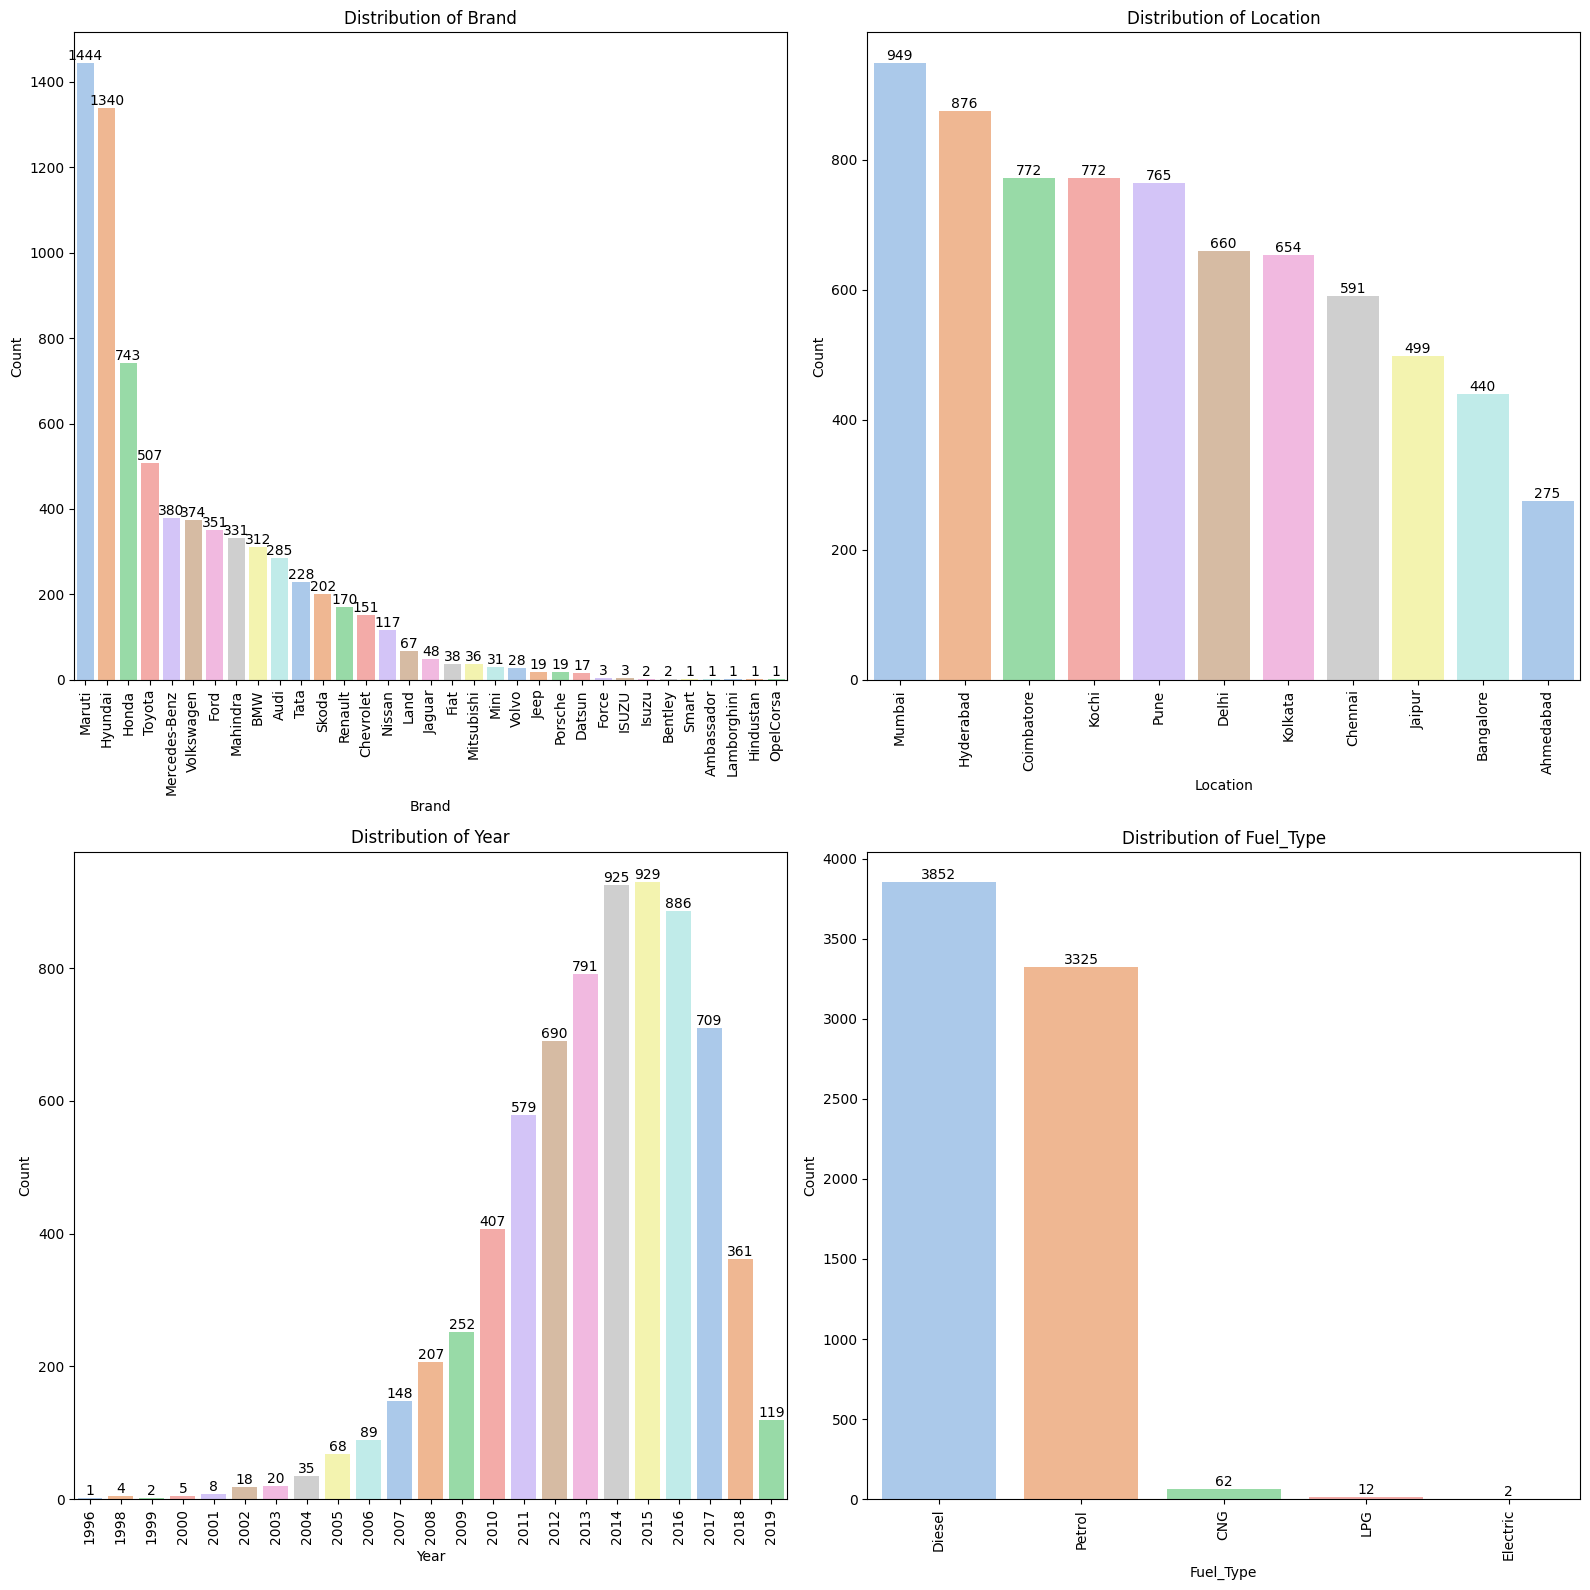

/tmp/ipykernel_1065872/1960474707.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='pastel')


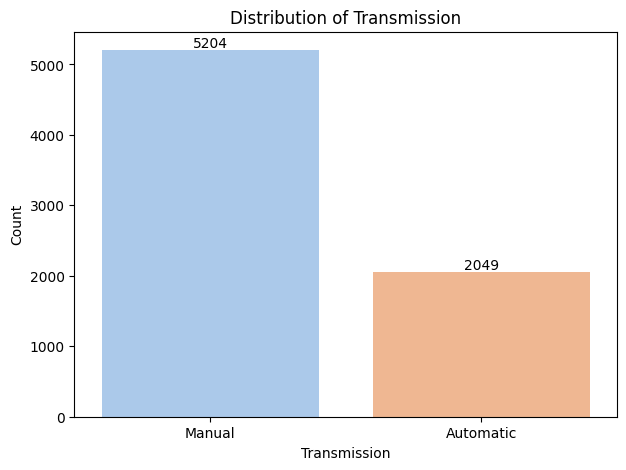

In [13]:
# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()  # Flatten the 2D array for easier iteration

# Plot bar graphs for the first 4 columns
for i, col in enumerate(categorical_columns[:4]):
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='pastel')
    
    # Add labels and title
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)
    
    # Annotate each bar with its count value
    for p in axes[i].containers:
        axes[i].bar_label(p, fmt='%d', label_type='edge')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Create a bar graph for the 5th column separately
plt.figure(figsize=(7, 5))
counts = df[categorical_columns[4]].value_counts()
ax = sns.barplot(x=counts.index, y=counts.values, palette='pastel')

# Add labels, title, and annotations for the 5th column
ax.set_title(f'Distribution of {categorical_columns[4]}')
ax.set_xlabel(categorical_columns[4])
ax.set_ylabel('Count')
for p in ax.containers:
    ax.bar_label(p, fmt='%d', label_type='edge')

plt.show()

In [14]:
# Function to display percentage distribution for each column
def display_percentage_distribution(column):
    value_counts = df[column].value_counts(normalize=True) * 100
    percentage_df = pd.DataFrame({
        'Attribute': value_counts.index,
        'Percentage': value_counts.values
    })
    
    # Print the DataFrame for each column
    print(f"\nPercentage Distribution for '{column}':")
    print(percentage_df)
    print('-' * 40)

# Calculate and display percentage distribution for each column individually
for col in categorical_columns:
    display_percentage_distribution(col)


Percentage Distribution for 'Brand':
        Attribute  Percentage
0          Maruti   19.909003
1         Hyundai   18.475114
2           Honda   10.244037
3          Toyota    6.990211
4   Mercedes-Benz    5.239211
5      Volkswagen    5.156487
6            Ford    4.839377
7        Mahindra    4.563629
8             BMW    4.301668
9            Audi    3.929409
10           Tata    3.143527
11          Skoda    2.785054
12        Renault    2.343858
13      Chevrolet    2.081897
14         Nissan    1.613126
15           Land    0.923756
16         Jaguar    0.661795
17           Fiat    0.523921
18     Mitsubishi    0.496346
19           Mini    0.427409
20          Volvo    0.386047
21           Jeep    0.261961
22        Porsche    0.261961
23         Datsun    0.234386
24          Force    0.041362
25          ISUZU    0.041362
26          Isuzu    0.027575
27        Bentley    0.027575
28          Smart    0.013787
29     Ambassador    0.013787
30    Lamborghini    0.013787
31

### Observations from Percentage Distribution
---

#### 1. Brand
- **Top Brands:**
  - Maruti (19.91%) and Hyundai (18.48%) dominate the dataset, comprising nearly 40% of the total cars.
  - Other significant brands include Honda (10.24%), Toyota (6.99%), and Mercedes-Benz (5.24%).
- **Luxury Brands:**
  - Premium brands like BMW (4.30%), Audi (3.93%), and Jaguar (0.66%) represent a smaller proportion, indicating fewer high-end vehicles.
- **Rare Brands:**
  - Brands like Smart, Lamborghini, Ambassador, and Bentley each account for less than 0.03% of the dataset.



#### 2. Location
- **Top Locations:**
  - Mumbai (13.08%), Hyderabad (12.08%), and Coimbatore/Kochi (10.64% each) account for nearly half of the total data.
  - Other major cities include Pune (10.55%), Delhi (9.10%), and Kolkata (9.02%).
- **Low Representation:**
  - Ahmedabad (3.79%) is the least represented among the primary cities, indicating less data from this region.



#### 3. Year
- **Recent Years:**
  - The majority of cars are from 2014–2017, with 2015 (12.81%) and 2014 (12.75%) leading the dataset.
- **Older Models:**
  - Cars from 2010 and earlier make up a smaller percentage, with 1996–2003 collectively accounting for less than 2%.
- **Trend:**
  - The dataset is heavily skewed towards cars manufactured in the last 10–15 years.



#### 4. Fuel_Type
- **Dominant Fuel Types:**
  - Diesel (53.11%) and Petrol (45.84%) dominate the dataset, comprising nearly all cars.
- **Alternative Fuels:**
  - CNG (0.85%) and LPG (0.17%) make up a small portion, indicating limited adoption of alternative fuels.
- **Electric Cars:**
  - Electric vehicles (0.03%) are rare, reflecting the nascent stage of EV adoption in the market.



#### 5. Transmission
- **Manual Dominance:**
  - Manual cars (71.75%) significantly outnumber automatic cars (28.25%), reflecting market preferences for manual transmission vehicles.
- **Automatic Cars:**
  - Although less common, automatic transmission is still a significant category, likely representing higher-end or newer vehicles.



#### 6. Owner_Type
- **First Owners:**
  - First owners dominate (82.06%), indicating the dataset primarily contains vehicles being sold by their original owners.
- **Second Owners:**
  - Second-hand cars make up 15.88%, a substantial but secondary segment.
- **Minimal Higher Ownership:**
  - Third owners (1.89%) and Fourth & Above (0.17%) have minimal representation, suggesting most cars are relatively new in terms of ownership.


#### Numerical Values

In [15]:
numerical_columns = ['Kilometers_Driven','Power','Seats','New_Price','Price','Mileage_kmpl','Engine_CC']

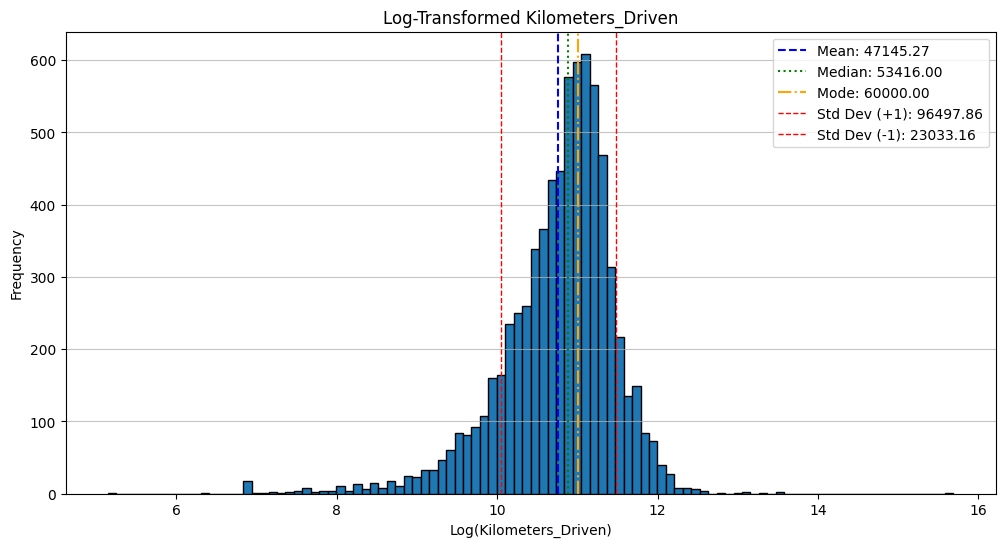

In [16]:
# Plot histogram (ignores NaN values automatically)
# Apply log transformation (np.log1p handles zero and NaN values) becuase the data is too skewed to visualize without using standardization
df['Kilometers_Driven_Log'] = np.log1p(df['Kilometers_Driven'])

# Calculate descriptive statistics (ignoring NaN values)
log_mean = df['Kilometers_Driven_Log'].mean()
log_median = df['Kilometers_Driven_Log'].median()
log_std_dev = df['Kilometers_Driven_Log'].std()
log_mode = df['Kilometers_Driven_Log'].mode()[0]  

# Convert the log-transformed statistics back to the original scale
mean = np.expm1(log_mean)
median = np.expm1(log_median)
std_dev_plus = np.expm1(log_mean + log_std_dev)
std_dev_minus = np.expm1(log_mean - log_std_dev)
mode = np.expm1(log_mode)

# Increase the plot size
plt.figure(figsize=(12, 6))  # Adjust the size as needed



# Plot histogram of the log-transformed data
plt.hist(df['Kilometers_Driven_Log'], bins=100, edgecolor='black')
plt.title('Log-Transformed Kilometers_Driven')
plt.xlabel('Log(Kilometers_Driven)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)


# Annotate mean, median, mode, and standard deviation (converted back to original scale)
plt.axvline(log_mean, color='blue', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
plt.axvline(log_median, color='green', linestyle='dotted', linewidth=1.5, label=f'Median: {median:.2f}')
plt.axvline(log_mode, color='orange', linestyle='dashdot', linewidth=1.5, label=f'Mode: {mode:.2f}')
plt.axvline(log_mean + log_std_dev, color='red', linestyle='dashed', linewidth=1, label=f'Std Dev (+1): {std_dev_plus:.2f}')
plt.axvline(log_mean - log_std_dev, color='red', linestyle='dashed', linewidth=1, label=f'Std Dev (-1): {std_dev_minus:.2f}')

# Add legend
plt.legend()


plt.show()

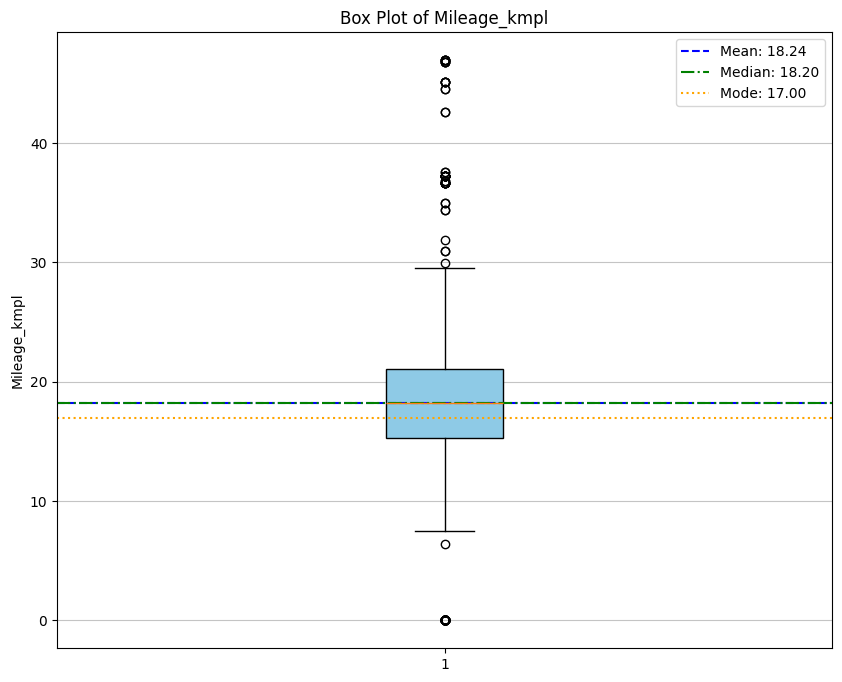

In [17]:
# Calculate mean, median, and mode, ignoring NaN values
mean = df['Mileage_kmpl'].mean()
median = df['Mileage_kmpl'].median()
mode = df['Mileage_kmpl'].mode()[0] 

# Increase the plot size
plt.figure(figsize=(10, 8))
#Plot box plot (ignores NaN values automatically)
box = plt.boxplot(df['Mileage_kmpl'].dropna(), patch_artist=True)
# Customize the box plot colors
for patch in box['boxes']:
    patch.set_facecolor('#8ecae6')  # Set the color of the box
plt.title('Box Plot of Mileage_kmpl')
plt.ylabel('Mileage_kmpl')
plt.grid(axis='y', alpha=0.75)

# Annotate mean, median, and mode with horizontal lines
plt.axhline(mean, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean:.2f}')
plt.axhline(median, color='green', linestyle='-.', linewidth=1.5, label=f'Median: {median:.2f}')
plt.axhline(mode, color='orange', linestyle=':', linewidth=1.5, label=f'Mode: {mode:.2f}')

# Add legend
plt.legend(loc='upper right')


plt.show()

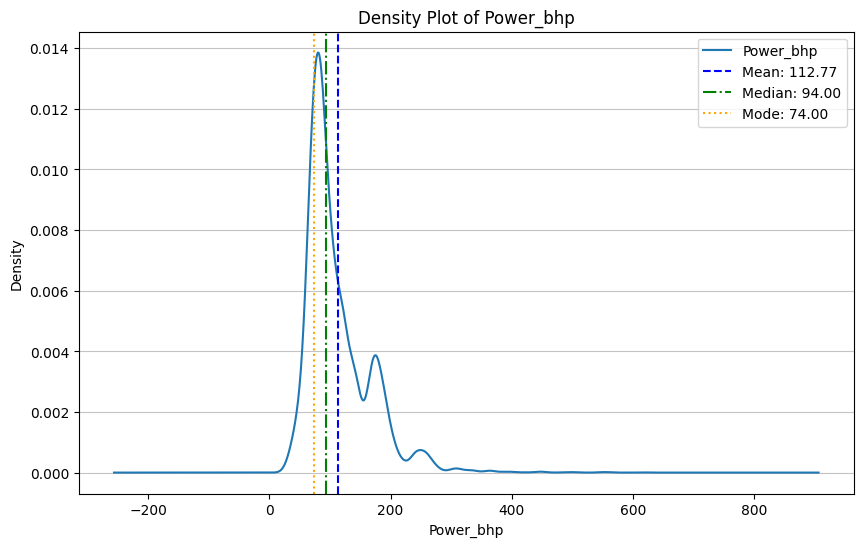

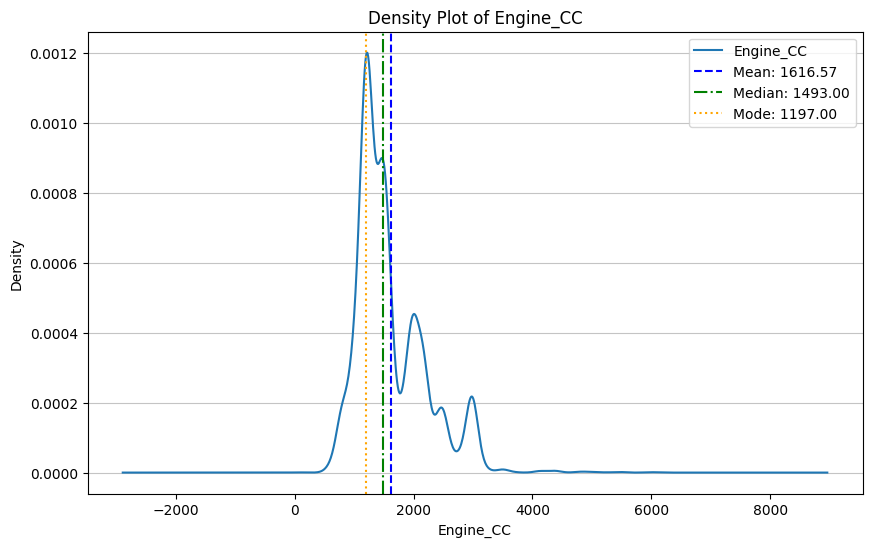

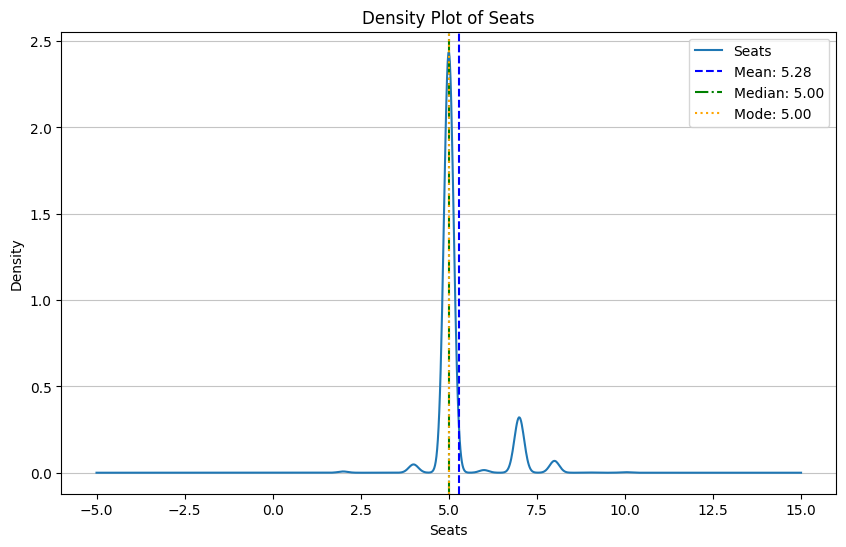

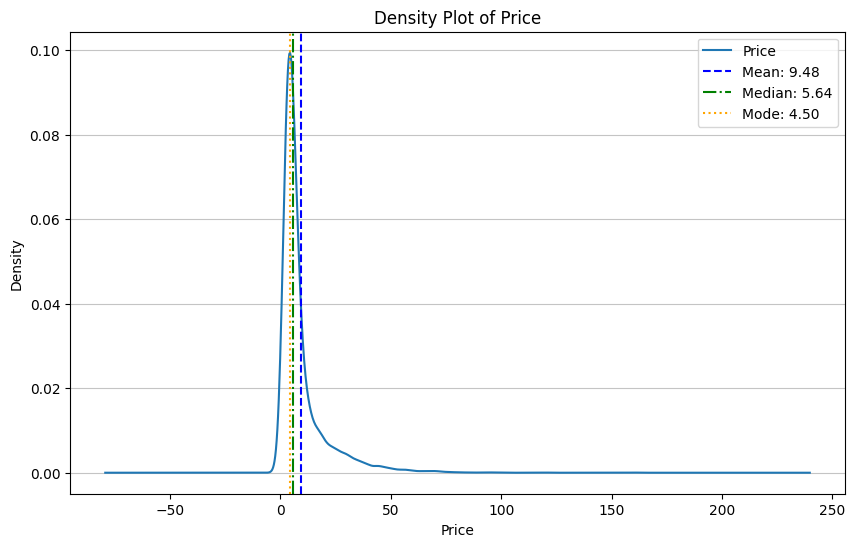

In [18]:
# Function to plot density plot with mean, median, and mode
def plot_density_with_stats(column):
    # Drop NaN values for the column
    data = df[column].dropna()
    
    # Calculate mean, median, and mode
    mean = data.mean()
    median = data.median()
    mode = data.mode()[0]  # Take the first mode in case of multiple

    # Plot density while ignoring NaN values
    plt.figure(figsize=(10, 6))
    data.plot(kind='kde')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.grid(axis='y', alpha=0.75)
    
    # Annotate mean, median, and mode
    plt.axvline(mean, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-.', linewidth=1.5, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='orange', linestyle=':', linewidth=1.5, label=f'Mode: {mode:.2f}')
    
    # Add legend
    plt.legend()
    plt.show()

# Plot density plots for each column with mean, median, and mode
plot_density_with_stats('Power_bhp')
plot_density_with_stats('Engine_CC')
plot_density_with_stats('Seats')
plot_density_with_stats('Price')

### Observation
- The data for Power_bhp, Engine_CC and seats are not normally distribute. (Graph 1, 2 and 3)
- The data for the Price is Normally distributed.

### **Bivariate Analysis**

### Numerical vs Numerical ###
Correlation Matrix:
                   Kilometers_Driven  Power_bhp     Seats     Price  \
Kilometers_Driven           1.000000   0.030164  0.090221 -0.011493   
Power_bhp                   0.030164   1.000000  0.095905  0.772566   
Seats                       0.090221   0.095905  1.000000  0.052225   
Price                      -0.011493   0.772566  0.052225  1.000000   
Mileage_kmpl               -0.066178  -0.518869 -0.301596 -0.300072   
Engine_CC                   0.094818   0.859771  0.399262  0.658354   

                   Mileage_kmpl  Engine_CC  
Kilometers_Driven     -0.066178   0.094818  
Power_bhp             -0.518869   0.859771  
Seats                 -0.301596   0.399262  
Price                 -0.300072   0.658354  
Mileage_kmpl           1.000000  -0.578661  
Engine_CC             -0.578661   1.000000  


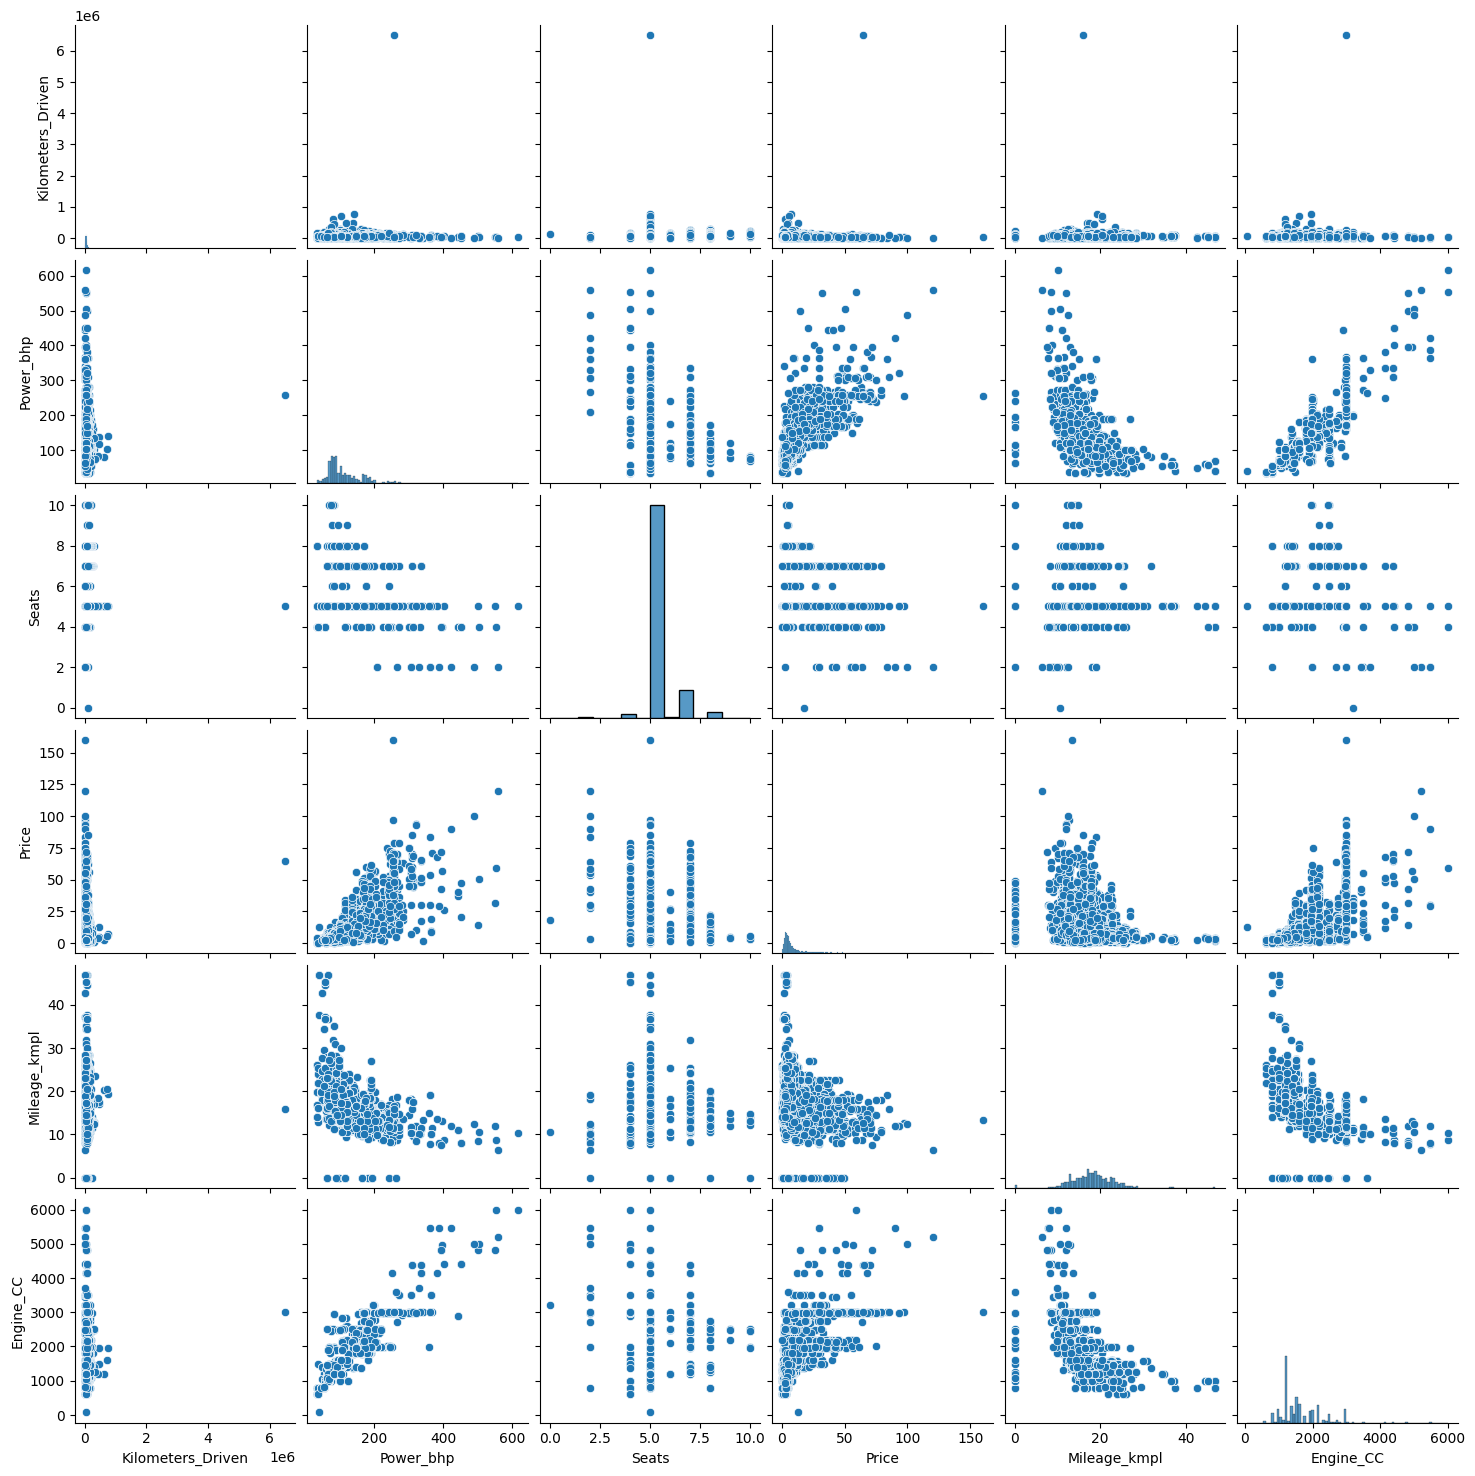

In [19]:
## Categorical columns
categorical_columns = ['Brand','Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']
numerical_columns = ['Kilometers_Driven','Power_bhp','Seats','Price','Mileage_kmpl','Engine_CC']

# 1. Numerical vs Numerical: Scatter plots and correlation coefficients
def numerical_vs_numerical(df, numerical_columns):
    print("Correlation Matrix:")
    corr_matrix = df[numerical_columns].corr()
    print(corr_matrix)

    sns.pairplot(df[numerical_columns])
    plt.show()

# Perform bivariate analysis
print("### Numerical vs Numerical ###")
numerical_vs_numerical(df, numerical_columns)

### Categorical columns  Bivariate Analysis Observations
---

1. **Kilometers_Driven_Log**  
   - Weak negative correlation with Price (-0.186): Higher mileage slightly reduces price.  
   - Slight positive correlation with Seats (0.188): More seats may indicate higher usage.  
   - Weak positive correlation with Engine_CC (0.153): Larger engines slightly correlate with more usage.

2. **Power_bhp**  
   - Strong positive correlation with Engine_CC (0.860): Larger engines produce more power.  
   - Strong positive correlation with Price (0.773): Powerful cars are priced higher.  
   - Moderate negative correlation with Mileage_kmpl (-0.519): Higher power reduces fuel efficiency.

3. **Seats**  
   - Moderate positive correlation with Engine_CC (0.399): More seats require larger engines.  
   - Moderate negative correlation with Mileage_kmpl (-0.302): Larger vehicles are less efficient.  
   - Minimal correlation with Price (0.052): Seats have little impact on price.

4. **Price**  
   - Strong positive correlation with Power_bhp (0.773) and Engine_CC (0.658): Performance impacts price.  
   - Moderate negative correlation with Mileage_kmpl (-0.300): Less efficient cars are pricier.  
   - Weak negative correlation with Kilometers_Driven_Log (-0.186): Usage slightly decreases value.

5. **Mileage_kmpl**  
   - Moderate negative correlation with Engine_CC (-0.579) and Power_bhp (-0.519): Larger, powerful engines reduce efficiency.  
   - Moderate negative correlation with Seats (-0.302): More seats mean lower efficiency.  

6. **Engine_CC**  
   - Strong positive correlation with Power_bhp (0.860): Engine size directly relates to power.  
   - Moderate positive correlation with Price (0.658): Larger engines increase cost.  
   - Moderate negative correlation with Mileage_kmpl (-0.579): Larger engines are less efficient.

### Key Insights
- **Performance vs. Efficiency:** Trade-off between Power_bhp, Engine_CC, and Mileage_kmpl.  
- **Price Drivers:** Strongly influenced by Power_bhp and Engine_CC.  
- **Minimal Impact of Seats:** Seats have negligible effect on price.  
- **Multicollinearity:** High correlation between Engine_CC and Power_bhp (0.860).


#### Categorical vs Numerical values


### Categorical vs Numerical ###

Statistics for Kilometers_Driven_Log by Brand:

                count       mean       std        min        25%        50%  \
Brand                                                                         
Ambassador        1.0  11.289794       NaN  11.289794  11.289794  11.289794   
Audi            285.0  10.792935  0.513470   8.820847  10.596660  10.874853   
BMW             312.0  10.779031  0.683222   7.244942  10.397446  10.909484   
Bentley           2.0  10.563591  0.304602  10.348205  10.455898  10.563591   
Chevrolet       151.0  10.926248  0.579965   8.781555  10.707481  11.038801   
Datsun           17.0   9.821703  0.644724   8.699681   9.457279   9.927595   
Fiat             38.0  10.804517  0.917592   6.908755  10.491642  10.909110   
Force             3.0  10.687501  0.114573  10.621352  10.621352  10.621352   
Ford            351.0  10.803644  0.845976   6.908755  10.479895  11.017399   
Hindustan         1.0  11.082158       NaN  11.0

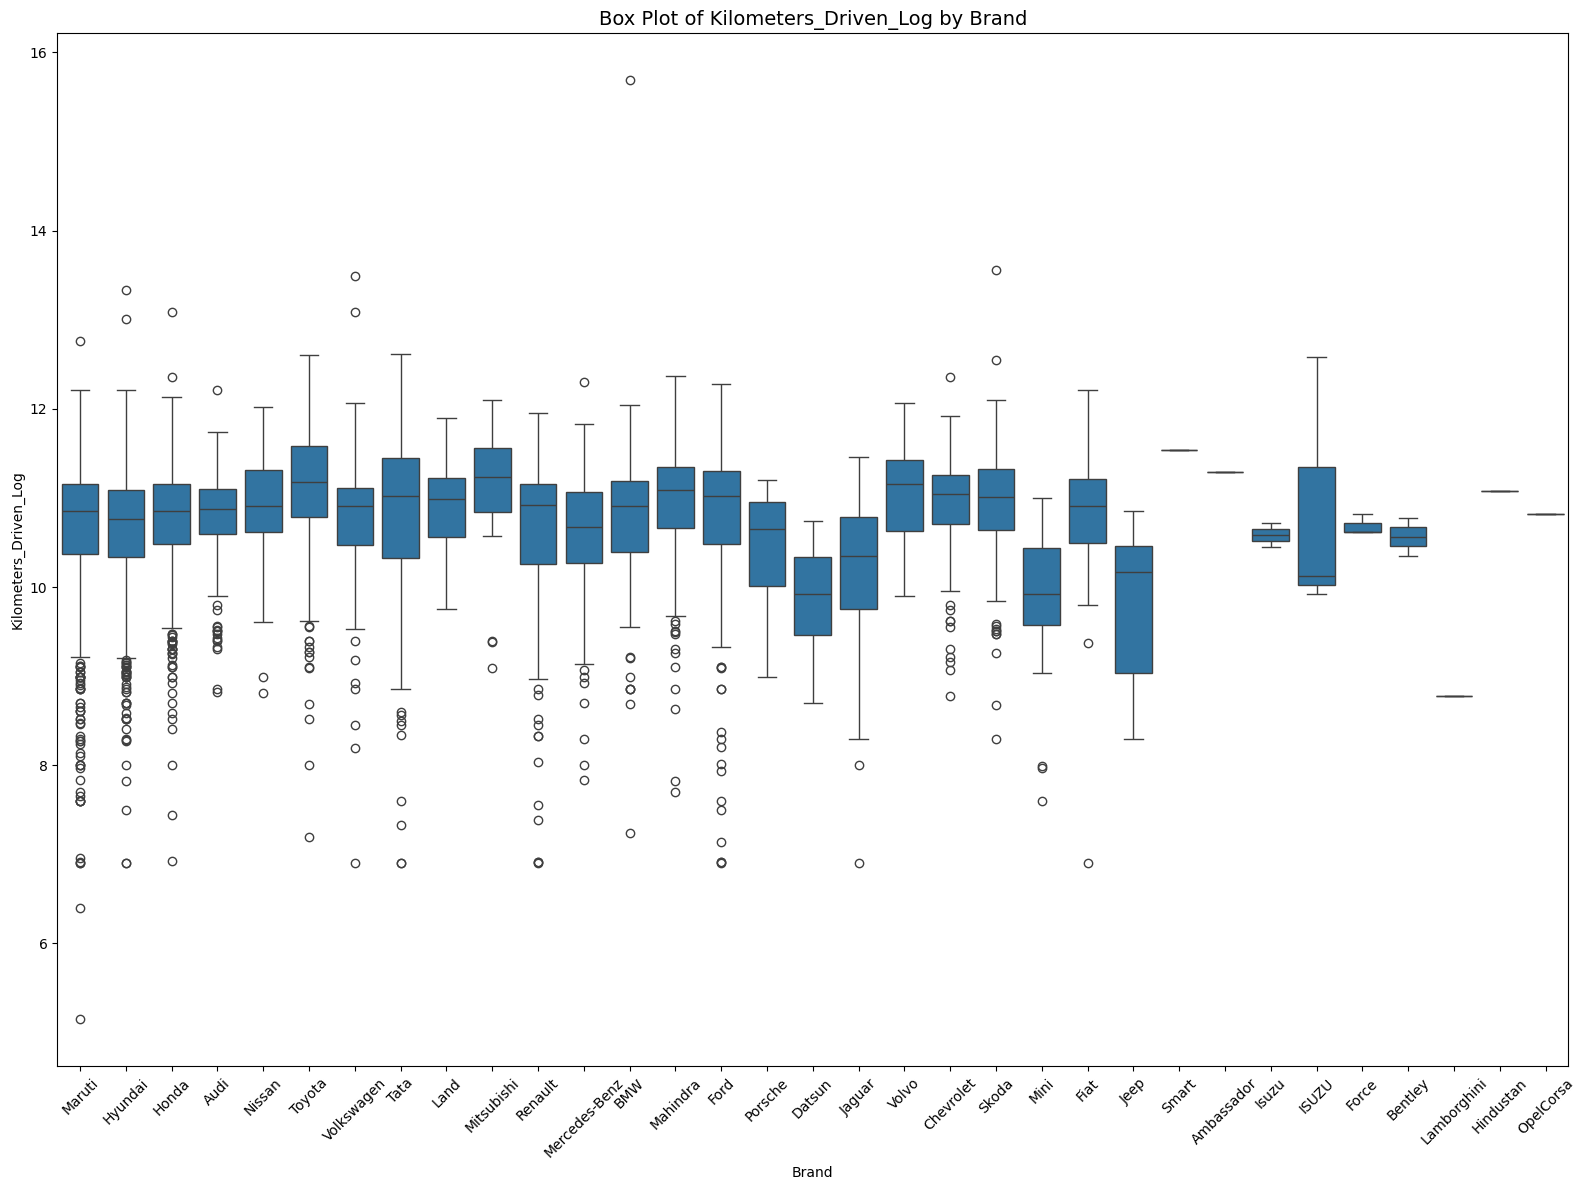


Statistics for Power_bhp by Brand:

                count        mean        std     min       25%      50%  \
Brand                                                                     
Ambassador        1.0   35.500000        NaN   35.50   35.5000   35.500   
Audi            284.0  189.340246  44.825204  132.00  174.3000  174.330   
BMW             305.0  210.728820  47.033534  143.00  184.0000  190.000   
Bentley           2.0  584.000000  45.254834  552.00  568.0000  584.000   
Chevrolet       150.0   90.909333  33.790613   56.30   62.1000   79.400   
Datsun           17.0   60.644706   6.965625   53.00   53.6400   67.000   
Fiat             32.0   89.028125  17.113319   67.00   75.7500   90.600   
Force             3.0  139.030000   0.034641  139.01  139.0100  139.010   
Ford            343.0   96.364490  36.023687   67.00   68.0500   89.840   
Hindustan         0.0         NaN        NaN     NaN       NaN      NaN   
Honda           736.0  108.450707  22.338732   78.00   88.7000 

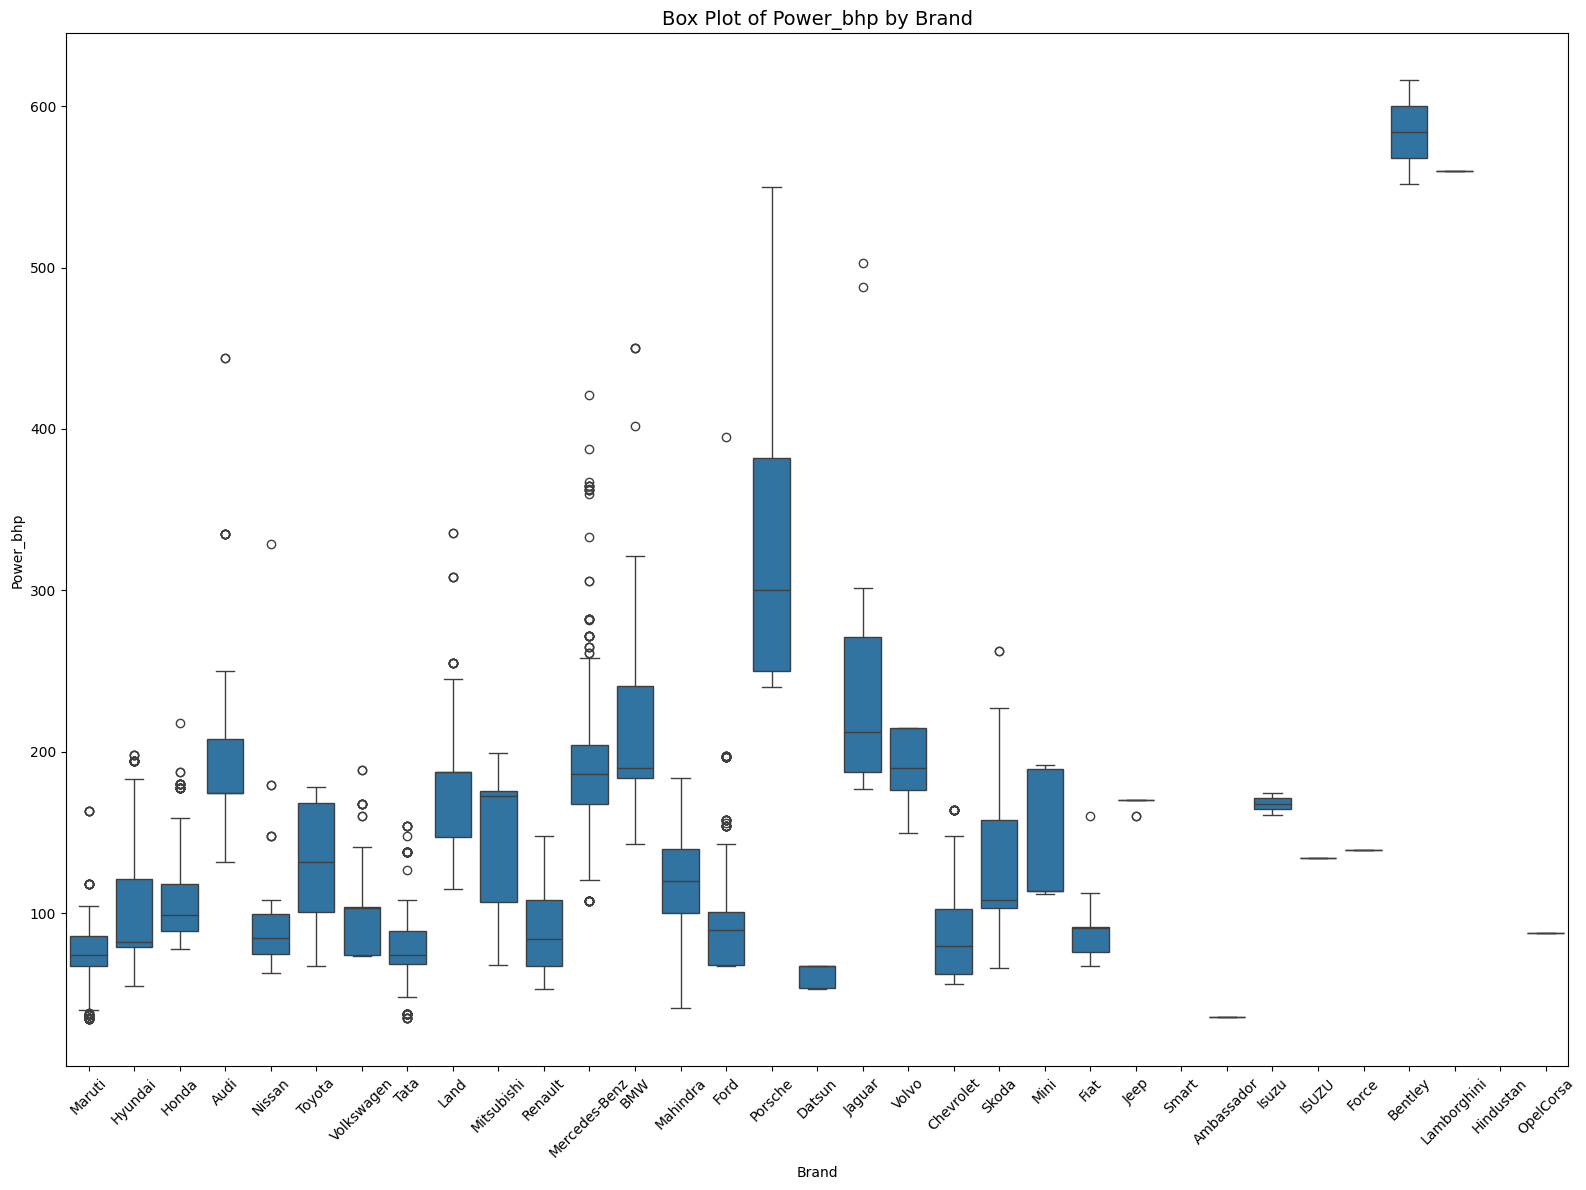


Statistics for Price by Brand:

                count        mean        std     min       25%      50%  \
Brand                                                                     
Ambassador        1.0    1.350000        NaN    1.35    1.3500    1.350   
Audi            236.0   25.537712  12.344783    7.50   17.5000   23.500   
BMW             267.0   25.243146  15.164924    6.30   13.9250   21.000   
Bentley           1.0   59.000000        NaN   59.00   59.0000   59.000   
Chevrolet       121.0    3.044463   1.827563    0.75    1.7500    2.500   
Datsun           13.0    3.049231   0.476156    2.25    2.7000    3.100   
Fiat             28.0    3.269286   1.901356    0.55    2.0875    2.600   
Force             3.0    9.333333   2.309401    8.00    8.0000    8.000   
Ford            300.0    6.889400   7.508742    0.69    2.7500    5.345   
Hindustan         0.0         NaN        NaN     NaN       NaN      NaN   
Honda           608.0    5.411743   2.541032    0.90    3.5400    4

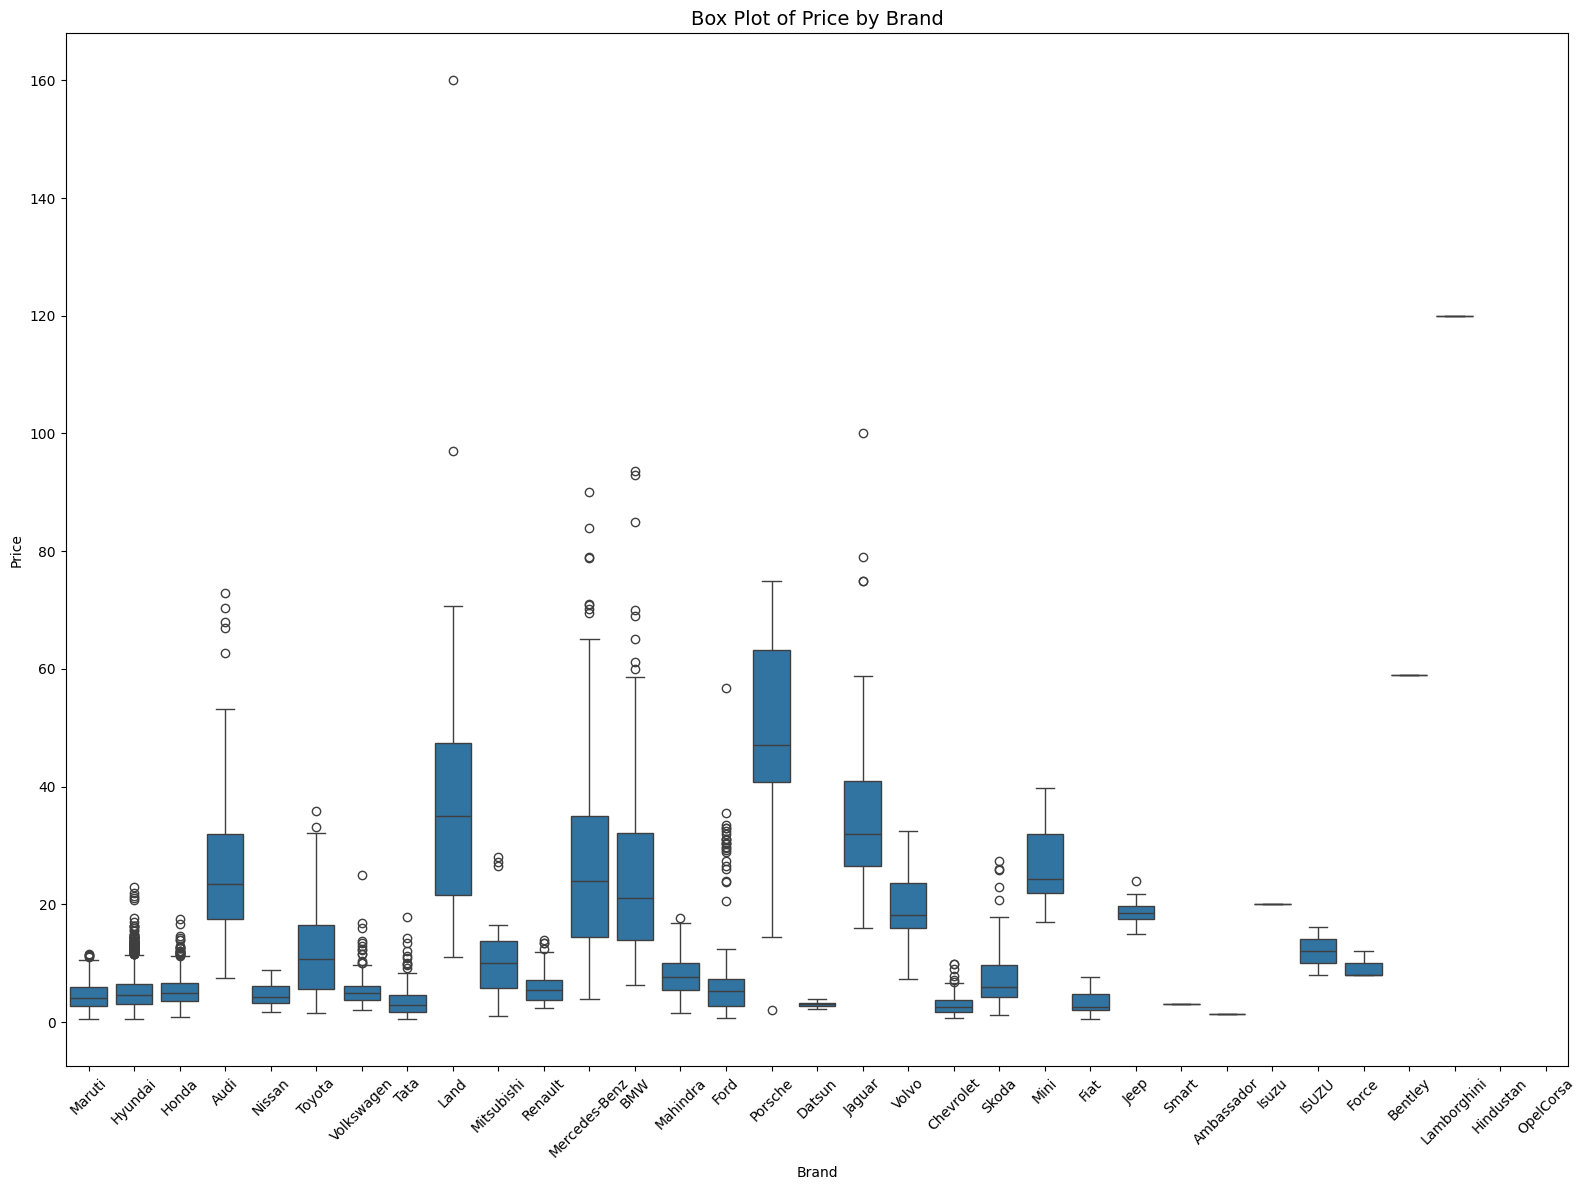


Statistics for Mileage_kmpl by Brand:

                count       mean       std    min      25%     50%     75%  \
Brand                                                                        
Ambassador        1.0  12.800000       NaN  12.80  12.8000  12.800  12.800   
Audi            285.0  15.360140  2.619630   0.00  13.2200  15.730  17.320   
BMW             312.0  16.976026  3.785172   7.94  15.0600  17.050  18.880   
Bentley           2.0   9.400000  1.131371   8.60   9.0000   9.400   9.800   
Chevrolet       151.0  18.306556  3.725408  11.50  15.2600  18.100  18.600   
Datsun           17.0  21.345294  1.359168  19.44  19.8300  20.630  22.700   
Fiat             38.0  17.389474  3.801692   0.00  15.7000  18.400  20.400   
Force             3.0  17.000000  0.000000  17.00  17.0000  17.000  17.000   
Ford            351.0  18.476382  4.079541   0.00  15.6000  18.880  22.700   
Hindustan         1.0  14.100000       NaN  14.10  14.1000  14.100  14.100   
Honda           743.0  1

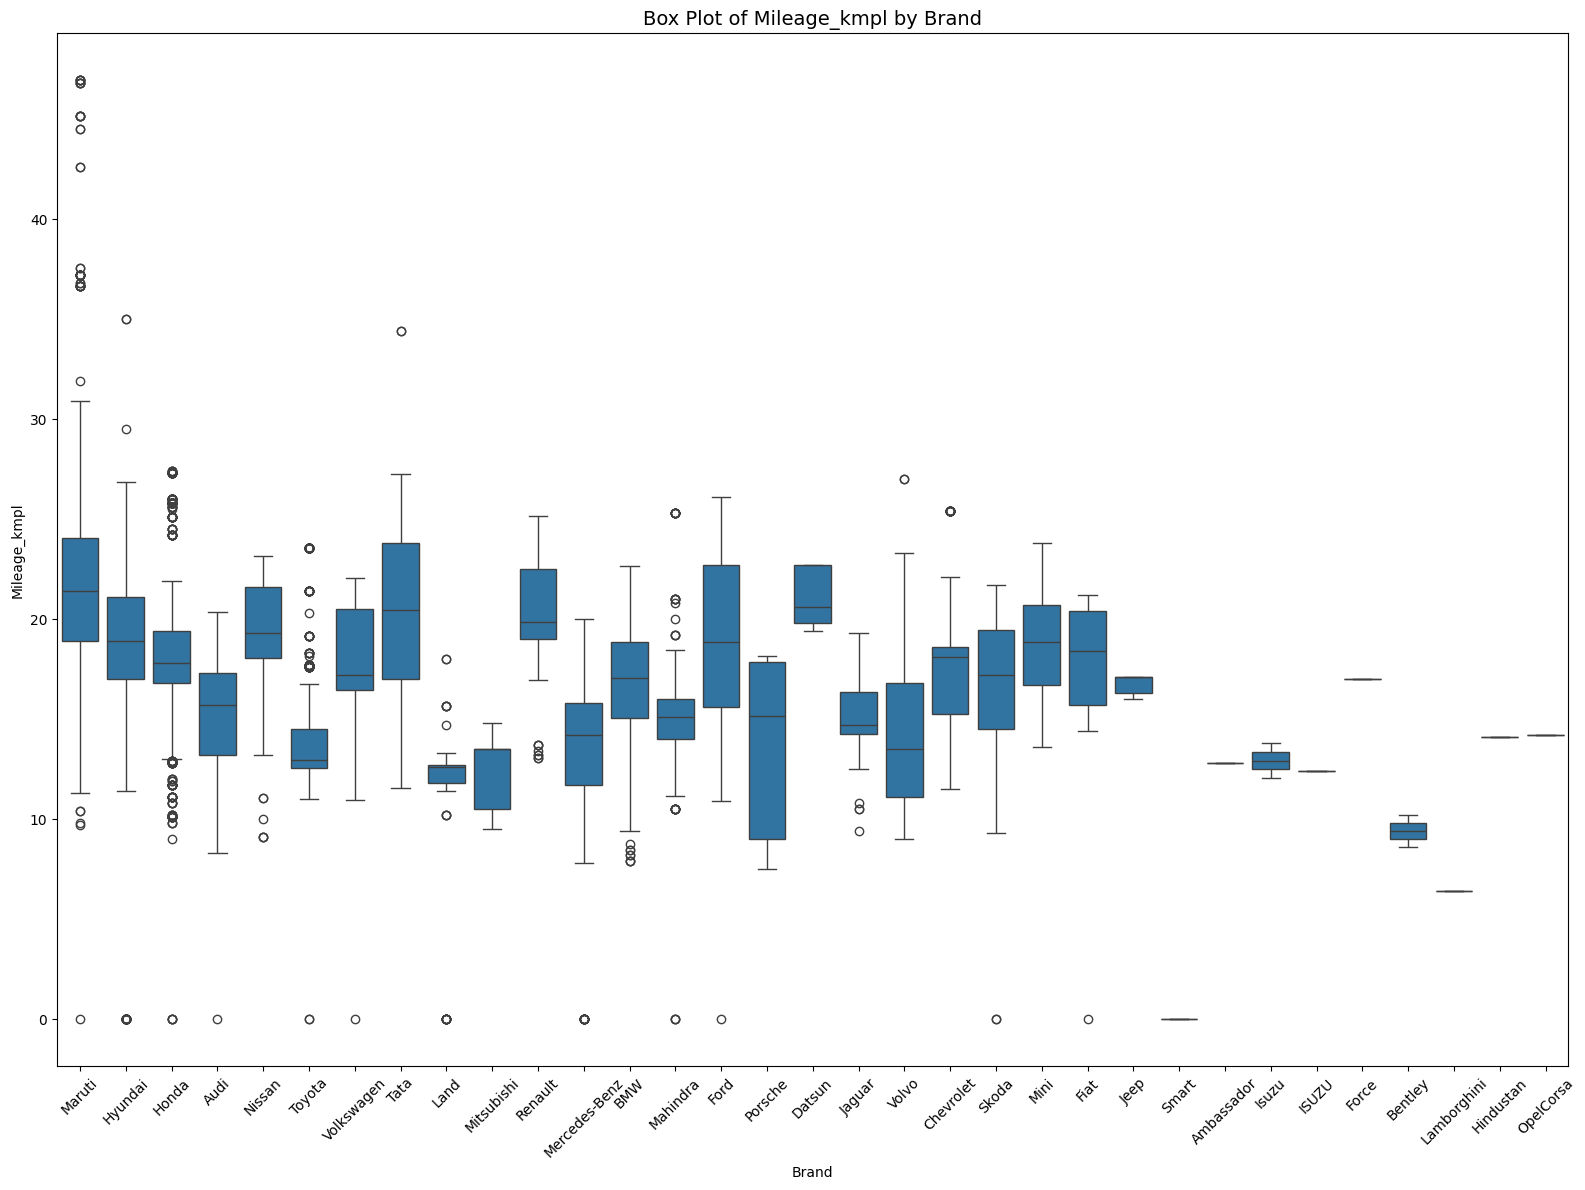


Statistics for Engine_CC by Brand:

                count         mean         std     min     25%     50%  \
Brand                                                                    
Ambassador        1.0  1489.000000         NaN  1489.0  1489.0  1489.0   
Audi            285.0  2245.452632  515.075561  1395.0  1968.0  1968.0   
BMW             305.0  2330.603279  507.114330  1995.0  1995.0  1995.0   
Bentley           2.0  5998.000000    0.000000  5998.0  5998.0  5998.0   
Chevrolet       151.0  1370.125828  409.705818   936.0   995.0  1199.0   
Datsun           17.0  1010.235294  205.283806   799.0   799.0  1198.0   
Fiat             34.0  1274.000000   66.101850  1172.0  1248.0  1248.0   
Force             3.0  2183.000000   29.444864  2149.0  2174.5  2200.0   
Ford            351.0  1583.575499  522.875314   999.0  1399.0  1498.0   
Hindustan         1.0  1995.000000         NaN  1995.0  1995.0  1995.0   
Honda           737.0  1503.194030  297.679945  1198.0  1199.0  1497.0   
H

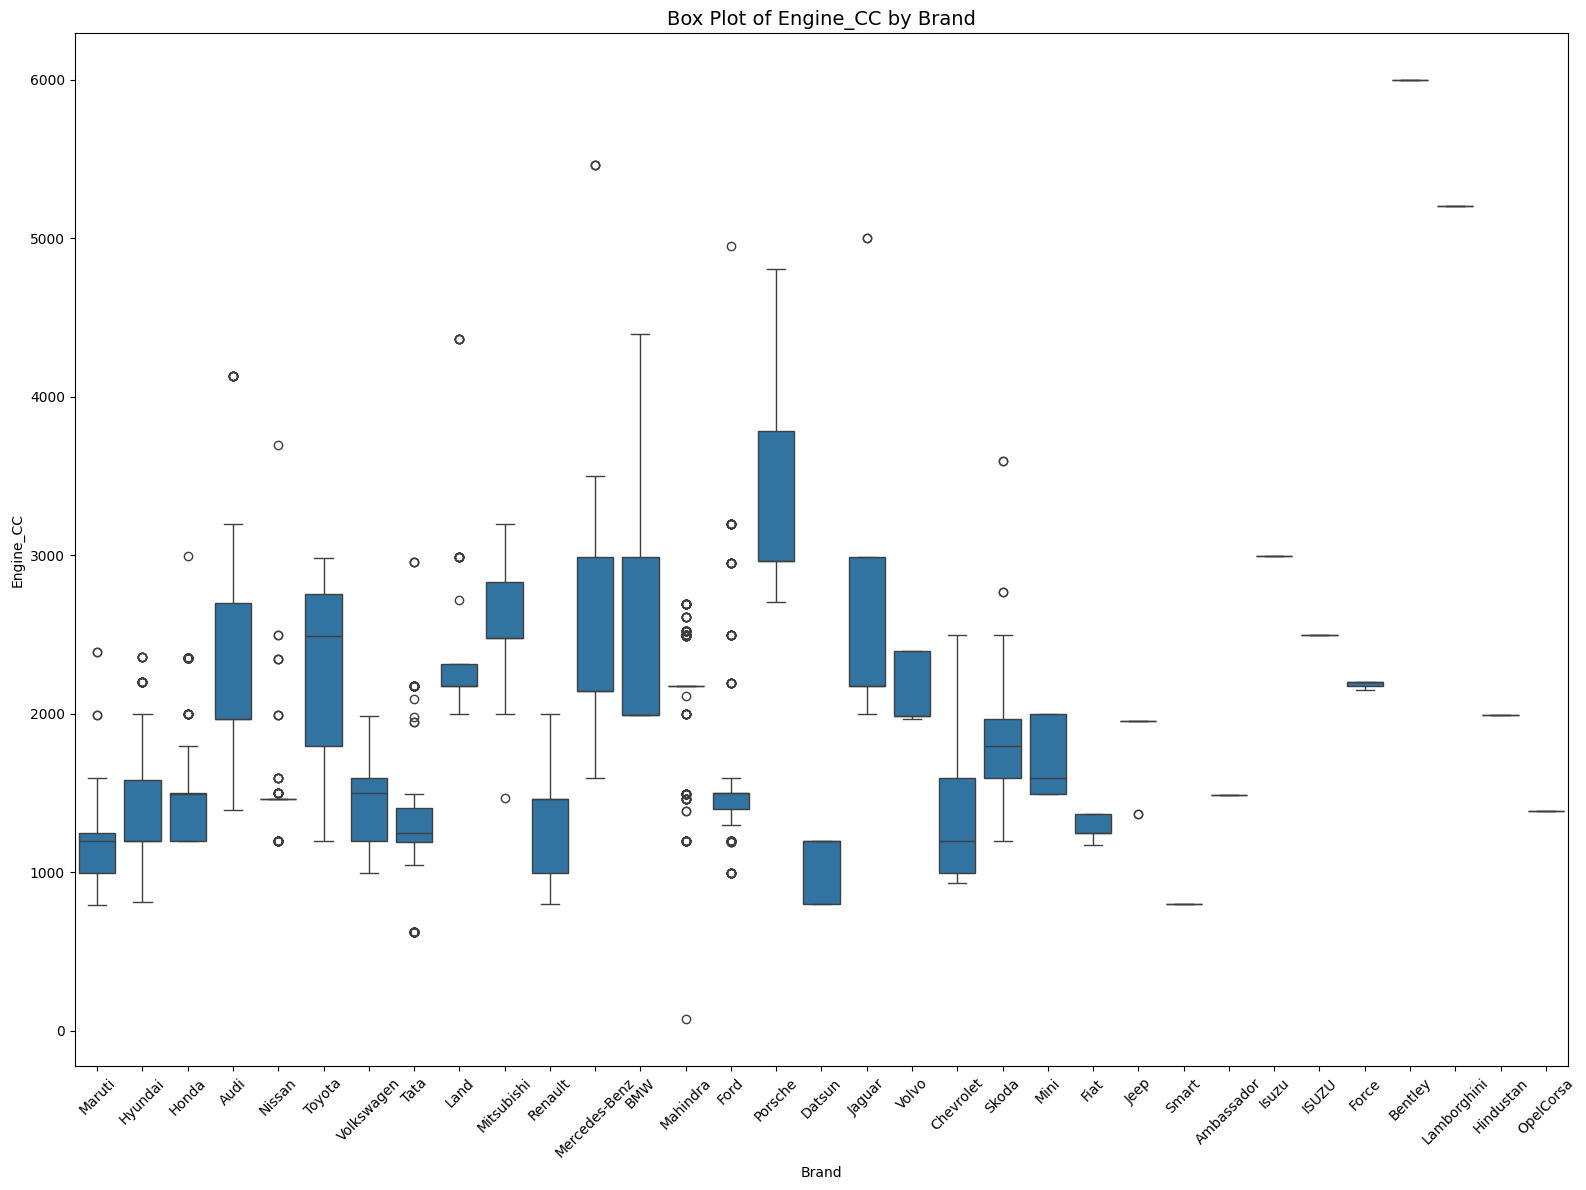


Statistics for Kilometers_Driven_Log by Location:

            count       mean       std       min        25%        50%  \
Location                                                                 
Ahmedabad   275.0  10.793969  0.595737  6.908755  10.621352  10.921667   
Bangalore   440.0  10.807541  0.581189  7.194437  10.518700  10.895831   
Chennai     591.0  11.032163  0.743815  8.006701  10.694235  11.127278   
Coimbatore  772.0  10.622520  0.559440  7.834788  10.270013  10.709584   
Delhi       660.0  10.818003  0.563463  6.908755  10.596660  11.002117   
Hyderabad   876.0  10.984209  0.684636  6.908755  10.742481  11.127278   
Jaipur      499.0  10.997563  0.721245  6.908755  10.761105  11.109024   
Kochi       772.0  10.584751  0.569408  8.040125  10.300620  10.667571   
Kolkata     654.0  10.451985  0.748985  6.908755  10.272184  10.592300   
Mumbai      949.0  10.473171  0.831683  5.147494  10.085851  10.626096   
Pune        765.0  10.992752  0.739310  6.908755  10.720024 

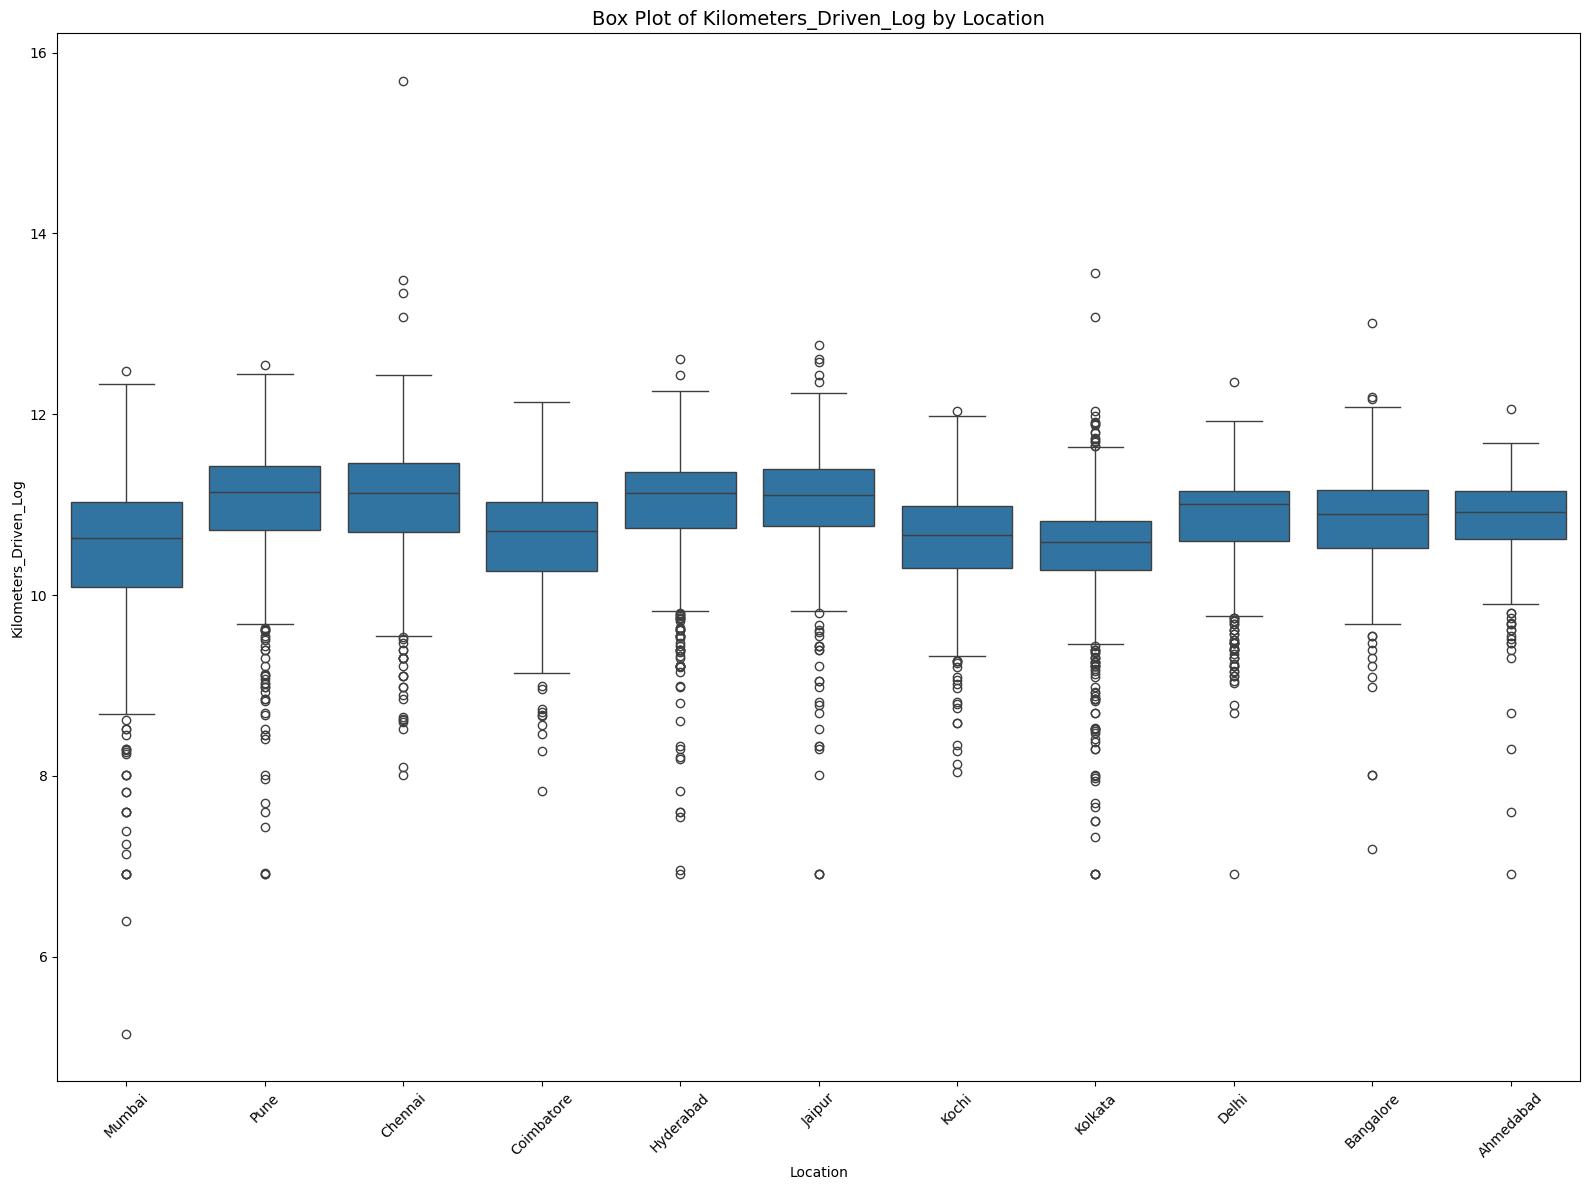


Statistics for Power_bhp by Location:

            count        mean        std    min      25%     50%       75%  \
Location                                                                     
Ahmedabad   271.0  110.475867  45.690542  37.48  78.9000   98.60  139.0150   
Bangalore   423.0  132.902931  65.151338  34.20  83.4500  120.00  171.0000   
Chennai     570.0  106.732000  47.222759  35.50  73.9475   88.76  125.0000   
Coimbatore  762.0  123.656260  61.545421  34.20  81.8375  102.60  166.9500   
Delhi       650.0  120.329754  54.450447  37.48  81.8300  103.52  153.3950   
Hyderabad   850.0  110.154118  54.827178  34.20  73.9000   90.00  138.0225   
Jaipur      485.0   93.008918  37.028425  34.20  68.0500   83.10  108.4500   
Kochi       765.0  114.912562  54.572022  34.20  81.8300   98.59  140.0000   
Kolkata     633.0  100.656761  45.985964  34.20  74.0000   86.80  117.3000   
Mumbai      935.0  120.505070  55.776763  34.20  82.6250  103.52  147.5100   
Pune        734.0  103.1

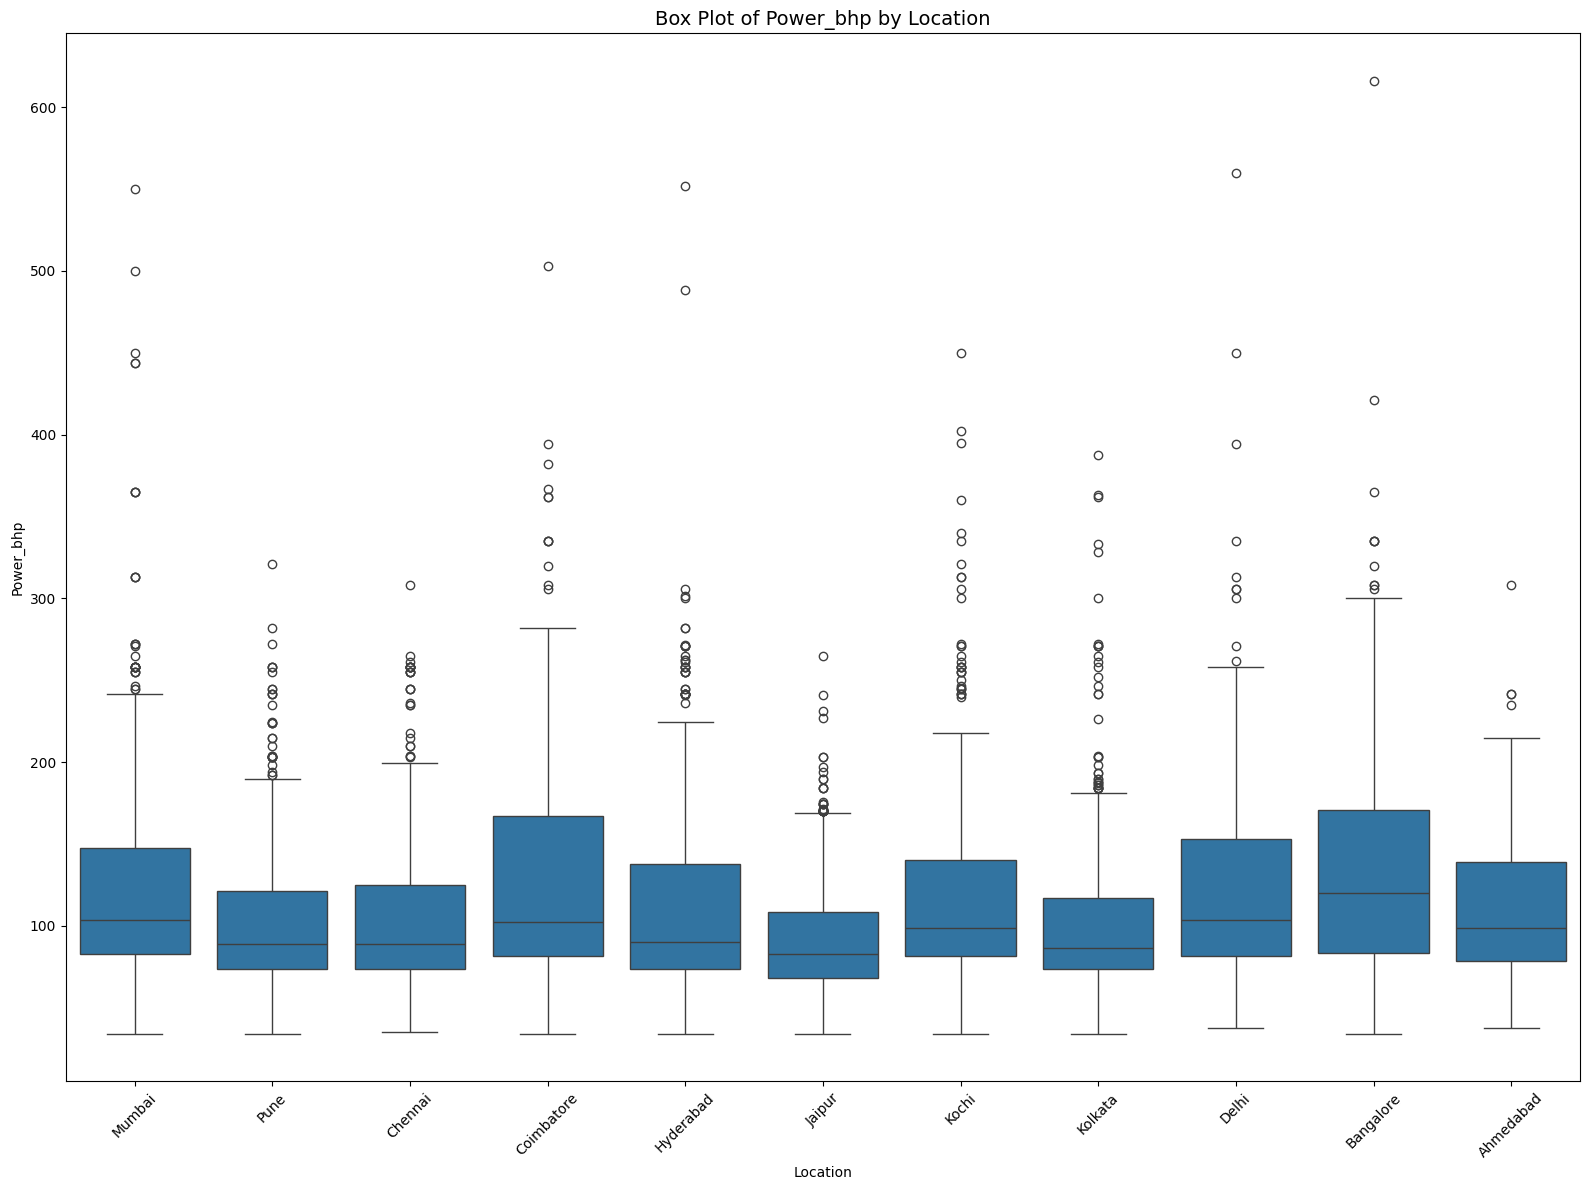


Statistics for Price by Location:

            count       mean        std   min     25%    50%      75%     max
Location                                                                     
Ahmedabad   224.0   8.457321   8.420831  0.75  3.7875  5.900  10.6000   85.00
Bangalore   358.0  13.328631  14.355979  1.35  4.4500  6.850  18.4375   93.00
Chennai     494.0   7.753623   9.719775  0.65  2.8000  4.500   7.5000   70.00
Coimbatore  636.0  15.078223  14.919149  1.68  5.6950  8.305  18.6075   93.67
Delhi       554.0   9.707726  11.535617  0.75  3.6000  5.500  11.0000  120.00
Hyderabad   742.0   9.776550  11.985954  0.60  3.5500  5.800   9.9975  160.00
Jaipur      413.0   5.809225   5.896394  0.45  2.5000  4.250   6.5000   42.50
Kochi       651.0  11.179186  11.845650  1.26  4.7750  6.710  11.7950   97.07
Kolkata     535.0   5.661215   6.948479  0.65  2.6000  3.750   5.8750   75.00
Mumbai      790.0   9.429329  10.194369  0.55  3.7500  5.750  10.0825   75.00
Pune        622.0   6.726254

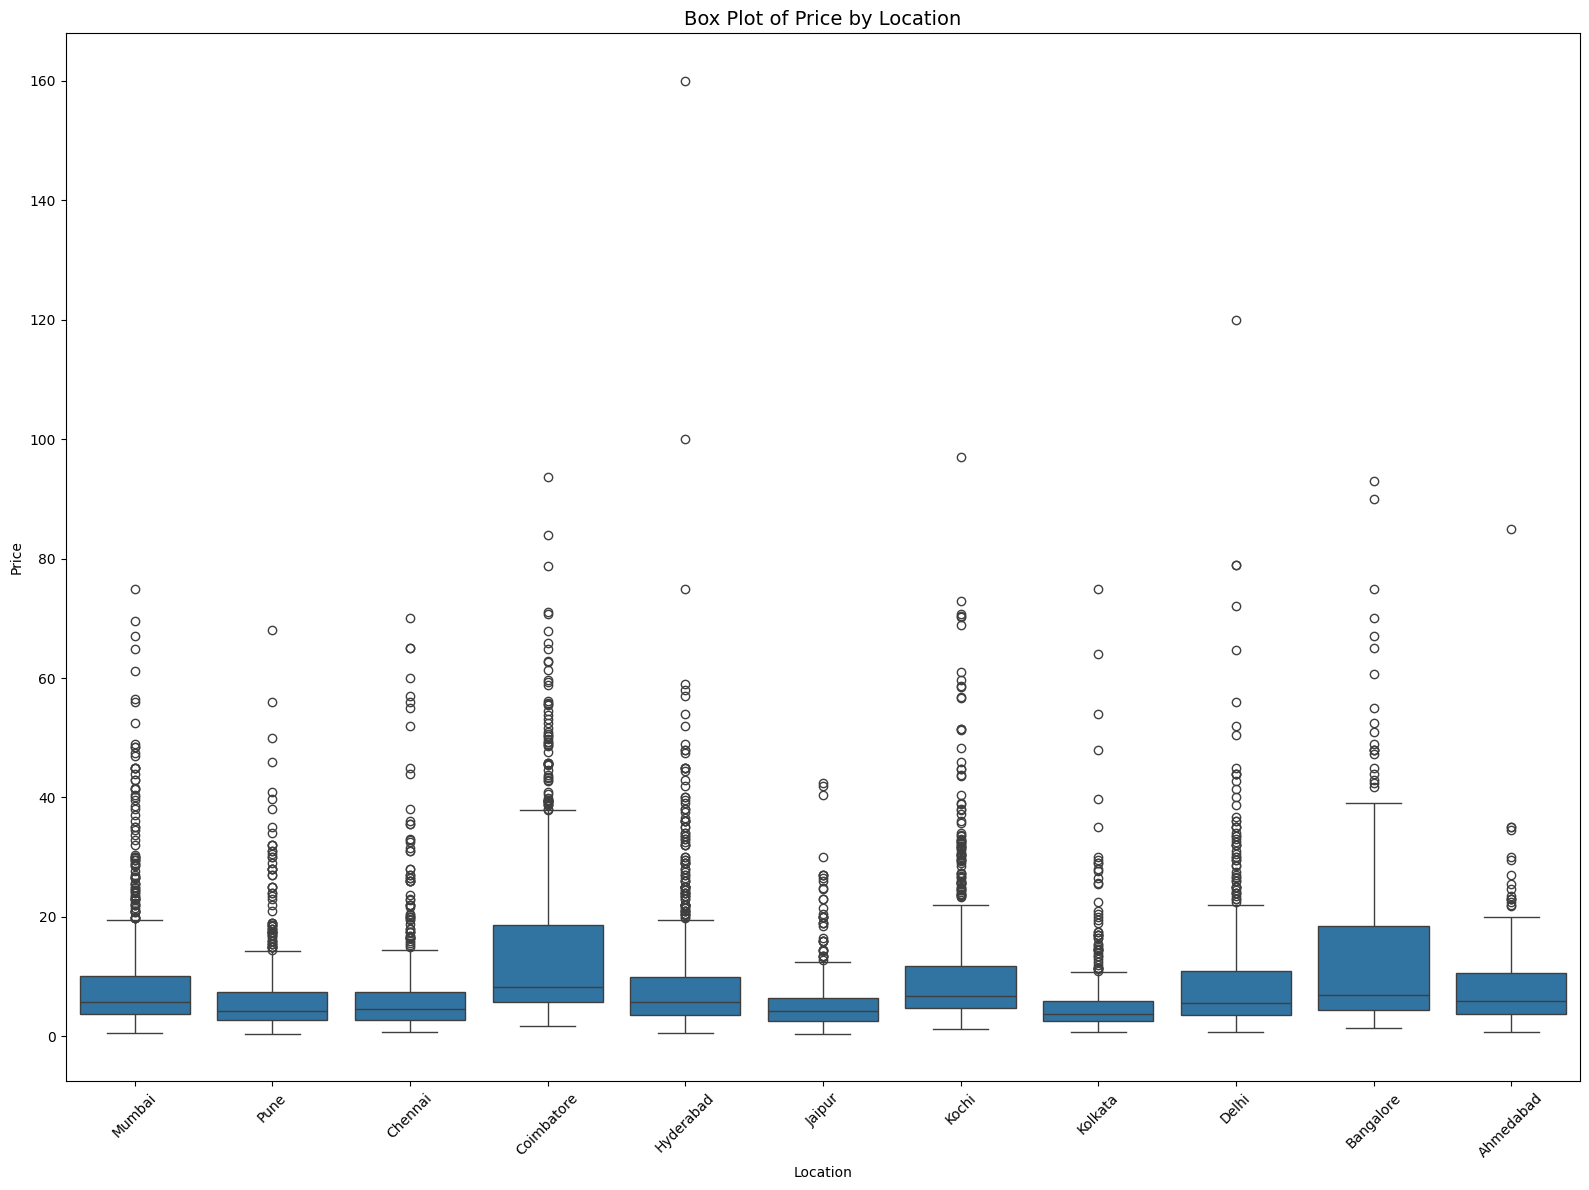


Statistics for Mileage_kmpl by Location:

            count       mean       std  min      25%    50%      75%     max
Location                                                                    
Ahmedabad   275.0  18.836145  5.540591  0.0  16.0100  18.90  22.4800  37.240
Bangalore   440.0  16.768209  4.782443  0.0  14.0000  17.00  19.6000  28.090
Chennai     590.0  18.042119  4.656446  0.0  15.3000  18.20  20.7700  35.000
Coimbatore  772.0  17.898187  4.234054  0.0  15.1000  18.16  20.4625  28.400
Delhi       660.0  18.118527  5.327880  0.0  14.4675  17.75  20.9650  46.956
Hyderabad   876.0  18.518587  4.958494  0.0  15.0750  18.88  22.0000  37.562
Jaipur      499.0  19.054649  4.575561  0.0  16.3300  19.30  22.1950  36.680
Kochi       772.0  18.757733  4.672022  0.0  16.0900  18.60  21.4300  46.816
Kolkata     654.0  19.202972  4.320399  0.0  17.0000  18.95  22.1000  42.644
Mumbai      948.0  17.493021  4.656307  0.0  14.7400  17.30  19.8100  46.956
Pune        765.0  18.213480  5.3

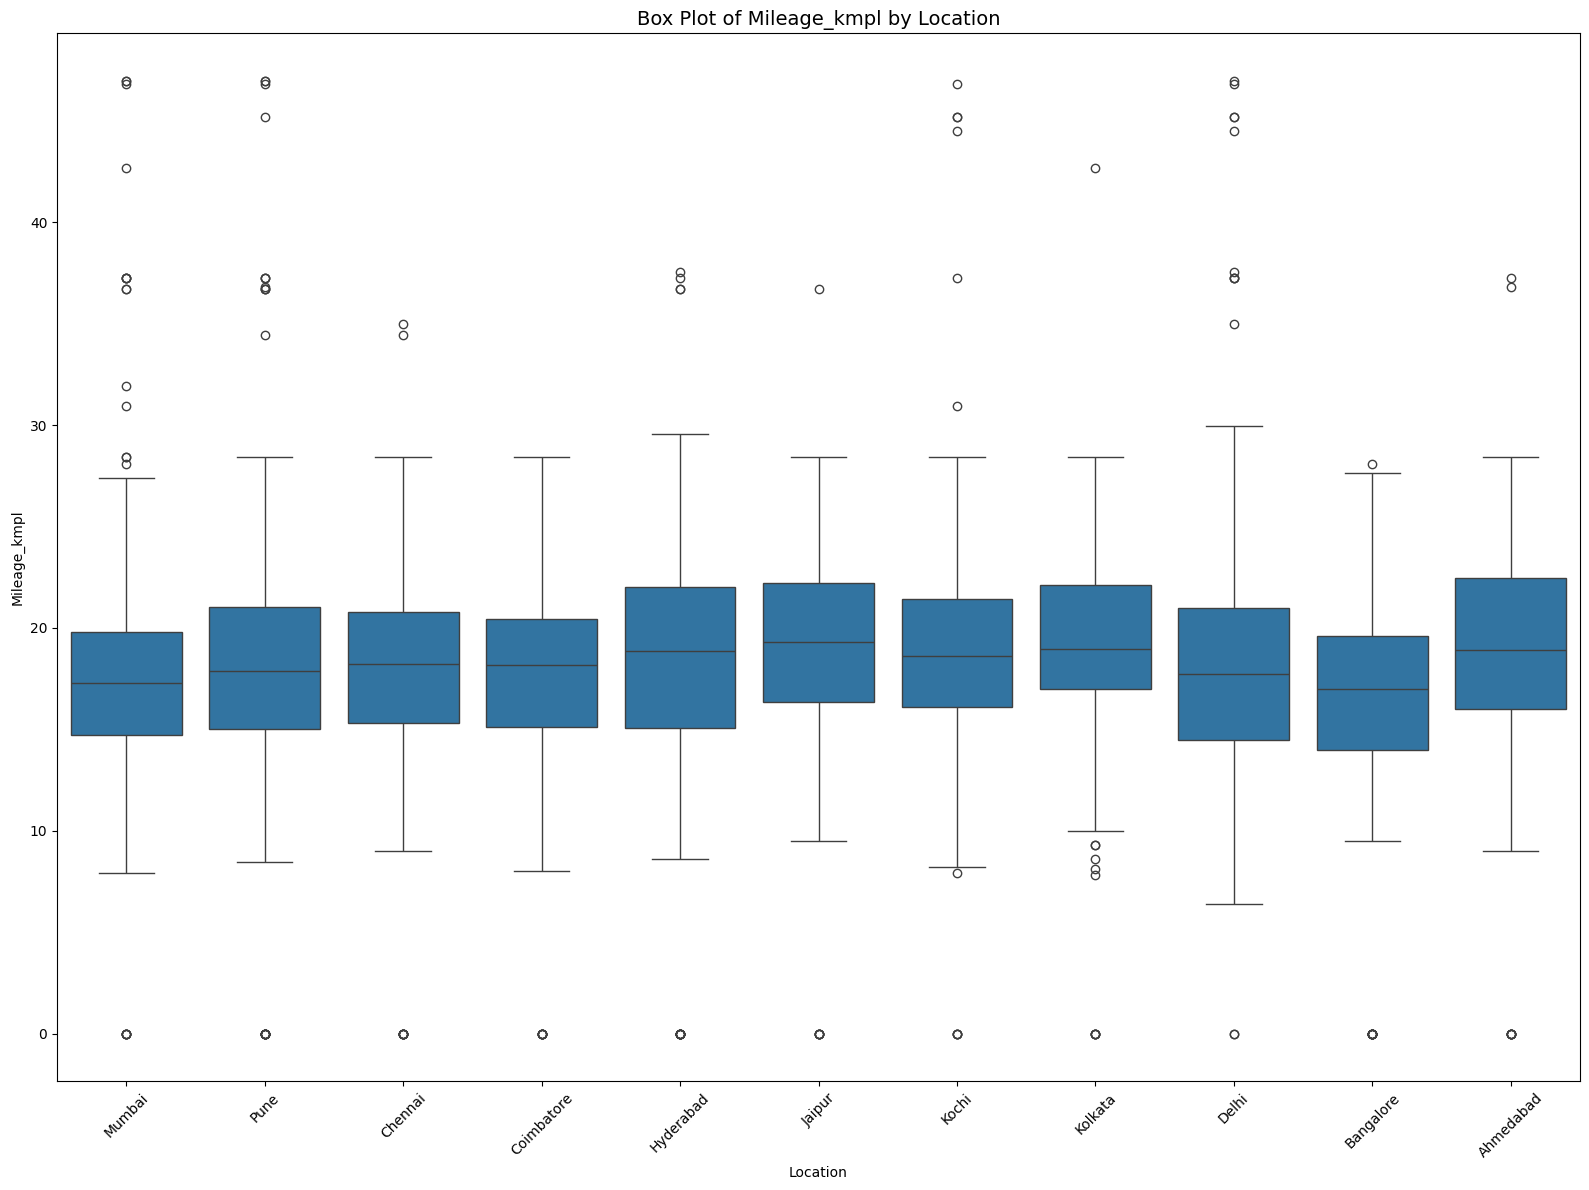


Statistics for Engine_CC by Location:

            count         mean         std    min      25%     50%      75%  \
Location                                                                      
Ahmedabad   274.0  1582.463504  509.174589  624.0  1198.00  1494.0  1984.00   
Bangalore   432.0  1814.668981  706.711626  624.0  1248.00  1596.5  2155.75   
Chennai     589.0  1613.005093  575.032757   72.0  1198.00  1461.0  1968.00   
Coimbatore  770.0  1695.102597  659.435735  624.0  1197.00  1498.0  2143.00   
Delhi       655.0  1709.917557  627.547061  624.0  1199.00  1498.0  1999.00   
Hyderabad   875.0  1643.569143  629.860208  624.0  1199.00  1493.0  1995.00   
Jaipur      496.0  1440.147177  500.338266  624.0  1191.25  1248.0  1582.00   
Kochi       768.0  1584.207031  576.845676  624.0  1197.00  1493.0  1968.00   
Kolkata     648.0  1468.902778  511.125574  793.0  1197.00  1273.0  1582.00   
Mumbai      945.0  1662.614815  576.457737  796.0  1198.00  1497.0  1991.00   
Pune        

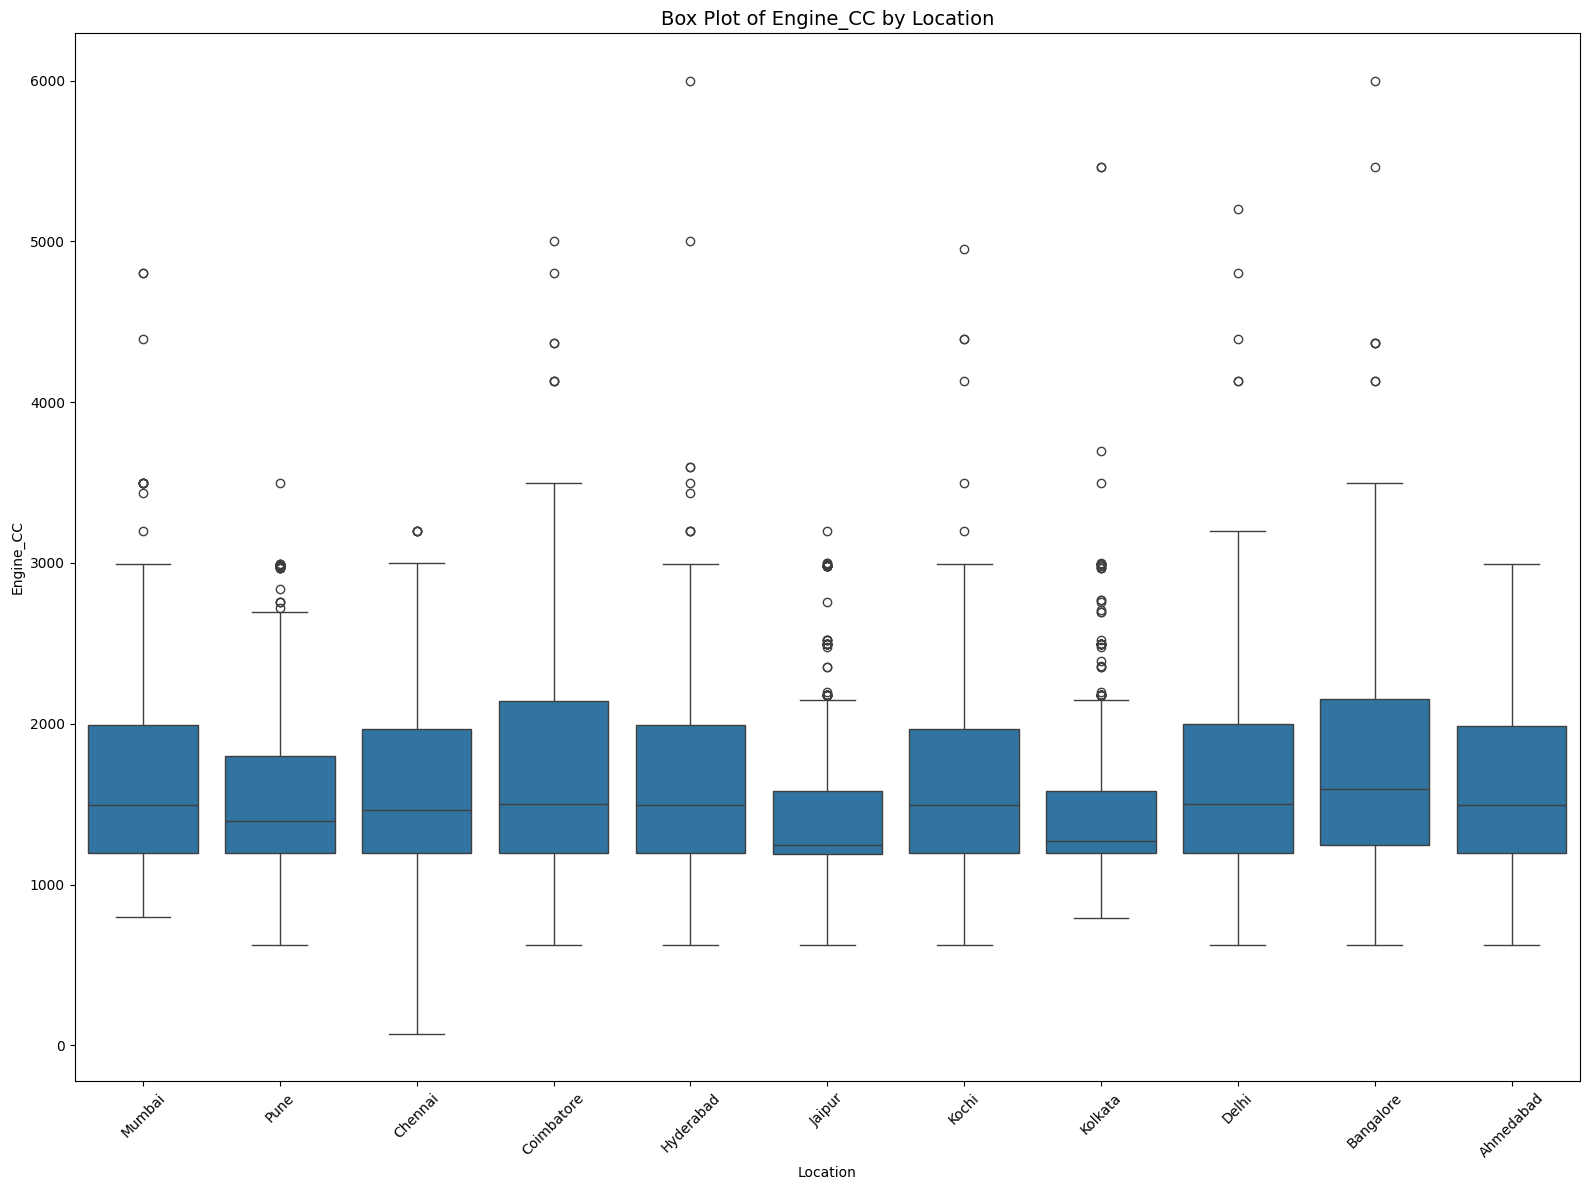


Statistics for Kilometers_Driven_Log by Year:

      count       mean       std        min        25%        50%        75%  \
Year                                                                           
1996    1.0  11.082158       NaN  11.082158  11.082158  11.082158  11.082158   
1998    4.0  11.349786  0.289214  10.920546  11.327552  11.463220  11.485454   
1999    2.0  11.502835  0.490124  11.156265  11.329550  11.502835  11.676120   
2000    5.0  11.519142  0.320509  11.225257  11.264477  11.407576  11.728045   
2001    8.0  11.789882  0.366297  11.156265  11.665705  11.759445  11.938573   
2002   18.0  11.265920  0.253593  10.878066  11.091279  11.225257  11.487255   
2003   20.0  11.260687  0.342492  10.696503  11.032861  11.190761  11.546488   
2004   35.0  11.364690  0.576385   9.392745  11.130621  11.314487  11.730828   
2005   68.0  11.299006  0.596480   8.671630  11.094281  11.407576  11.592200   
2006   89.0  11.405882  0.446364  10.206440  11.141876  11.400059  11.73

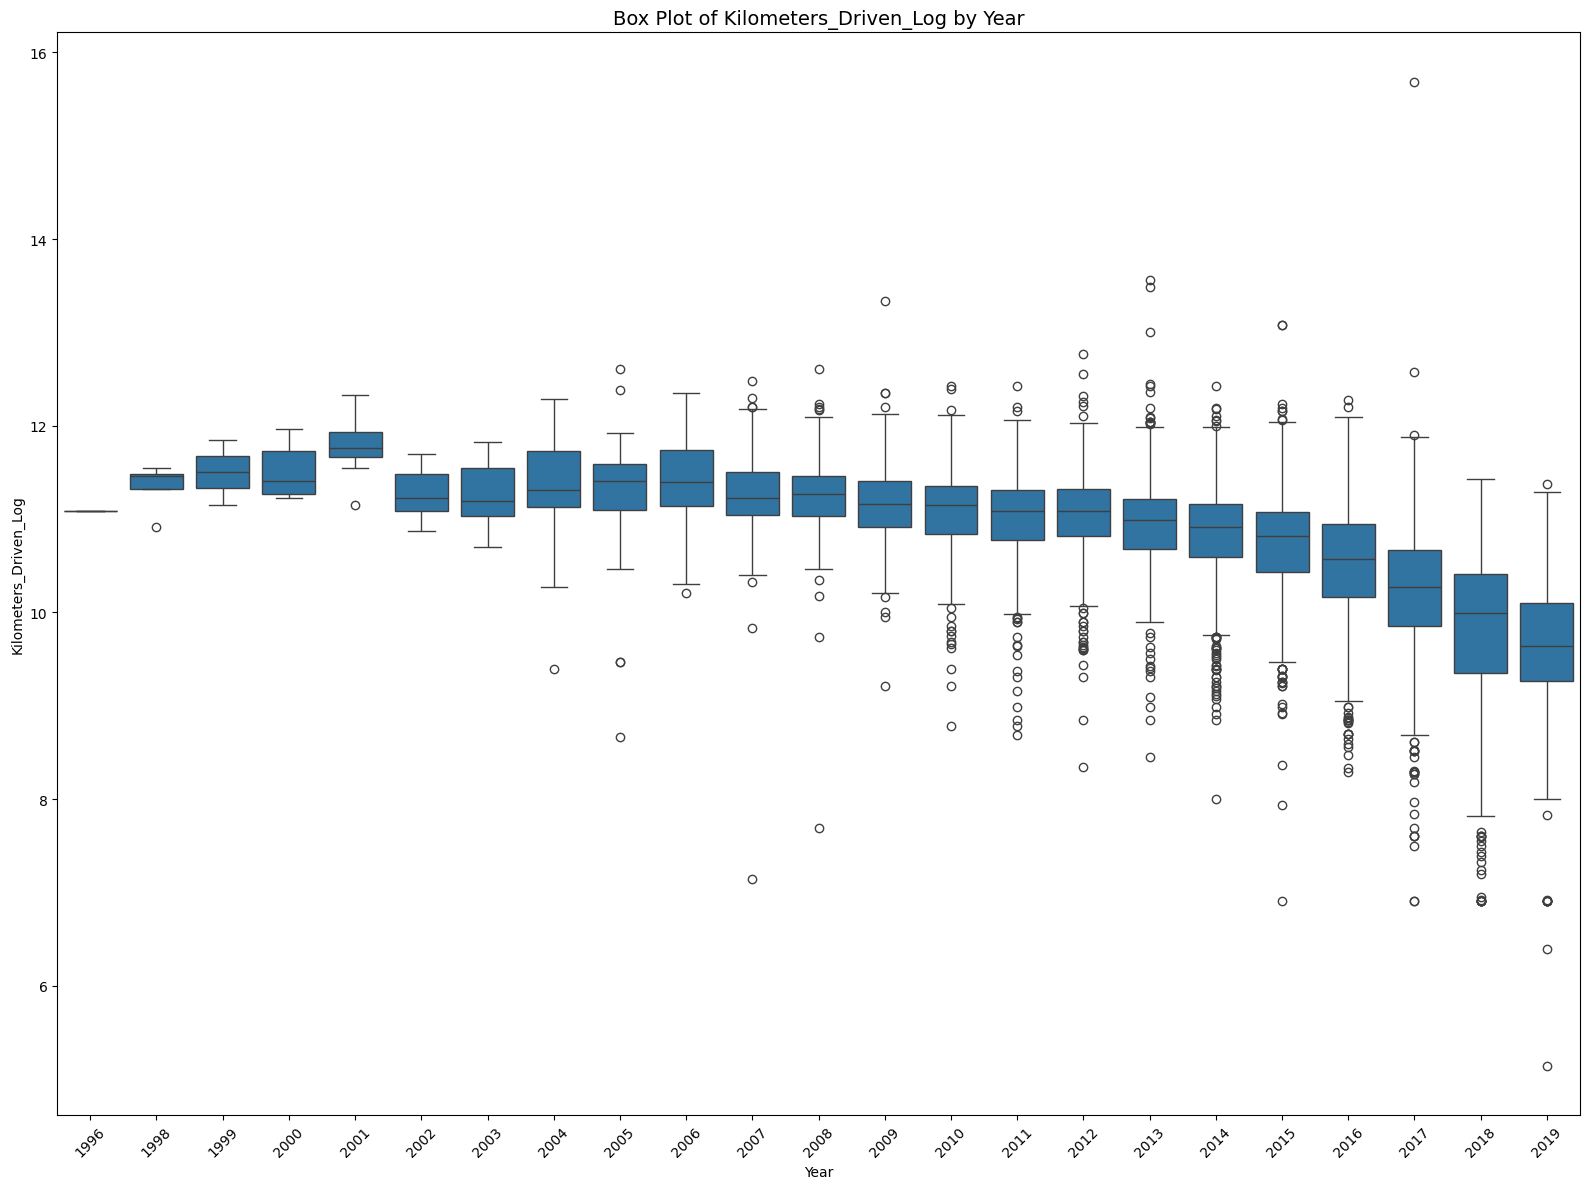


Statistics for Power_bhp by Year:

      count        mean        std    min      25%     50%     75%     max
Year                                                                      
1996    0.0         NaN        NaN    NaN      NaN     NaN     NaN     NaN
1998    3.0   92.566667  56.407121  60.00  60.0000   60.00  108.85  157.70
1999    2.0   75.000000  21.213203  60.00  67.5000   75.00   82.50   90.00
2000    5.0   56.020000  19.502615  37.00  37.0000   60.00   63.00   83.10
2001    4.0   86.950000  13.909589  68.00  81.3500   89.90   95.50  100.00
2002   12.0   62.508333  15.736204  37.00  56.7500   66.00   71.25   90.00
2003   17.0   90.770588  52.363081  35.50  60.0000   67.10  125.00  210.00
2004   29.0   88.527586  44.541777  35.00  60.0000   75.00  104.00  210.00
2005   54.0  102.877778  43.995972  34.20  70.0000   94.00  119.15  227.00
2006   76.0  107.582895  80.485375  37.00  67.1000   83.05  113.30  552.00
2007  125.0  103.726960  49.330762  37.00  67.1000  100.00  130.

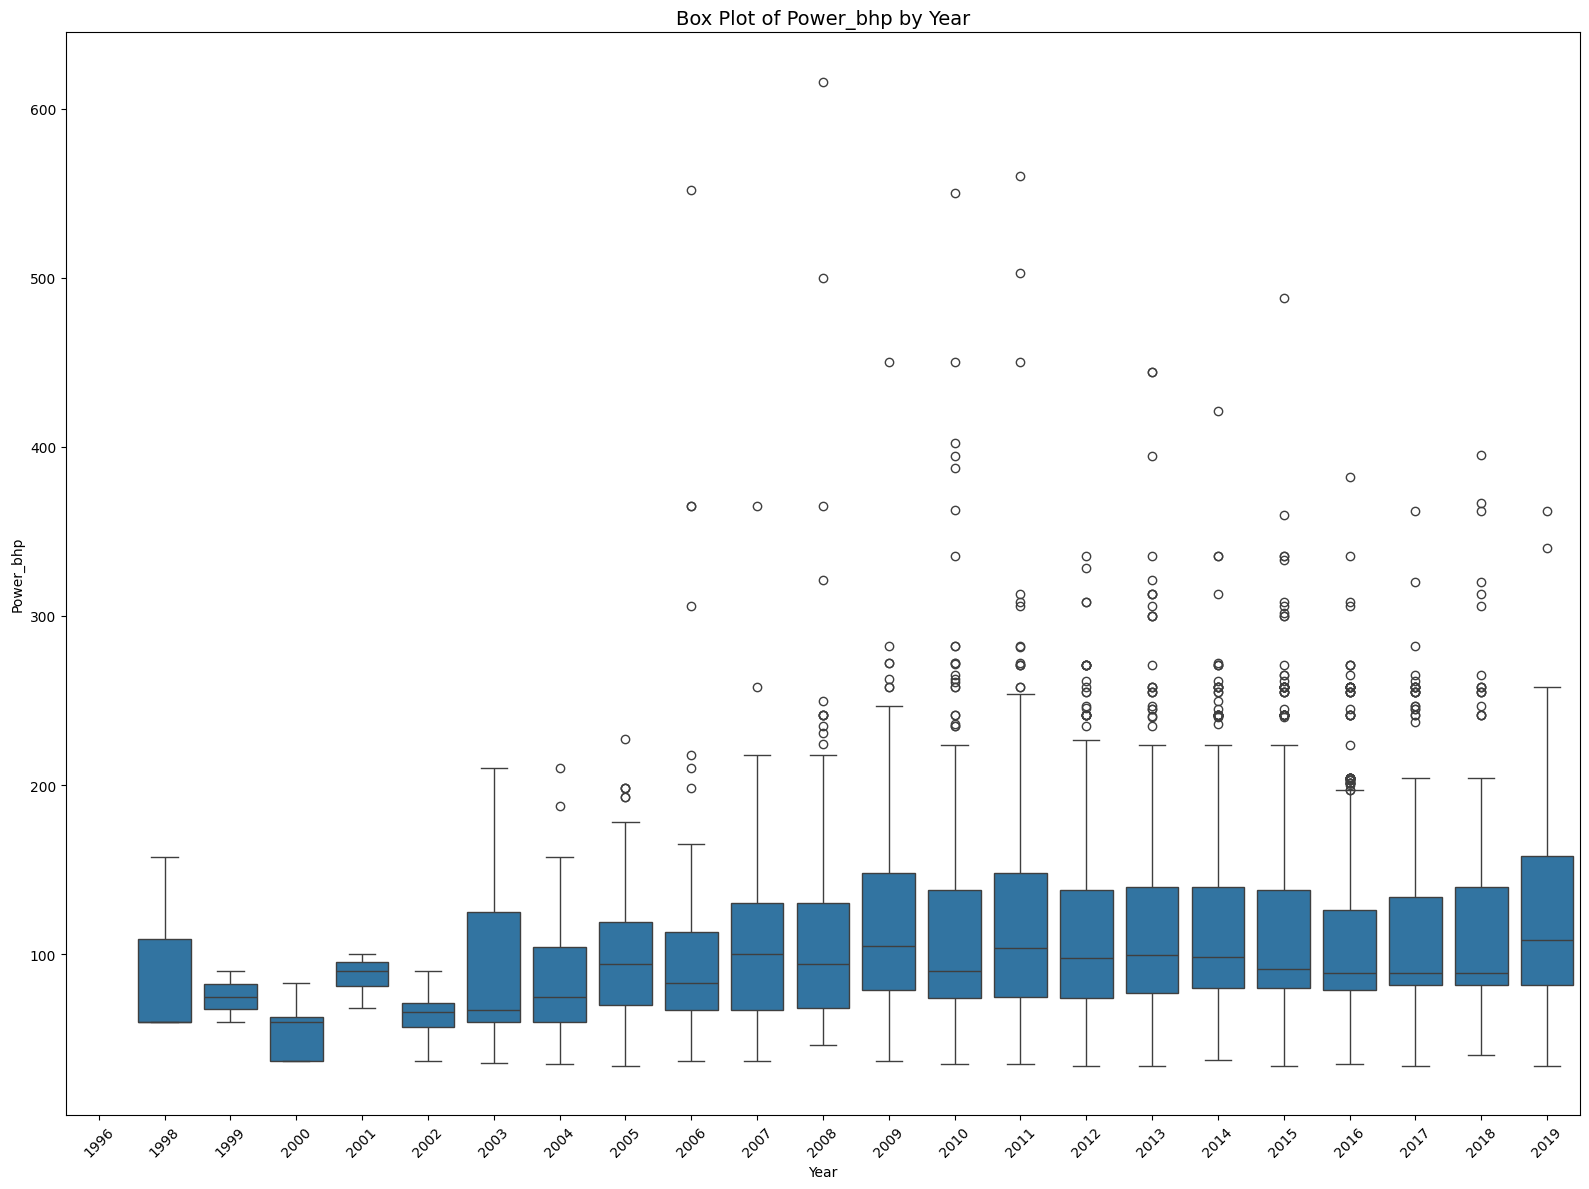


Statistics for Price by Year:

      count       mean        std   min     25%     50%      75%     max
Year                                                                    
1996    0.0        NaN        NaN   NaN     NaN     NaN      NaN     NaN
1998    4.0   1.432500   1.654053  0.45  0.5100   0.690   1.6125    3.90
1999    2.0   0.835000   0.091924  0.77  0.8025   0.835   0.8675    0.90
2000    4.0   1.175000   0.663953  0.55  0.6625   1.100   1.6125    1.95
2001    8.0   1.543750   1.498675  0.55  0.7000   0.875   1.6375    5.00
2002   15.0   1.294000   0.800953  0.51  0.7250   1.200   1.6500    3.65
2003   17.0   2.440000   3.796452  0.50  0.8500   1.250   1.7000   16.11
2004   31.0   1.941290   1.502617  0.45  1.0500   1.400   2.2150    7.10
2005   57.0   2.026842   1.877589  0.45  1.0000   1.300   2.4500   10.00
2006   78.0   3.355897   6.955017  0.69  1.3775   1.750   2.6125   59.00
2007  125.0   3.204000   3.496614  0.75  1.4500   2.000   3.6000   29.00
2008  174.0   3.917

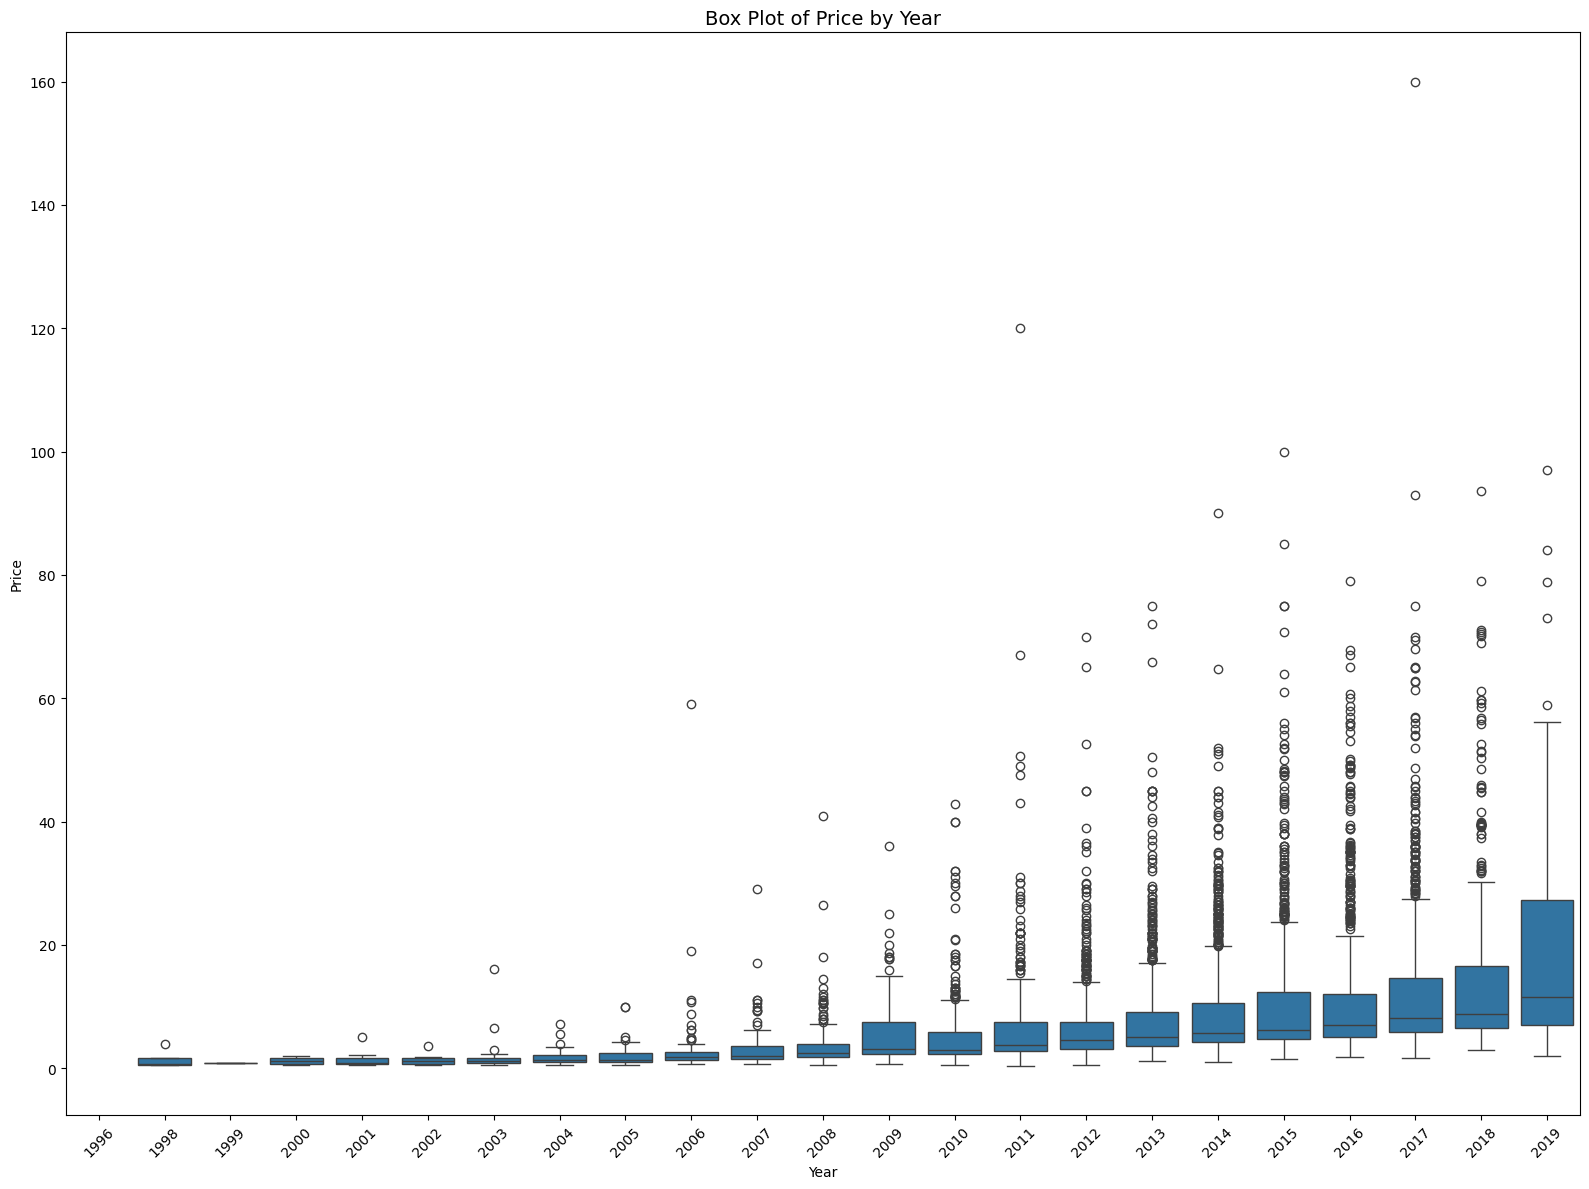


Statistics for Mileage_kmpl by Year:

      count       mean       std    min      25%    50%     75%     max
Year                                                                   
1996    1.0  14.100000       NaN  14.10  14.1000  14.10  14.100  14.100
1998    4.0  14.900000  3.441899  10.00  13.7500  16.15  17.300  17.300
1999    2.0  15.150000  3.040559  13.00  14.0750  15.15  16.225  17.300
2000    5.0  15.434000  1.548638  13.60  14.0700  16.10  16.100  17.300
2001    8.0  10.900000  7.186694   0.00   9.0000  13.10  14.025  20.300
2002   18.0  10.833333  8.120272   0.00   0.0000  13.45  17.300  18.900
2003   20.0  14.645000  4.378353   0.00  12.9500  15.35  17.300  19.700
2004   35.0  13.082286  6.068621   0.00  11.6500  14.20  17.300  19.700
2005   68.0  13.328676  4.633664   0.00  12.4500  13.45  16.175  23.800
2006   89.0  14.598315  4.255929   0.00  12.9900  15.40  17.300  20.400
2007  148.0  14.631622  4.245221   0.00  12.9000  15.26  17.300  24.220
2008  207.0  15.408792  4

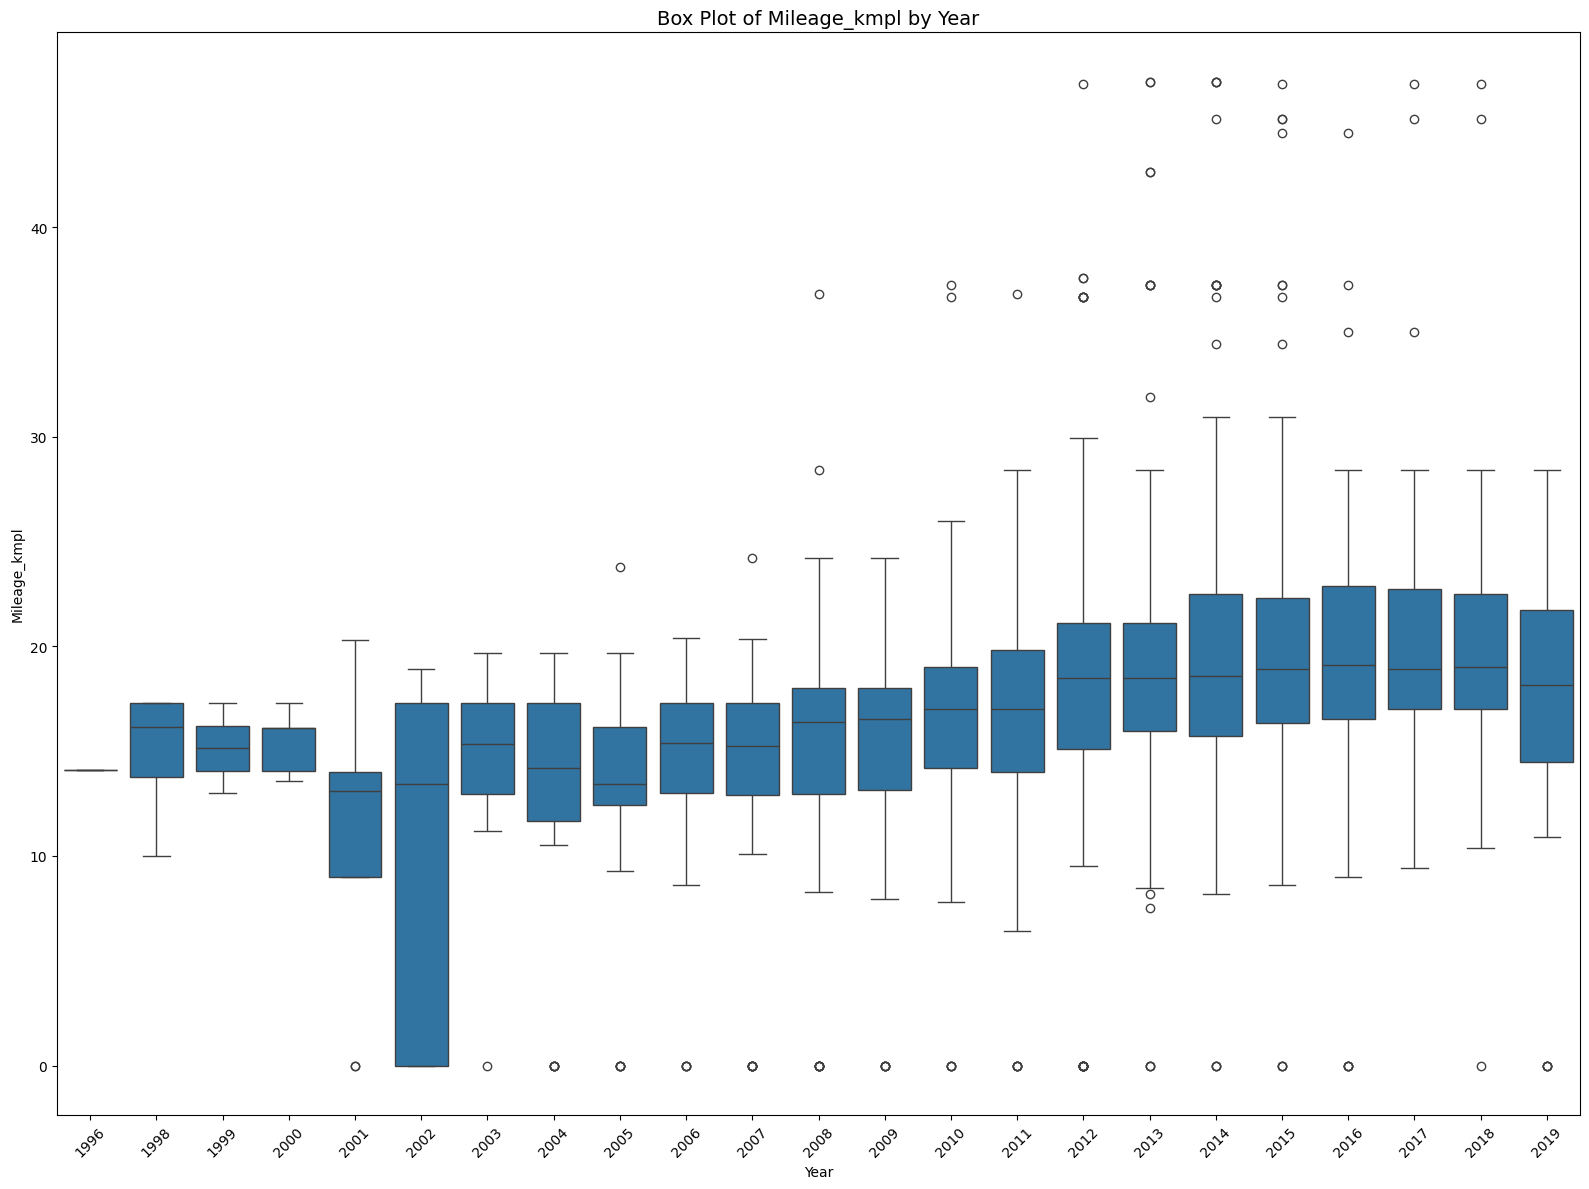


Statistics for Engine_CC by Year:

      count         mean          std     min      25%     50%      75%  \
Year                                                                      
1996    1.0  1995.000000          NaN  1995.0  1995.00  1995.0  1995.00   
1998    4.0  1188.000000   405.478318   970.0   987.25   993.0  1193.75   
1999    2.0  1168.000000   247.487373   993.0  1080.50  1168.0  1255.50   
2000    5.0  1612.800000  1042.967737   796.0   796.00   993.0  2523.00   
2001    7.0  1625.428571   490.535713  1086.0  1355.00  1493.0  1821.50   
2002   17.0  1367.352941   561.181114   796.0   998.00  1086.0  1896.00   
2003   18.0  1515.555556   609.663381   796.0   998.00  1393.5  1870.50   
2004   33.0  1461.060606   608.246657   796.0   998.00  1343.0  1794.00   
2005   67.0  1669.865672   584.980417   796.0  1298.50  1493.0  1940.00   
2006   86.0  1652.720930   801.140549   796.0  1086.00  1405.0  1967.25   
2007  146.0  1598.794521   612.409238   796.0  1086.00  1430.0  

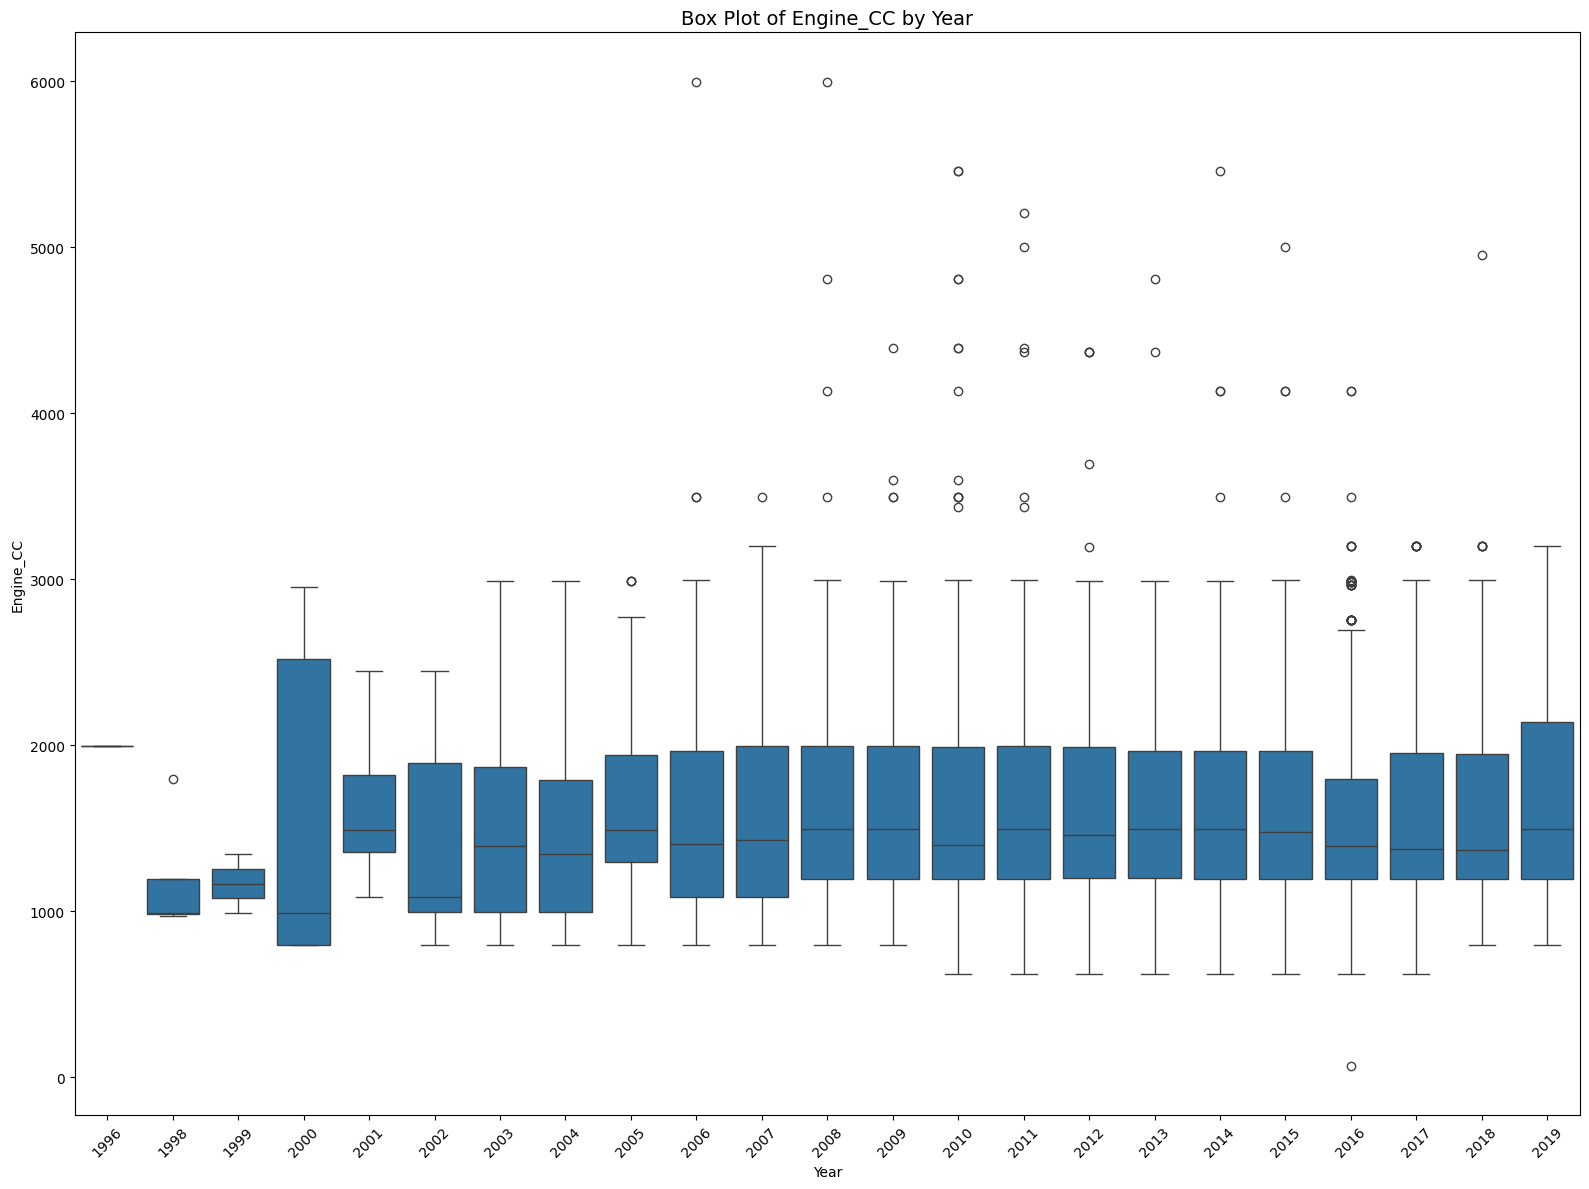


Statistics for Kilometers_Driven_Log by Fuel_Type:

            count       mean       std        min        25%        50%  \
Fuel_Type                                                                 
CNG          62.0  10.763201  0.531211   9.268704  10.531594  10.878066   
Diesel     3852.0  10.928113  0.635083   6.908755  10.621352  11.002117   
Electric      2.0  10.755883  0.090390  10.691968  10.723925  10.755883   
LPG          12.0  10.946332  0.431013   9.741027  10.905846  11.076530   
Petrol     3325.0  10.566715  0.758955   5.147494  10.203629  10.714440   

                 75%        max  
Fuel_Type                        
CNG        11.161986  11.512935  
Diesel     11.297796  15.687313  
Electric   10.787841  10.819798  
LPG        11.185782  11.383158  
Petrol     11.076465  13.337476  


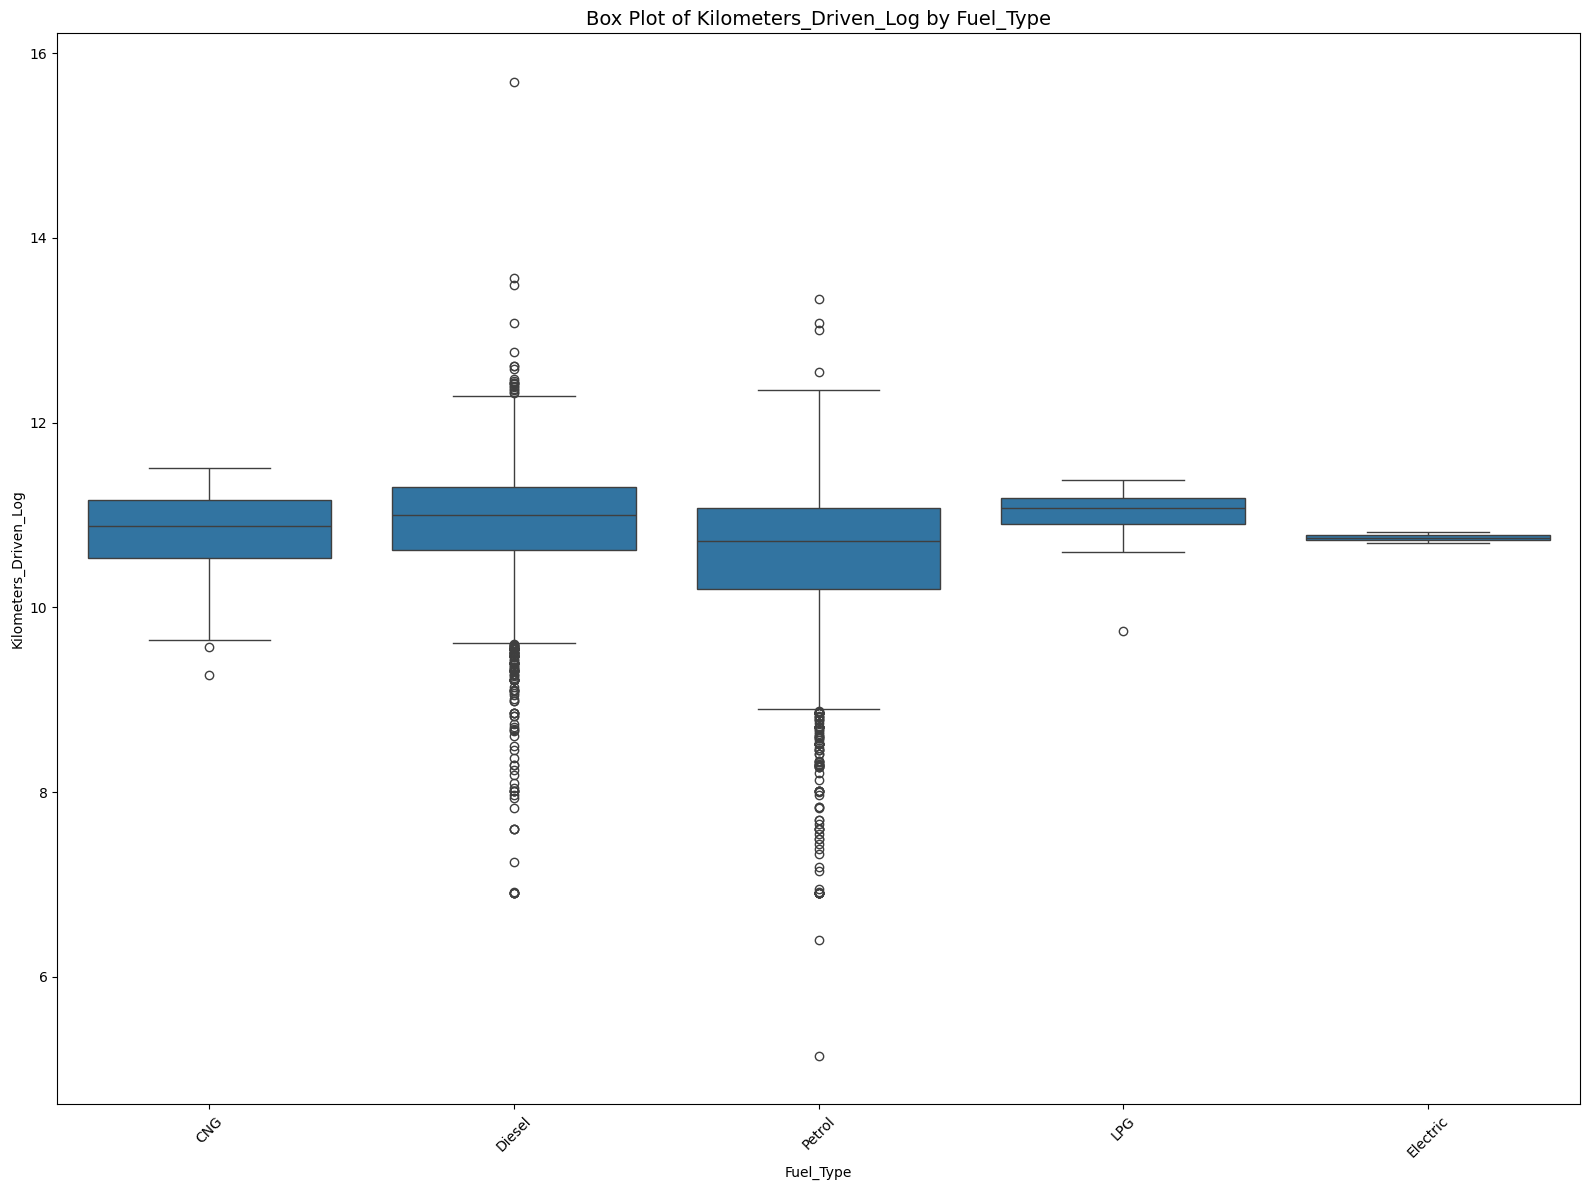


Statistics for Power_bhp by Fuel_Type:

            count        mean        std   min    25%     50%    75%    max
Fuel_Type                                                                  
CNG          61.0   64.306557  16.454070  38.4  58.16   58.20   73.0  138.0
Diesel     3784.0  127.204666  53.242635  35.5  88.50  108.45  170.0  394.3
Electric      2.0   57.000000  22.627417  41.0  49.00   57.00   65.0   73.0
LPG          12.0   62.529167  10.394370  55.2  57.50   58.20   62.1   93.7
Petrol     3219.0   96.931556  49.022867  34.2  73.00   83.10  116.3  616.0


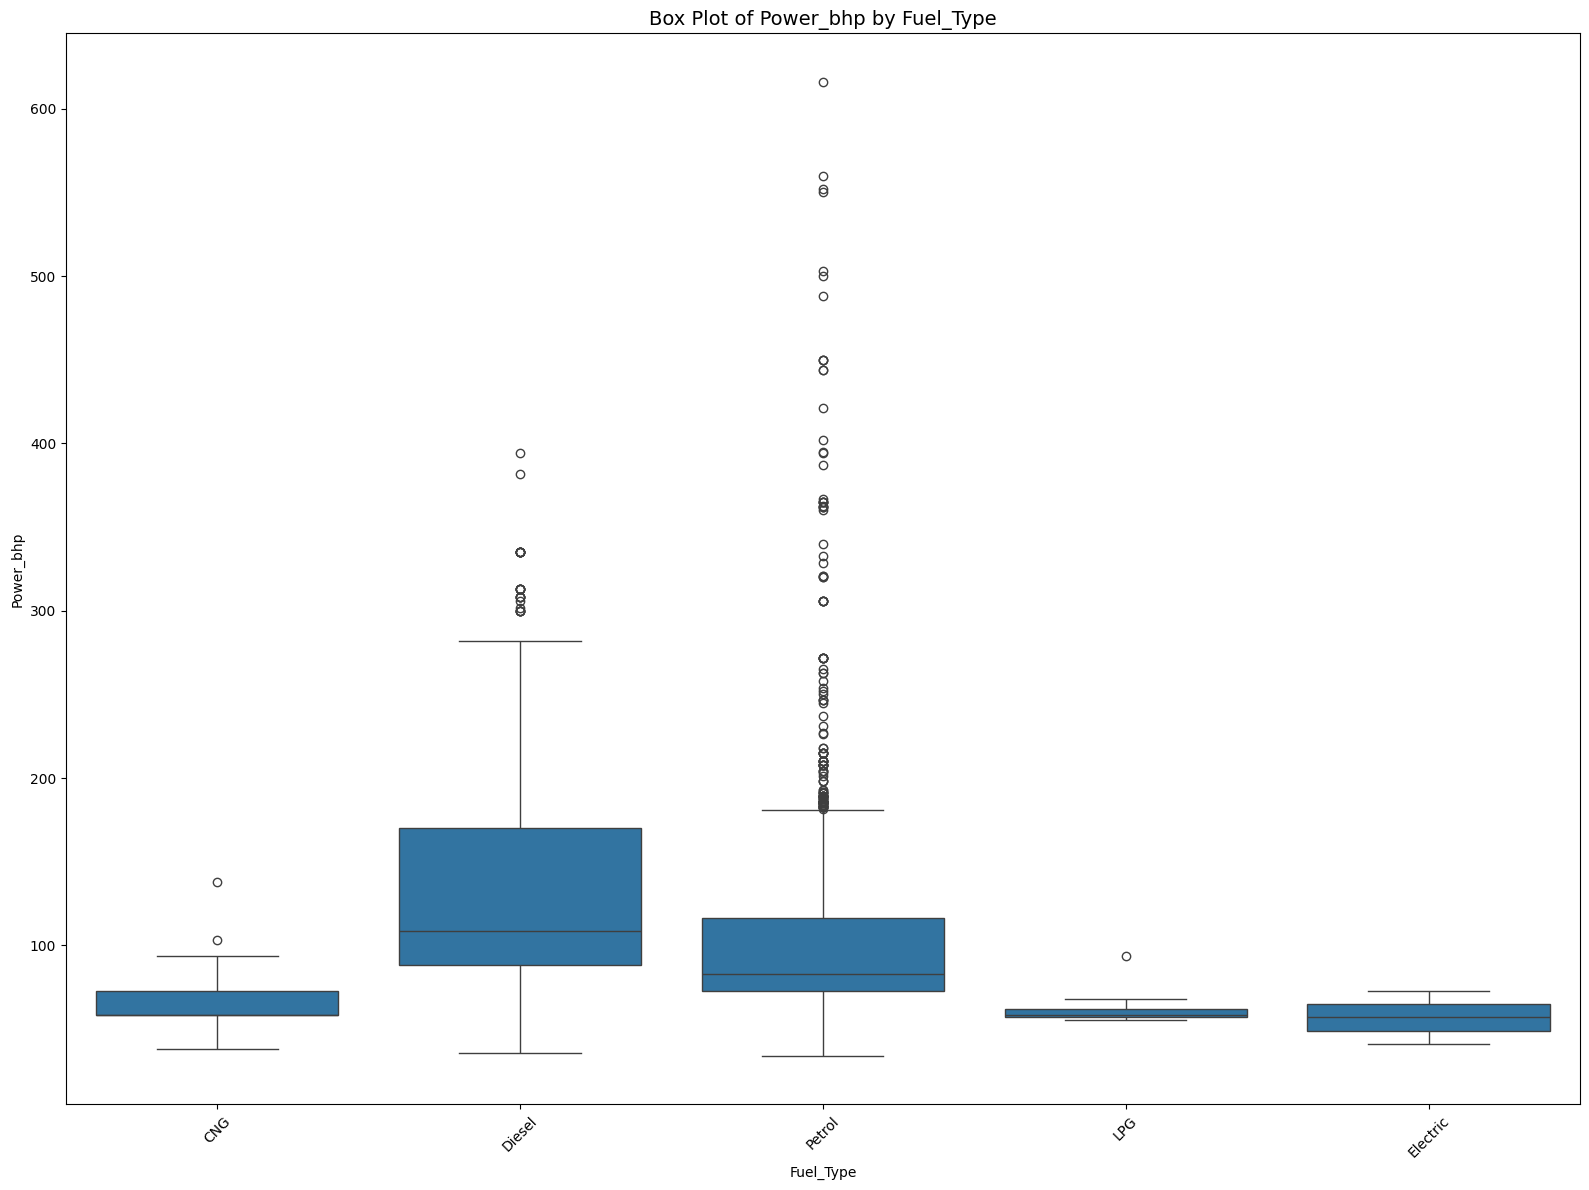


Statistics for Price by Fuel_Type:

            count       mean        std    min      25%     50%      75%  \
Fuel_Type                                                                  
CNG          56.0   3.516786   1.434187   1.20   2.8500   3.250   3.8225   
Diesel     3205.0  12.840605  12.808922   0.60   4.8500   7.750  16.5000   
Electric      2.0  12.875000   0.176777  12.75  12.8125  12.875  12.9375   
LPG          10.0   2.487000   0.648606   1.45   2.0300   2.600   3.0375   
Petrol     2746.0   5.701100   7.381482   0.44   2.7425   4.105   6.1575   

              max  
Fuel_Type          
CNG          8.35  
Diesel     160.00  
Electric    13.00  
LPG          3.20  
Petrol     120.00  


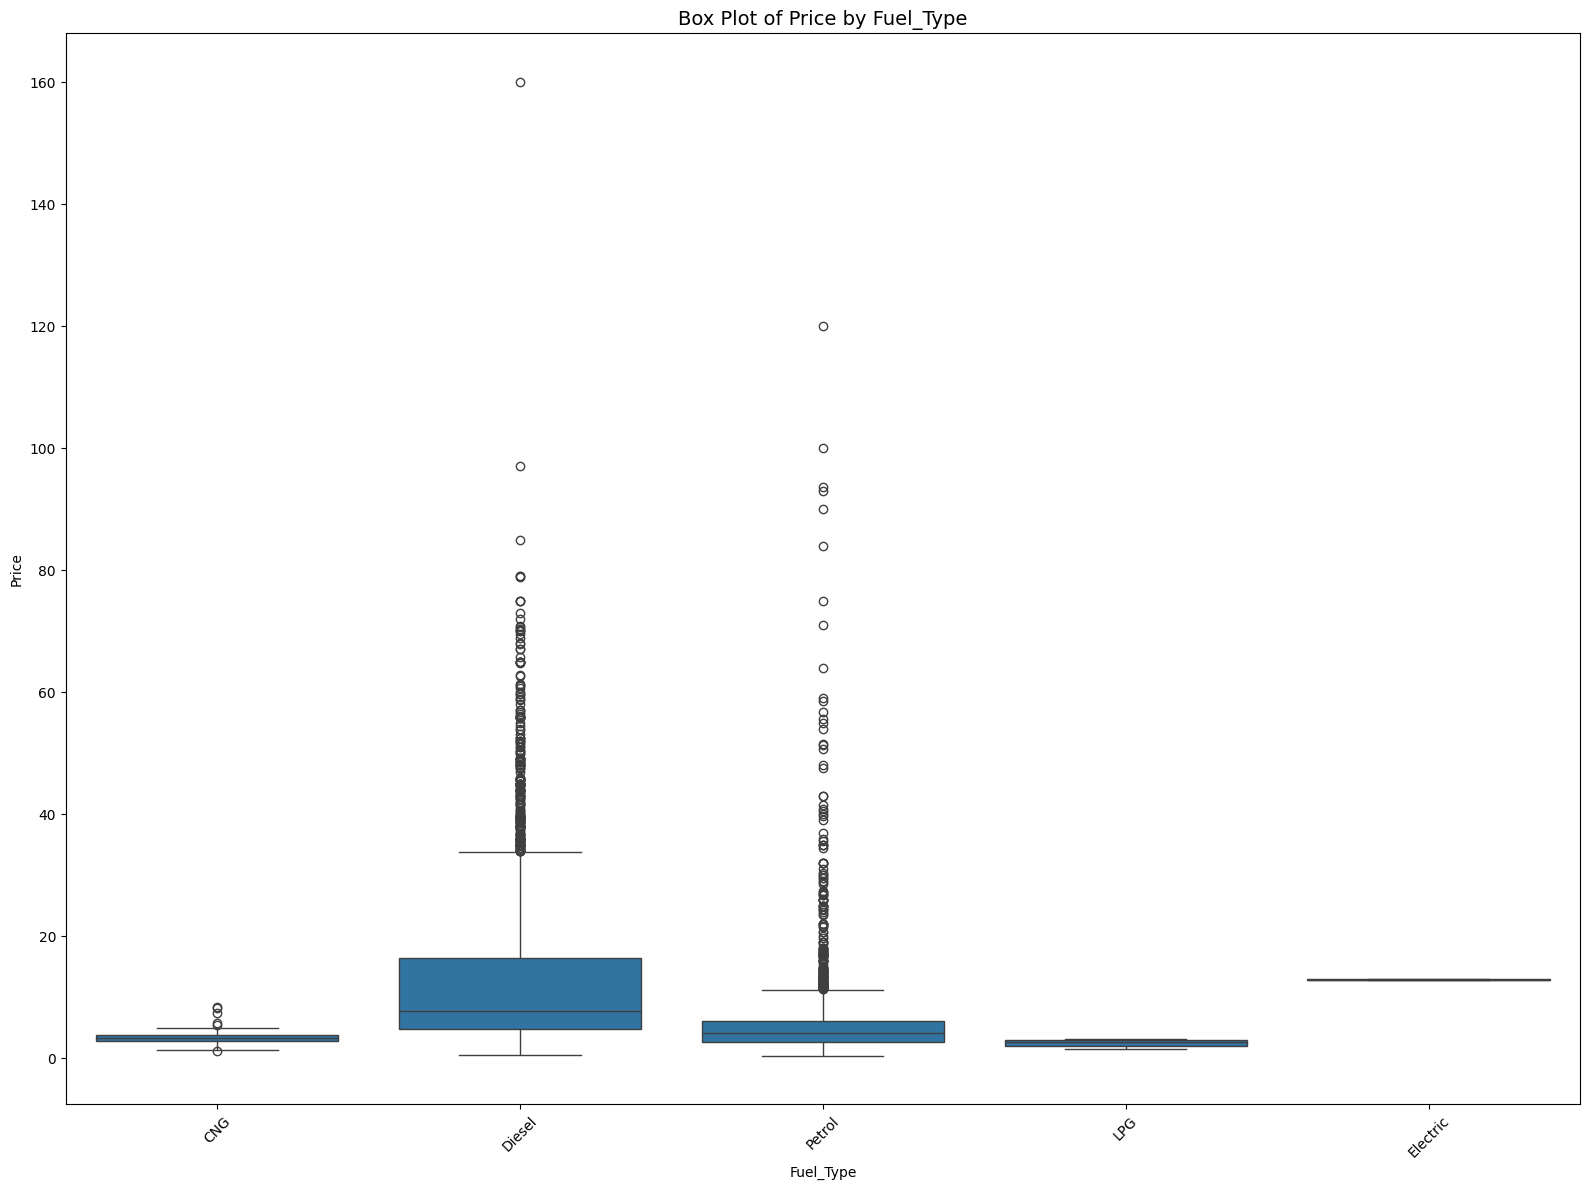


Statistics for Mileage_kmpl by Fuel_Type:

            count       mean       std     min    25%    50%      75%     max
Fuel_Type                                                                    
CNG          62.0  35.623903  8.790555  16.632  30.94  37.24  44.0405  46.956
Diesel     3852.0  18.633606  4.933440   0.000  14.84  19.01  22.6900  28.400
Electric      0.0        NaN       NaN     NaN    NaN    NaN      NaN     NaN
LPG          12.0  26.174167  7.232575  18.480  18.83  24.22  31.3250  36.680
Petrol     3325.0  17.433374  3.822158   0.000  15.64  17.80  19.4000  26.000


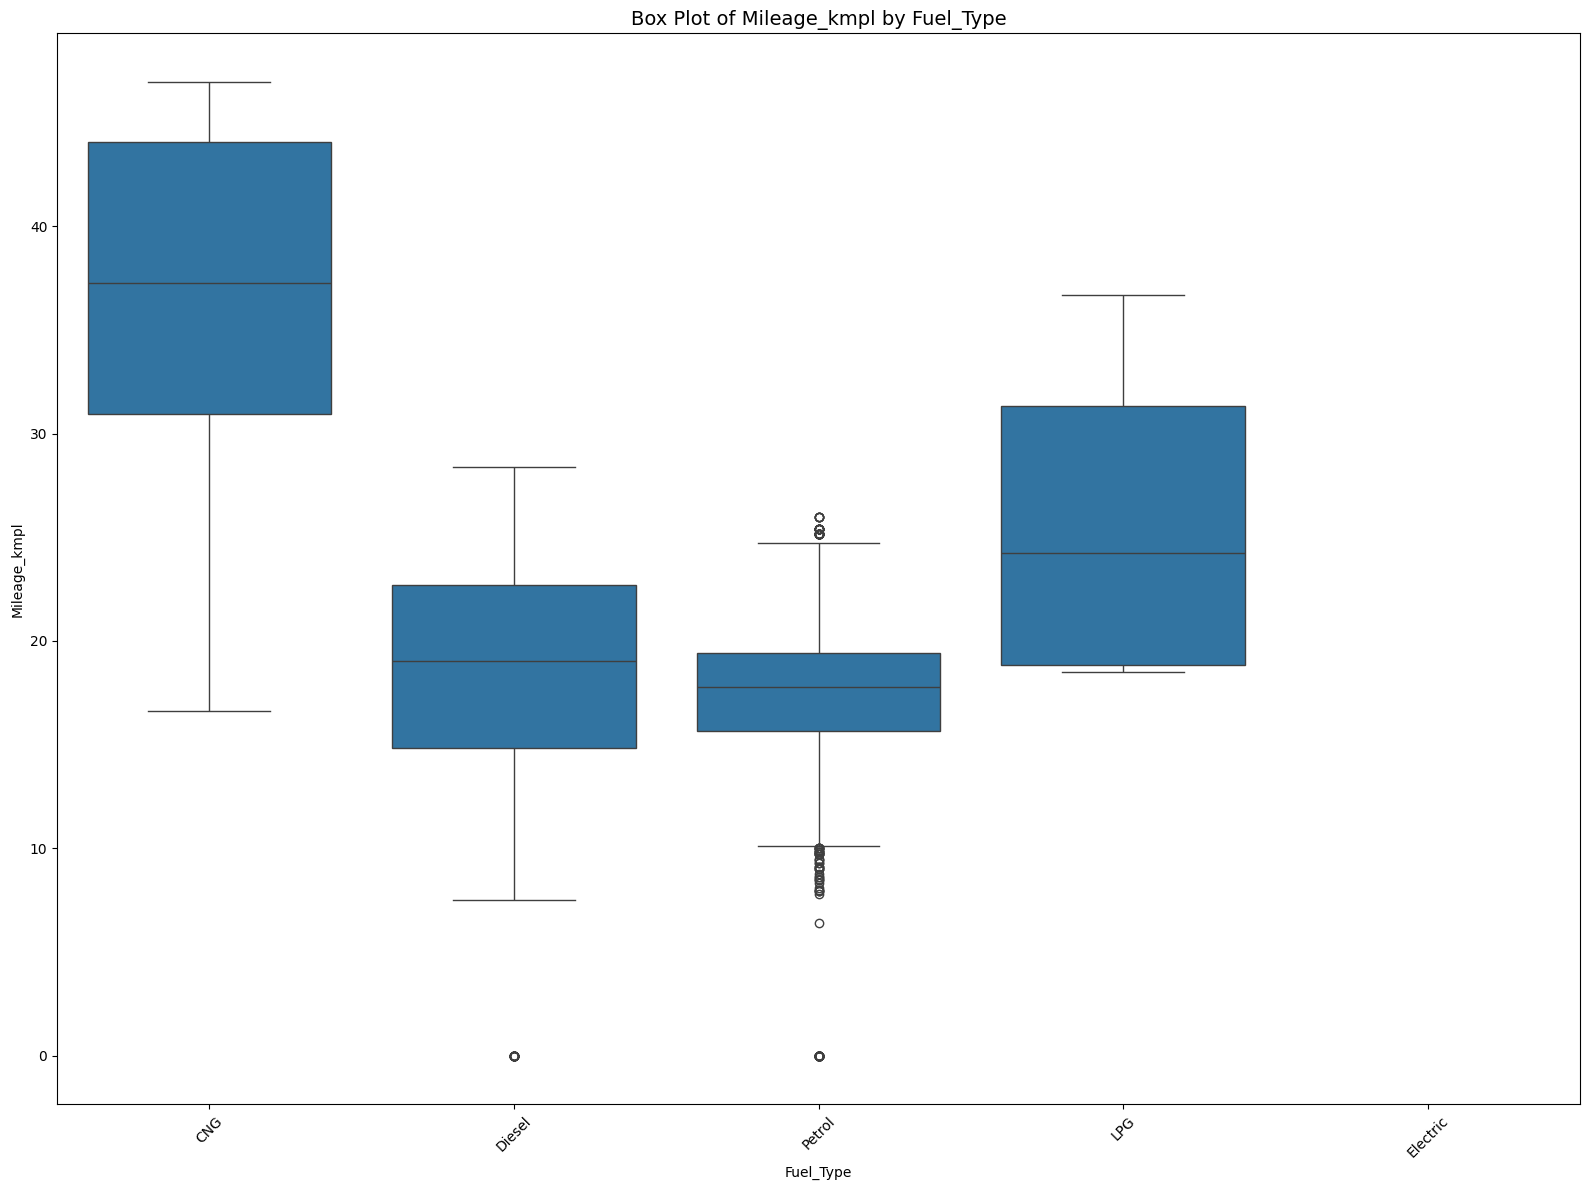


Statistics for Engine_CC by Fuel_Type:

            count         mean          std    min     25%     50%     75%  \
Fuel_Type                                                                    
CNG          62.0  1083.403226   214.481109  796.0   998.0   998.0  1196.0   
Diesel     3840.0  1856.733854   580.989106  793.0  1396.0  1598.0  2179.0   
Electric      2.0   935.000000  1220.466304   72.0   503.5   935.0  1366.5   
LPG          12.0  1069.166667   154.617318  814.0   998.0  1061.0  1086.0   
Petrol     3291.0  1348.804619   484.892886  624.0  1193.0  1198.0  1497.0   

              max  
Fuel_Type          
CNG        1798.0  
Diesel     4806.0  
Electric   1798.0  
LPG        1495.0  
Petrol     5998.0  


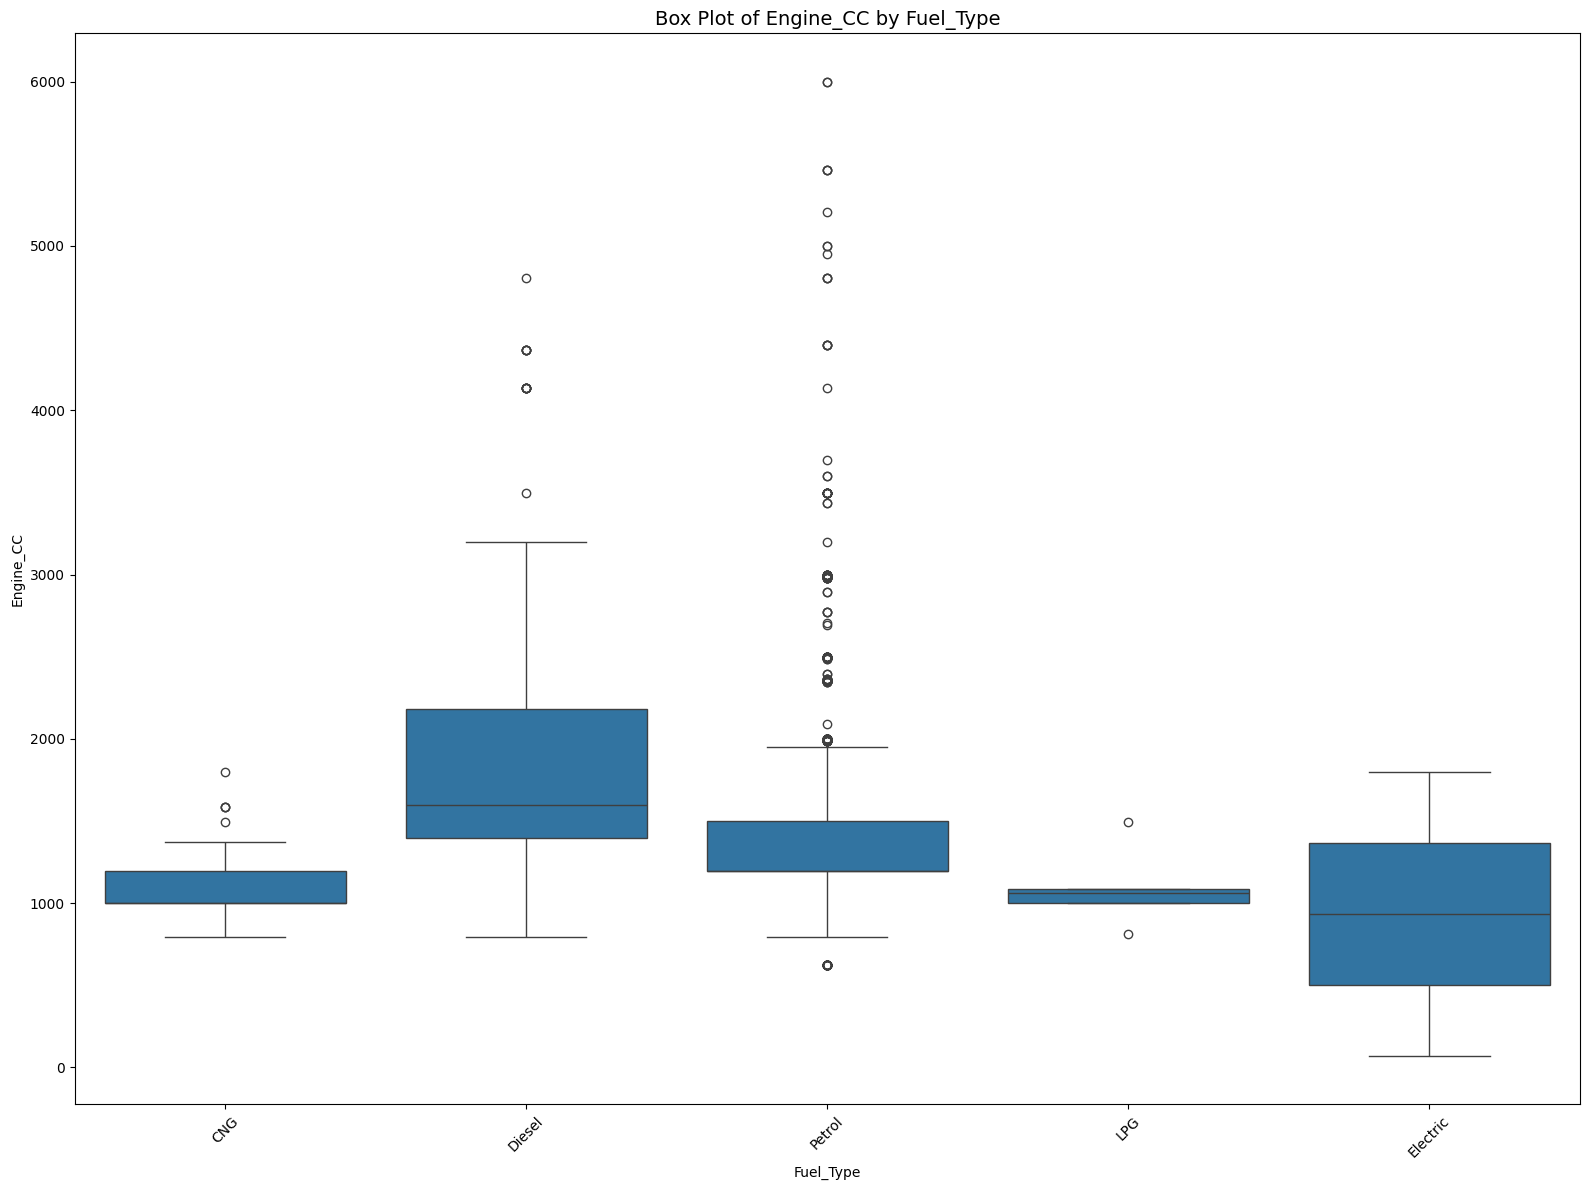


Statistics for Kilometers_Driven_Log by Transmission:

               count       mean       std       min        25%        50%  \
Transmission                                                                
Automatic     2049.0  10.651127  0.708067  6.398595  10.308986  10.773944   
Manual        5204.0  10.804275  0.714931  5.147494  10.491302  10.927215   

                    75%        max  
Transmission                        
Automatic     11.105544  15.687313  
Manual        11.226053  13.487008  


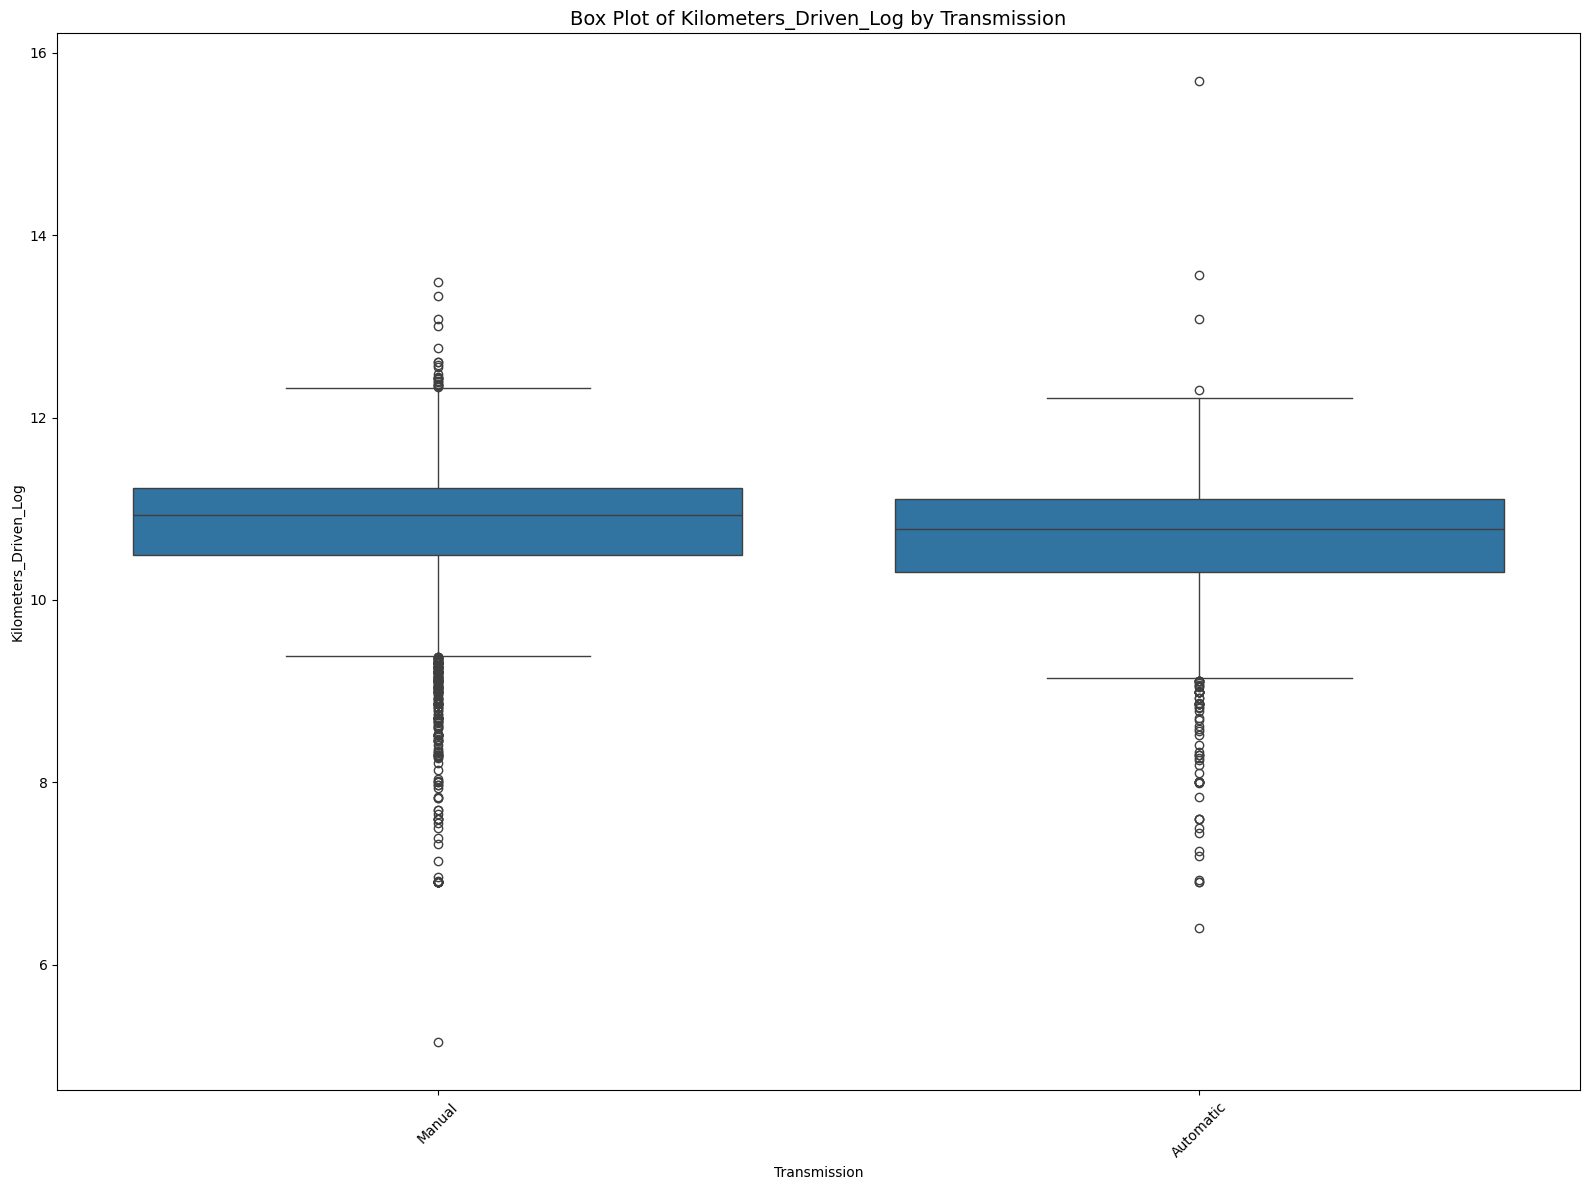


Statistics for Power_bhp by Transmission:

               count        mean        std    min     25%    50%    75%  \
Transmission                                                               
Automatic     2027.0  166.923328  63.300433  37.48  121.36  170.0  190.0   
Manual        5051.0   91.031202  27.438024  34.20   73.90   85.8  103.5   

                max  
Transmission         
Automatic     616.0  
Manual        210.0  


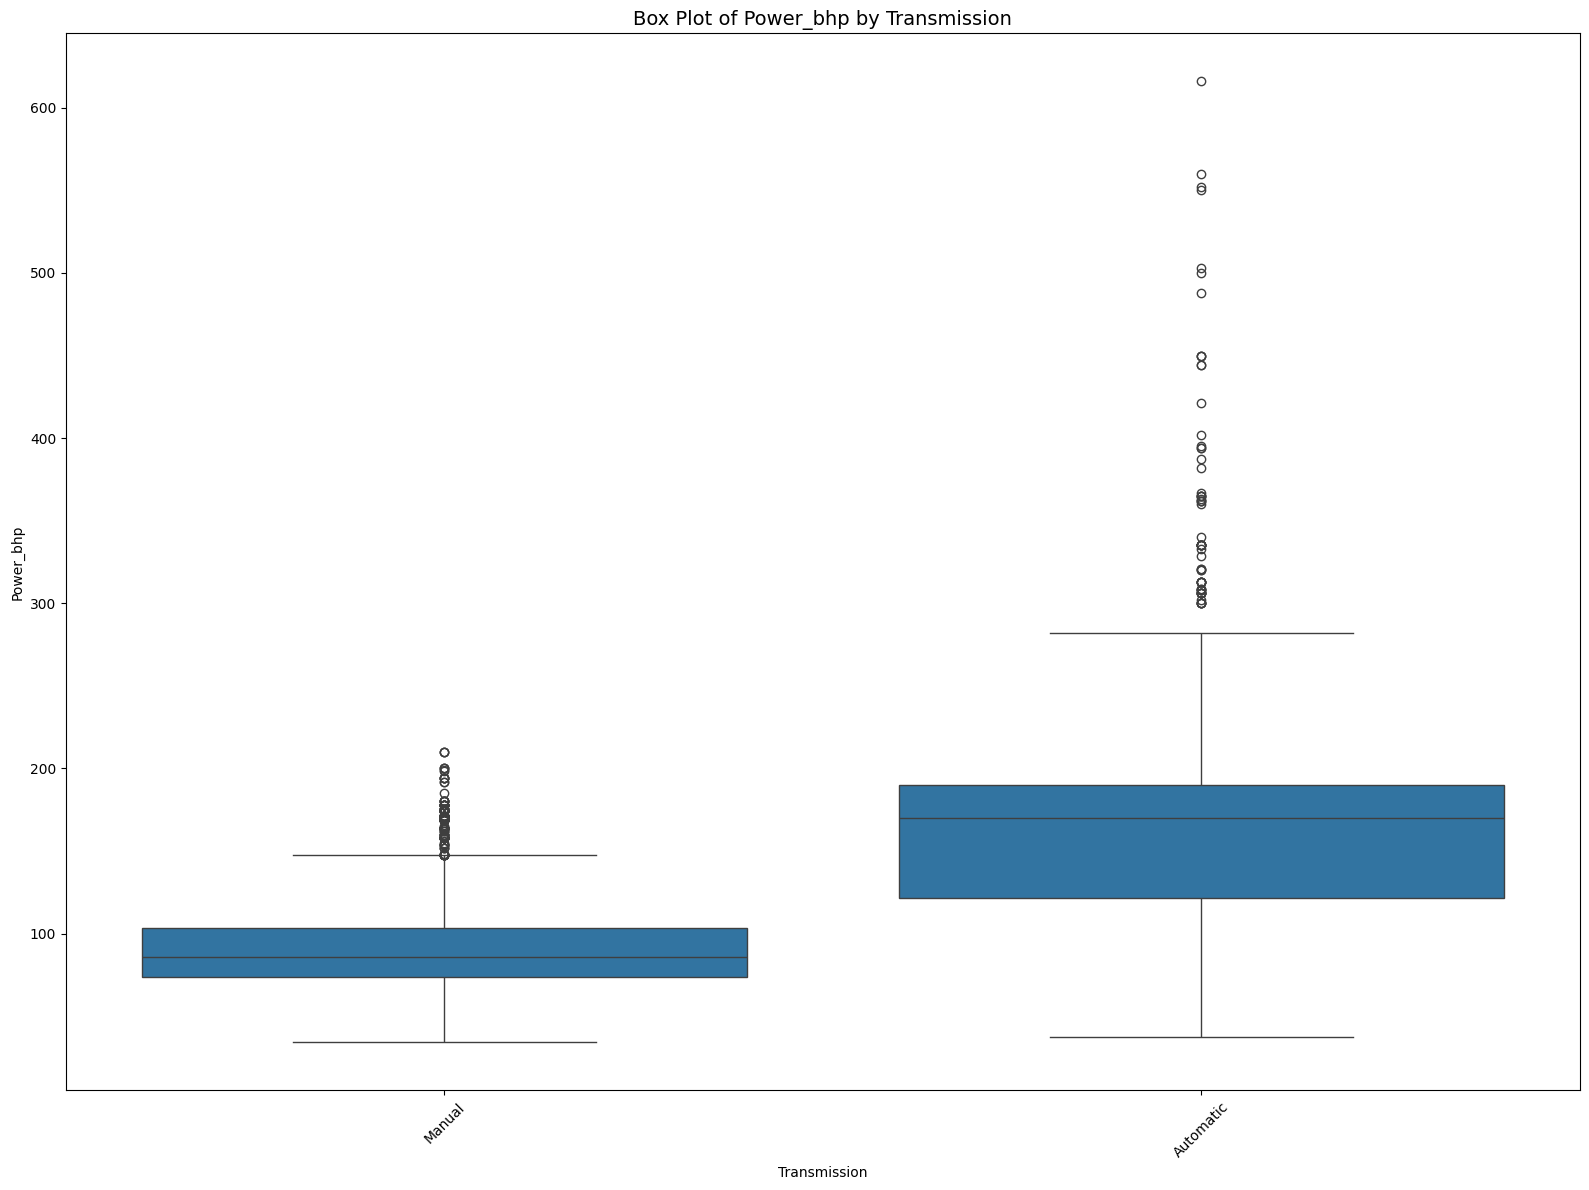


Statistics for Price by Transmission:

               count       mean        std   min     25%   50%     75%     max
Transmission                                                                  
Automatic     1720.0  19.843971  15.984578  1.50  7.9725  16.0  27.000  160.00
Manual        4299.0   5.332703   3.589005  0.44  3.0000   4.5   6.545   40.88


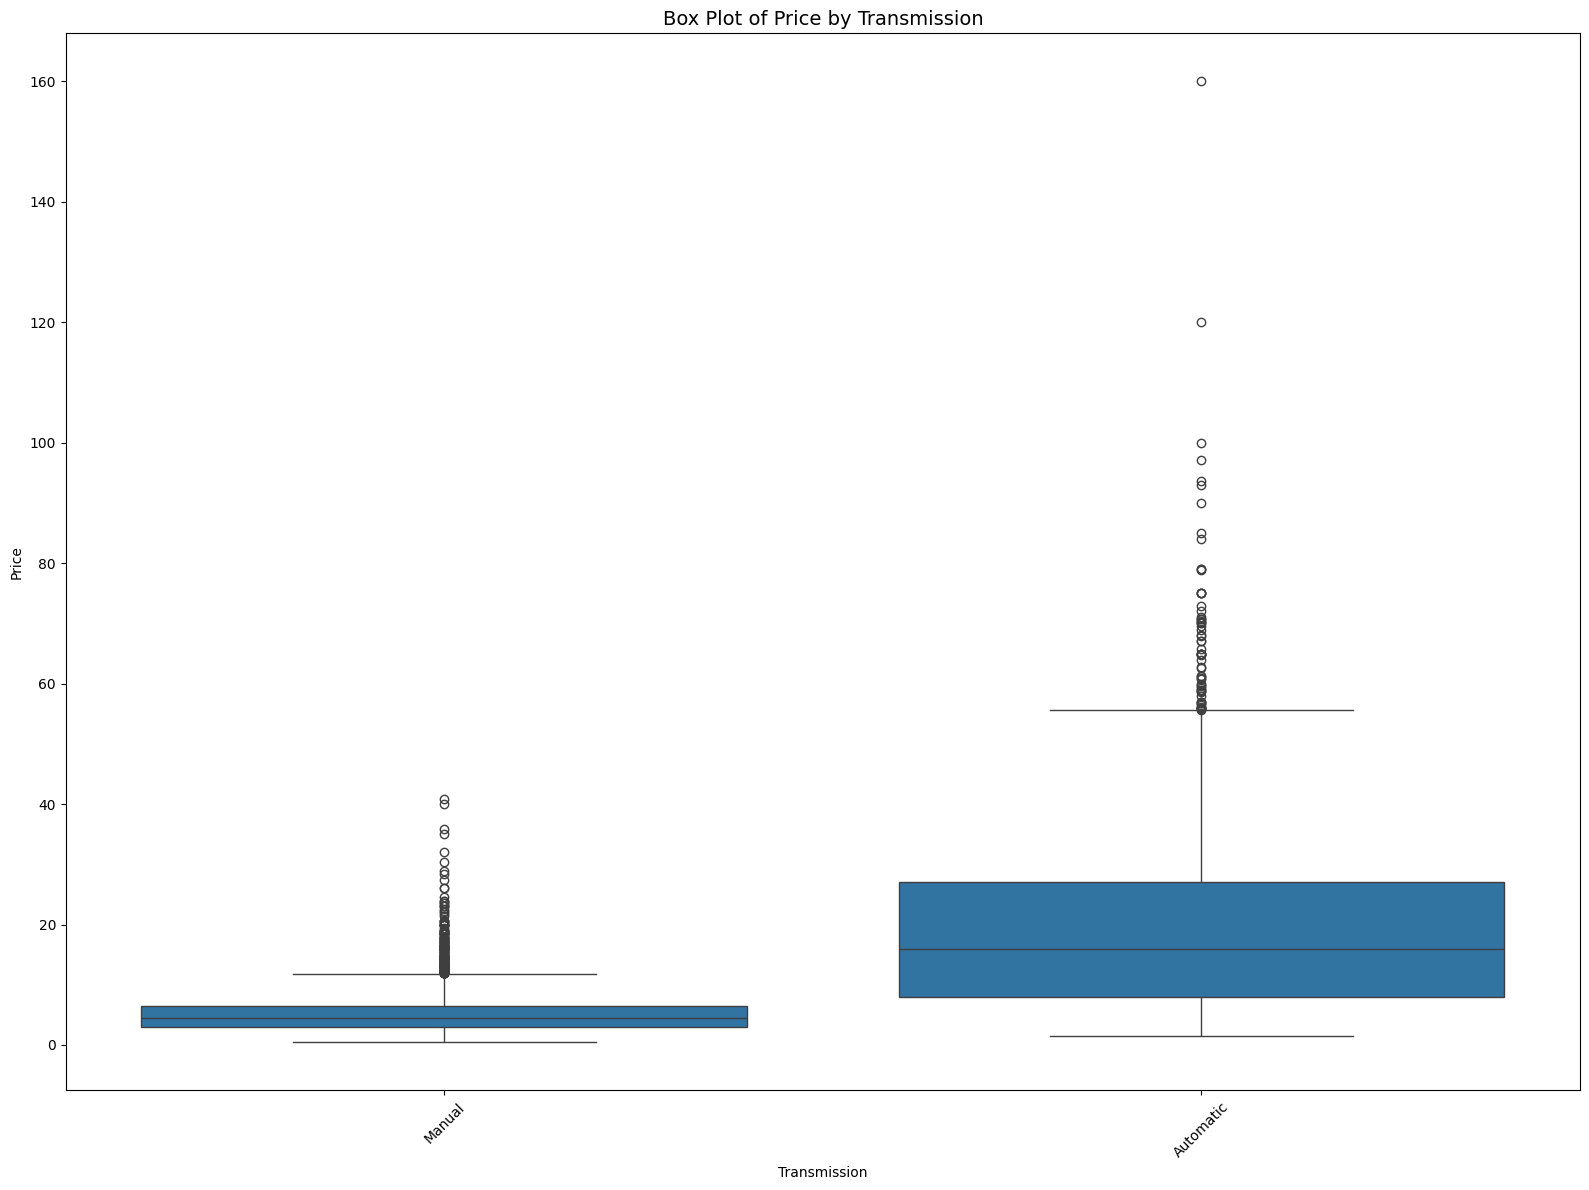


Statistics for Mileage_kmpl by Transmission:

               count       mean       std  min      25%    50%    75%     max
Transmission                                                                 
Automatic     2047.0  15.757084  4.090304  0.0  12.9000  15.97  18.25  28.400
Manual        5204.0  19.218033  4.762306  0.0  16.5075  18.90  22.07  46.956


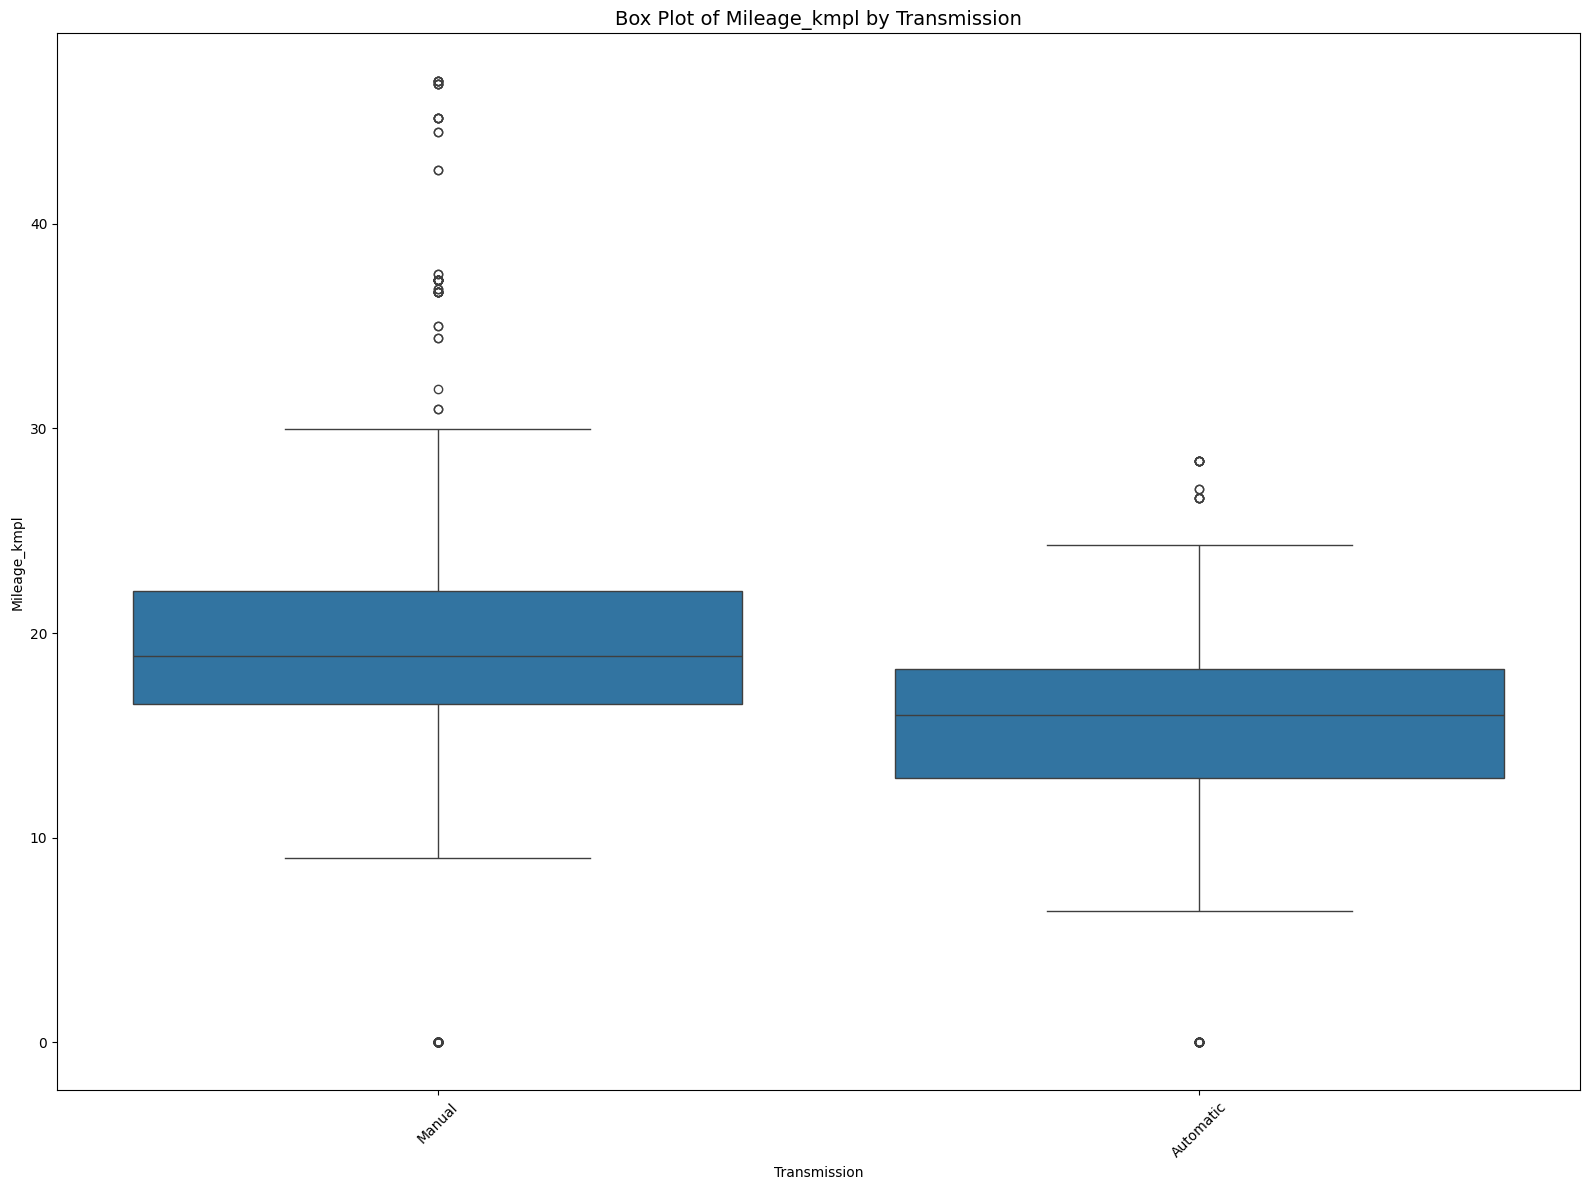


Statistics for Engine_CC by Transmission:

               count         mean         std    min     25%     50%     75%  \
Transmission                                                                   
Automatic     2038.0  2085.066732  666.549595   72.0  1598.0  1995.0  2354.0   
Manual        5169.0  1431.858967  445.318499  624.0  1197.0  1248.0  1498.0   

                 max  
Transmission          
Automatic     5998.0  
Manual        3436.0  


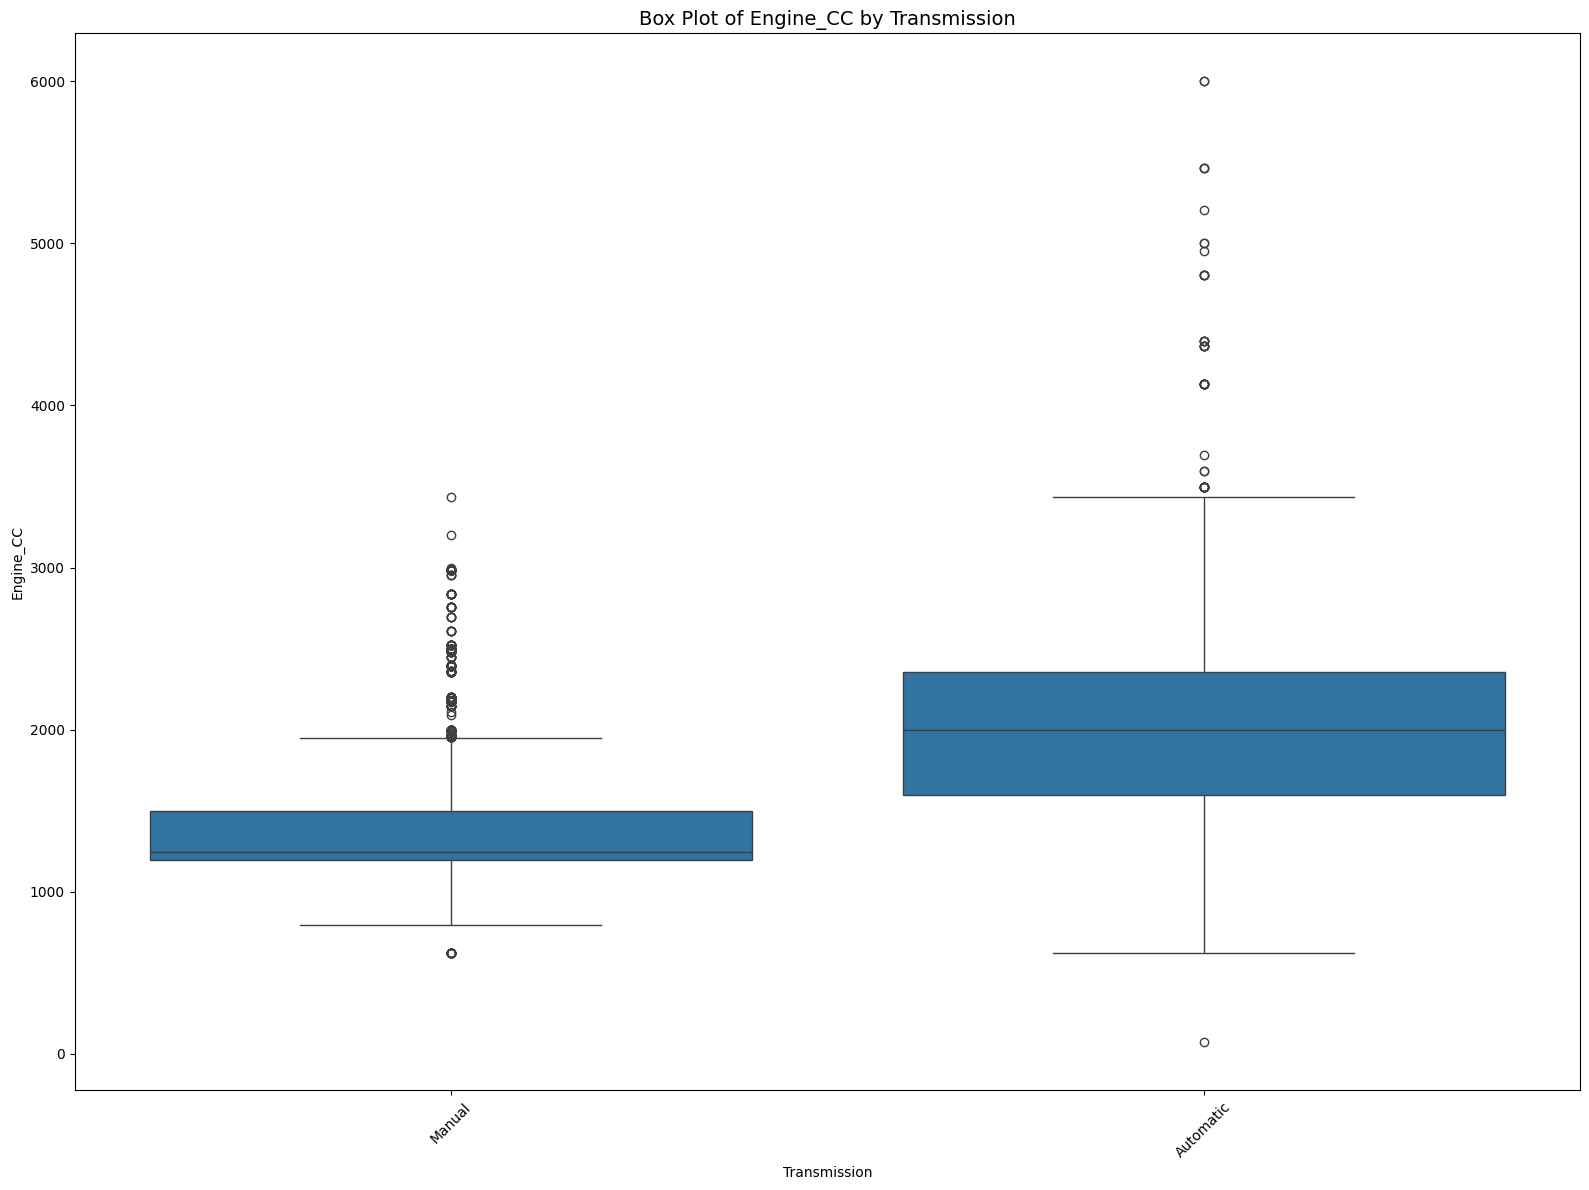


Statistics for Kilometers_Driven_Log by Owner_Type:

                 count       mean       std       min        25%        50%  \
Owner_Type                                                                    
First           5952.0  10.688491  0.731696  5.147494  10.346441  10.819798   
Fourth & Above    12.0  11.453965  0.795057  9.546884  11.193342  11.356406   
Second          1152.0  11.066346  0.523457  8.006701  10.778977  11.098356   
Third            137.0  11.283448  0.472898  8.779711  11.050906  11.289794   

                      75%        max  
Owner_Type                            
First           11.150254  15.687313  
Fourth & Above  11.885235  12.476104  
Second          11.387078  12.429220  
Third           11.522886  12.449023  


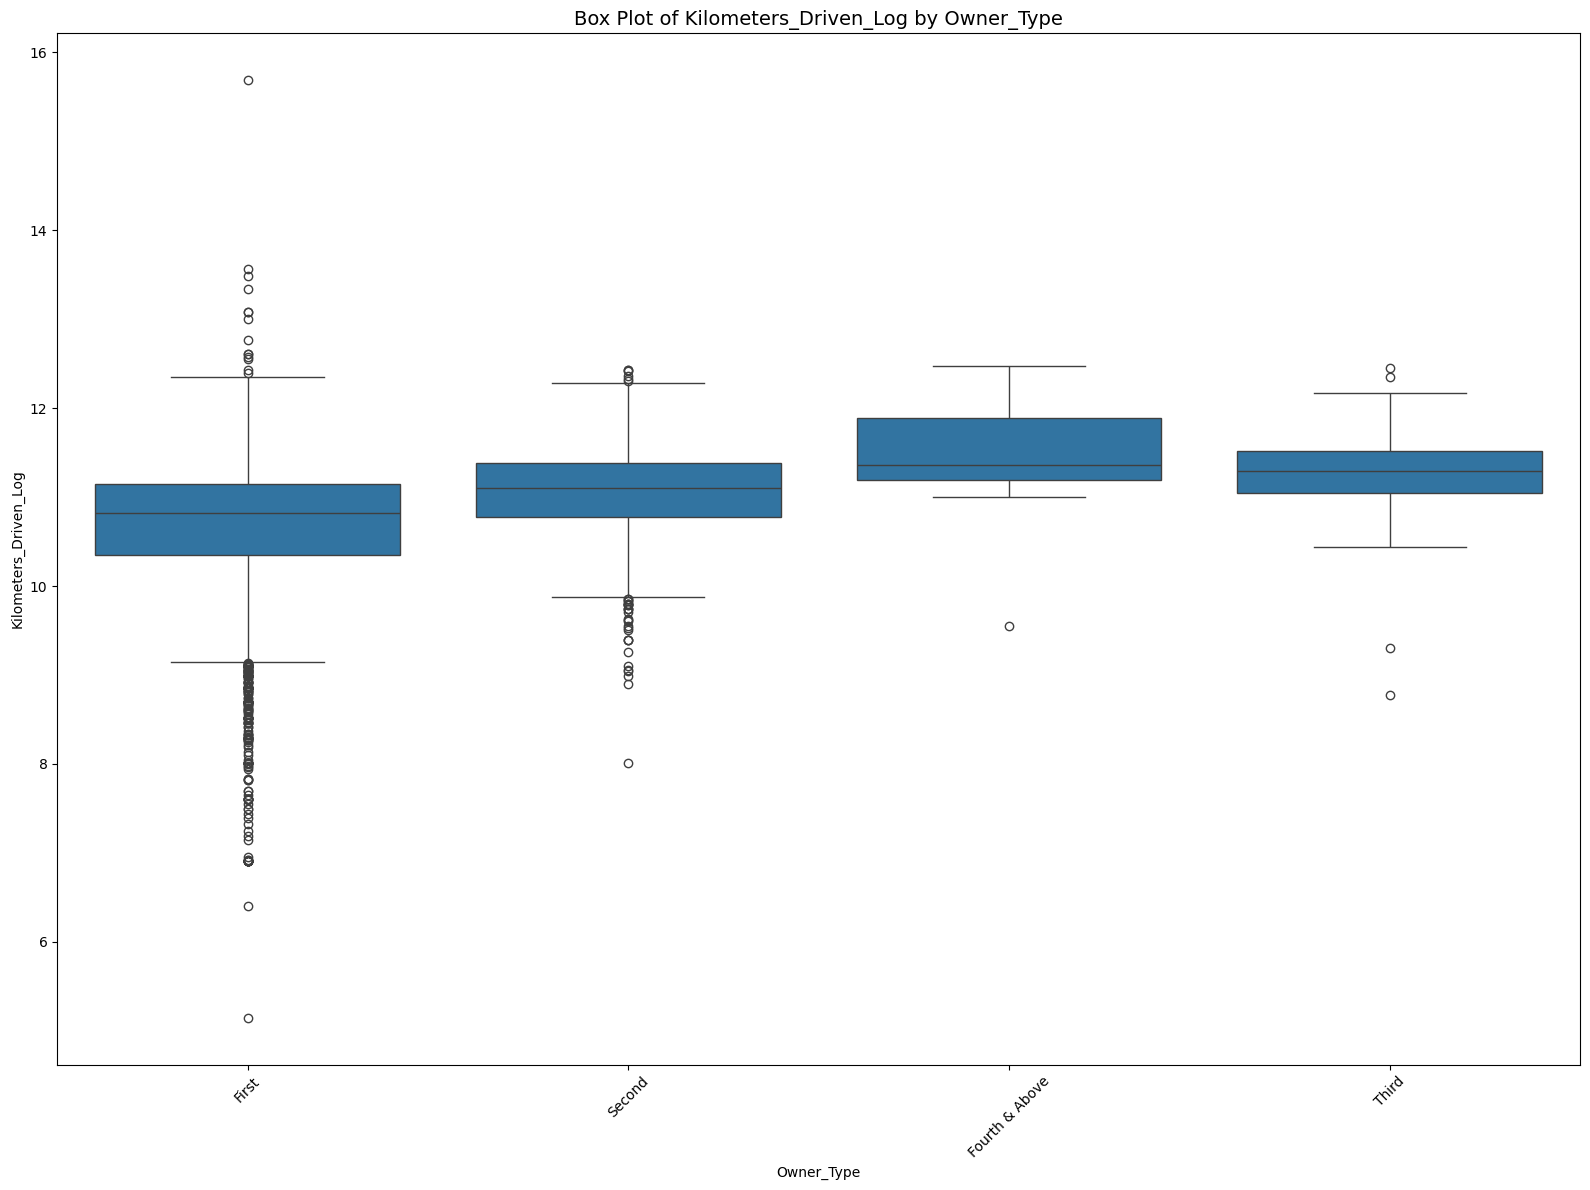


Statistics for Power_bhp by Owner_Type:

                 count        mean        std   min    25%     50%     75%  \
Owner_Type                                                                   
First           5844.0  112.075425  52.368444  34.2  75.94   91.45  138.03   
Fourth & Above     9.0   89.686667  43.438688  34.2  70.00   80.00  102.00   
Second          1101.0  116.026231  56.744116  35.0  75.00  100.60  141.10   
Third            124.0  117.994677  72.552201  35.0  70.00  102.00  142.50   

                  max  
Owner_Type             
First           552.0  
Fourth & Above  163.5  
Second          616.0  
Third           560.0  


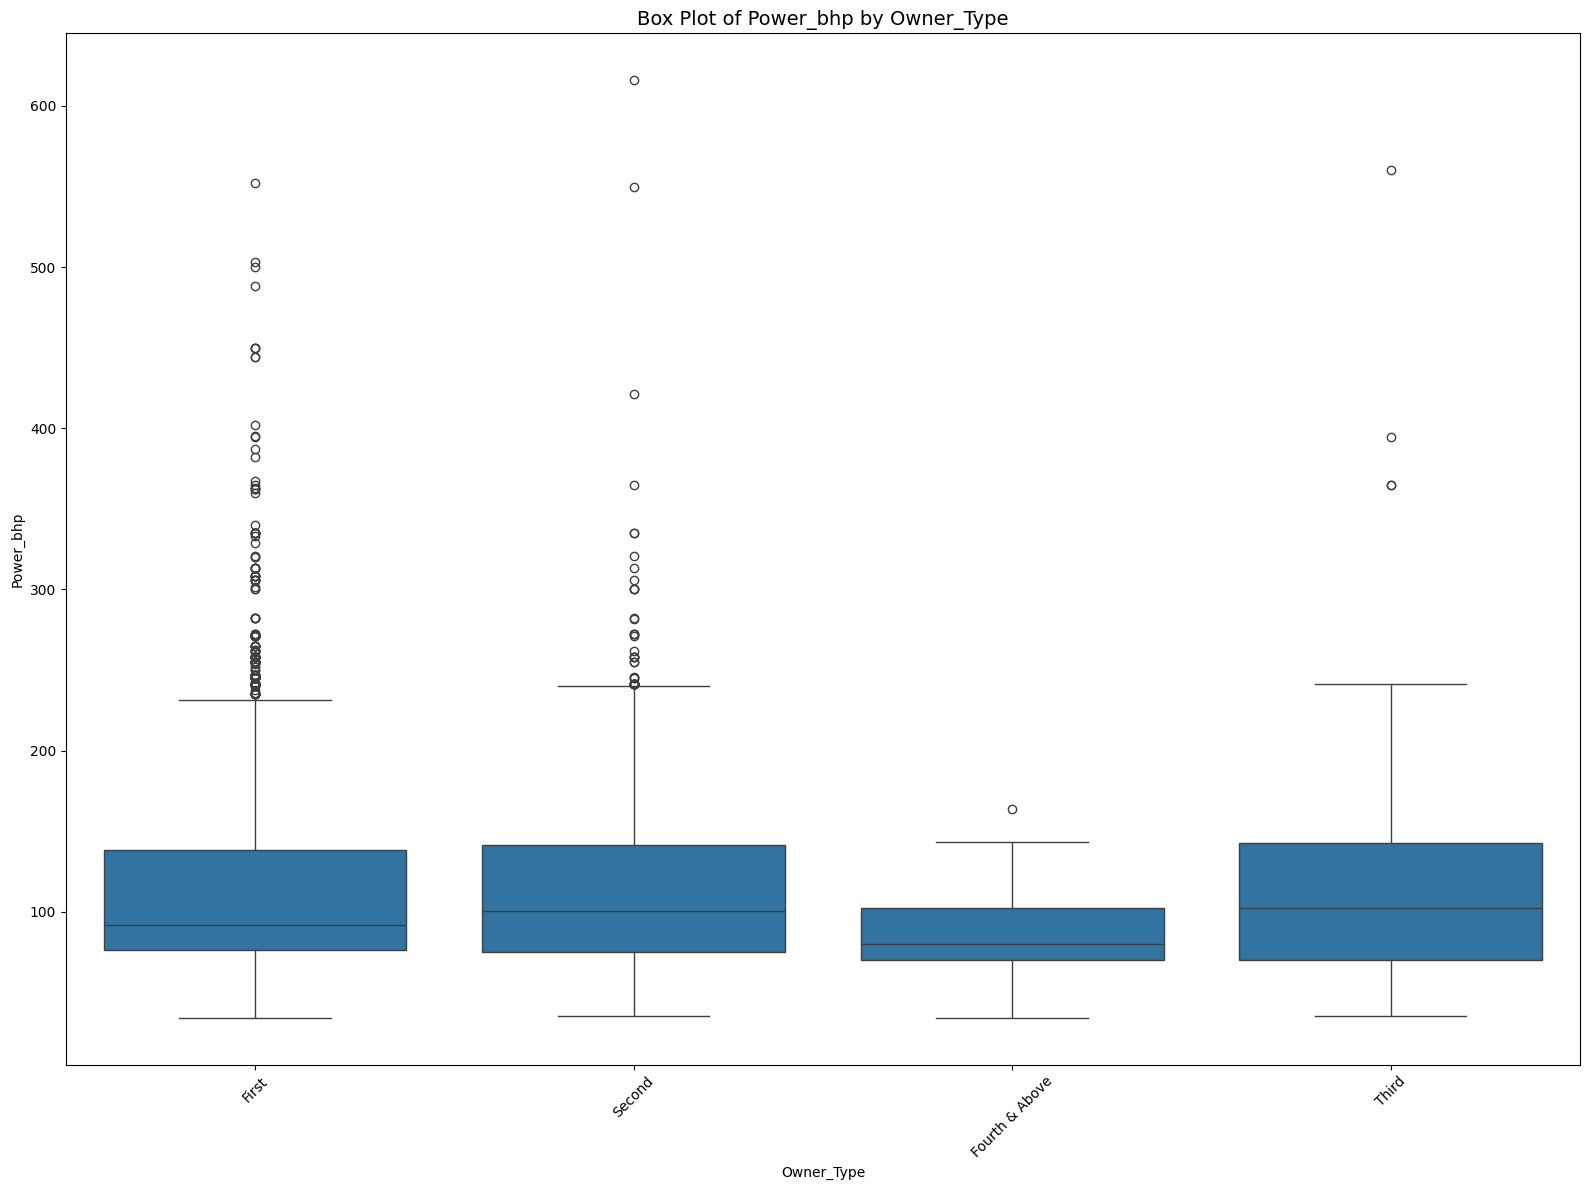


Statistics for Price by Owner_Type:

                 count      mean        std   min   25%   50%    75%    max
Owner_Type                                                                 
First           4929.0  9.962445  11.415998  0.50  3.75  5.91  10.50  160.0
Fourth & Above     9.0  3.280000   1.316378  1.97  2.20  3.00   4.00    5.5
Second           968.0  7.599886   9.515689  0.44  2.45  4.27   8.25   90.0
Third            113.0  5.007257  12.055917  0.45  1.30  2.65   4.20  120.0


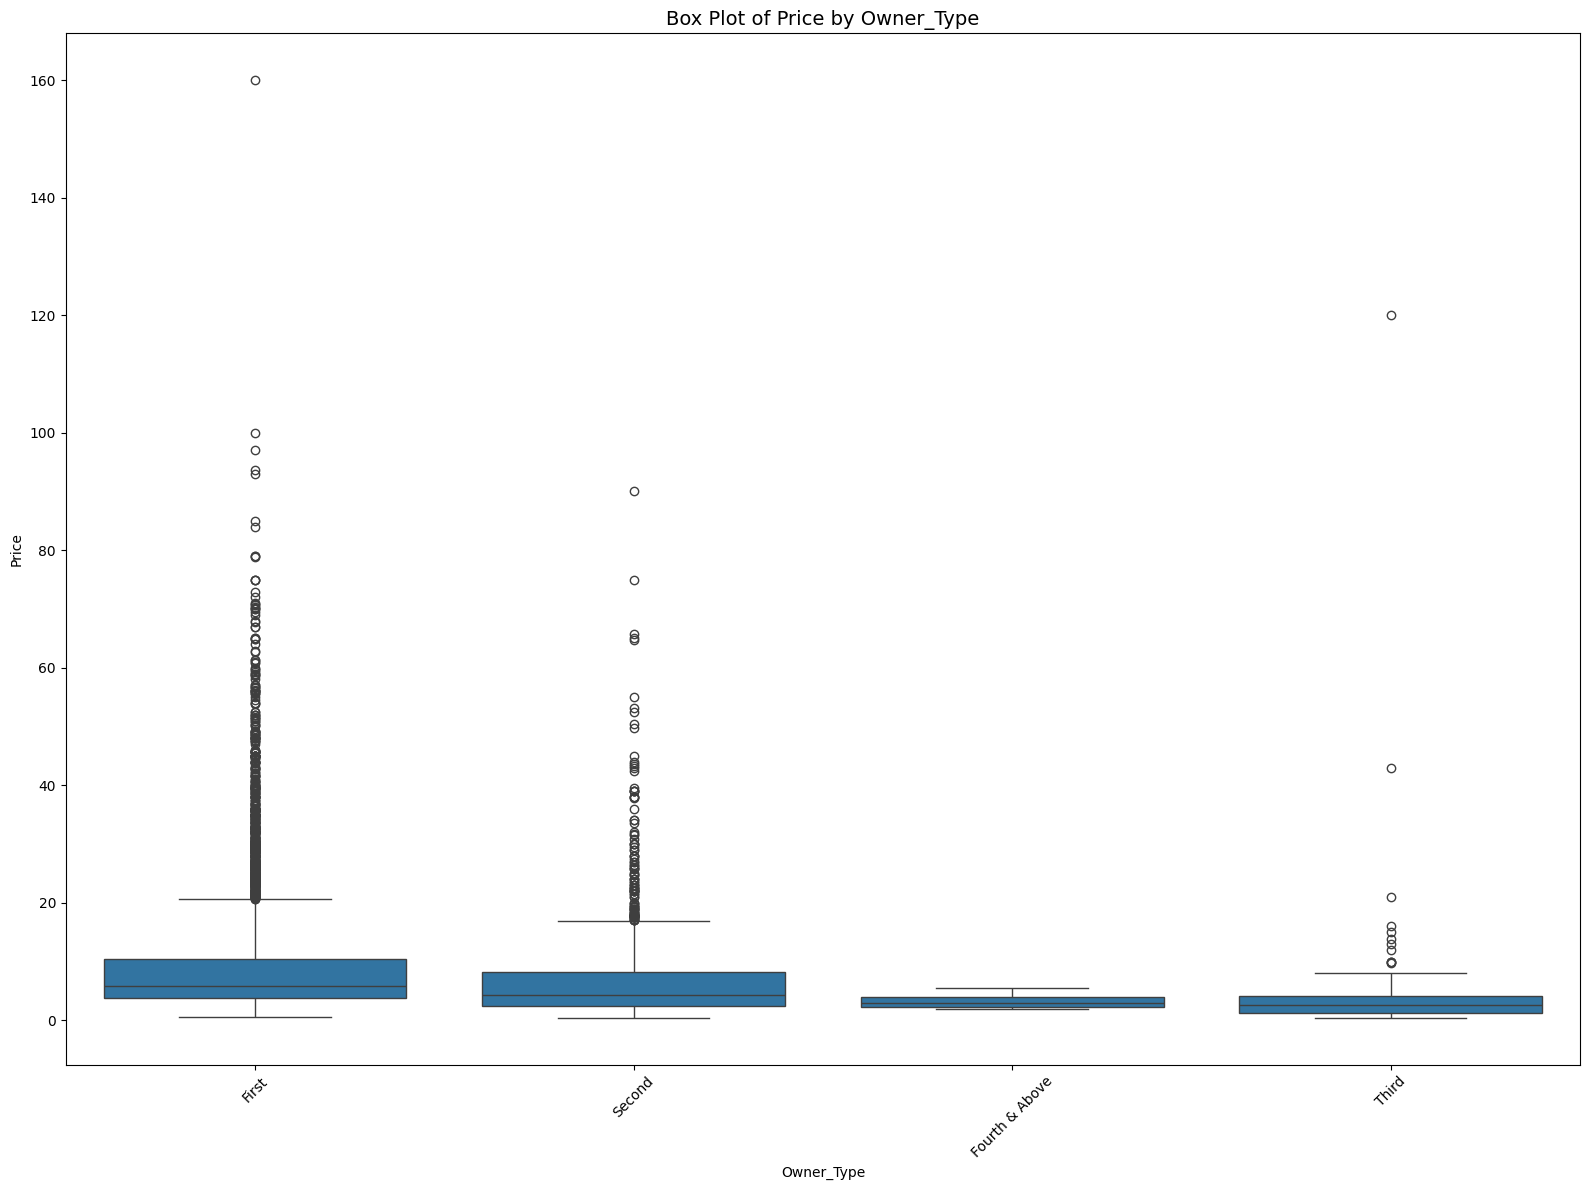


Statistics for Mileage_kmpl by Owner_Type:

                 count       mean       std  min    25%    50%    75%     max
Owner_Type                                                                   
First           5950.0  18.566067  4.786779  0.0  15.70  18.60  21.40  46.956
Fourth & Above    12.0  12.633333  6.969457  0.0  10.60  13.30  16.85  23.900
Second          1152.0  16.960307  4.776026  0.0  14.16  17.00  19.40  46.816
Third            137.0  15.382628  4.468006  0.0  13.10  16.07  18.00  28.400


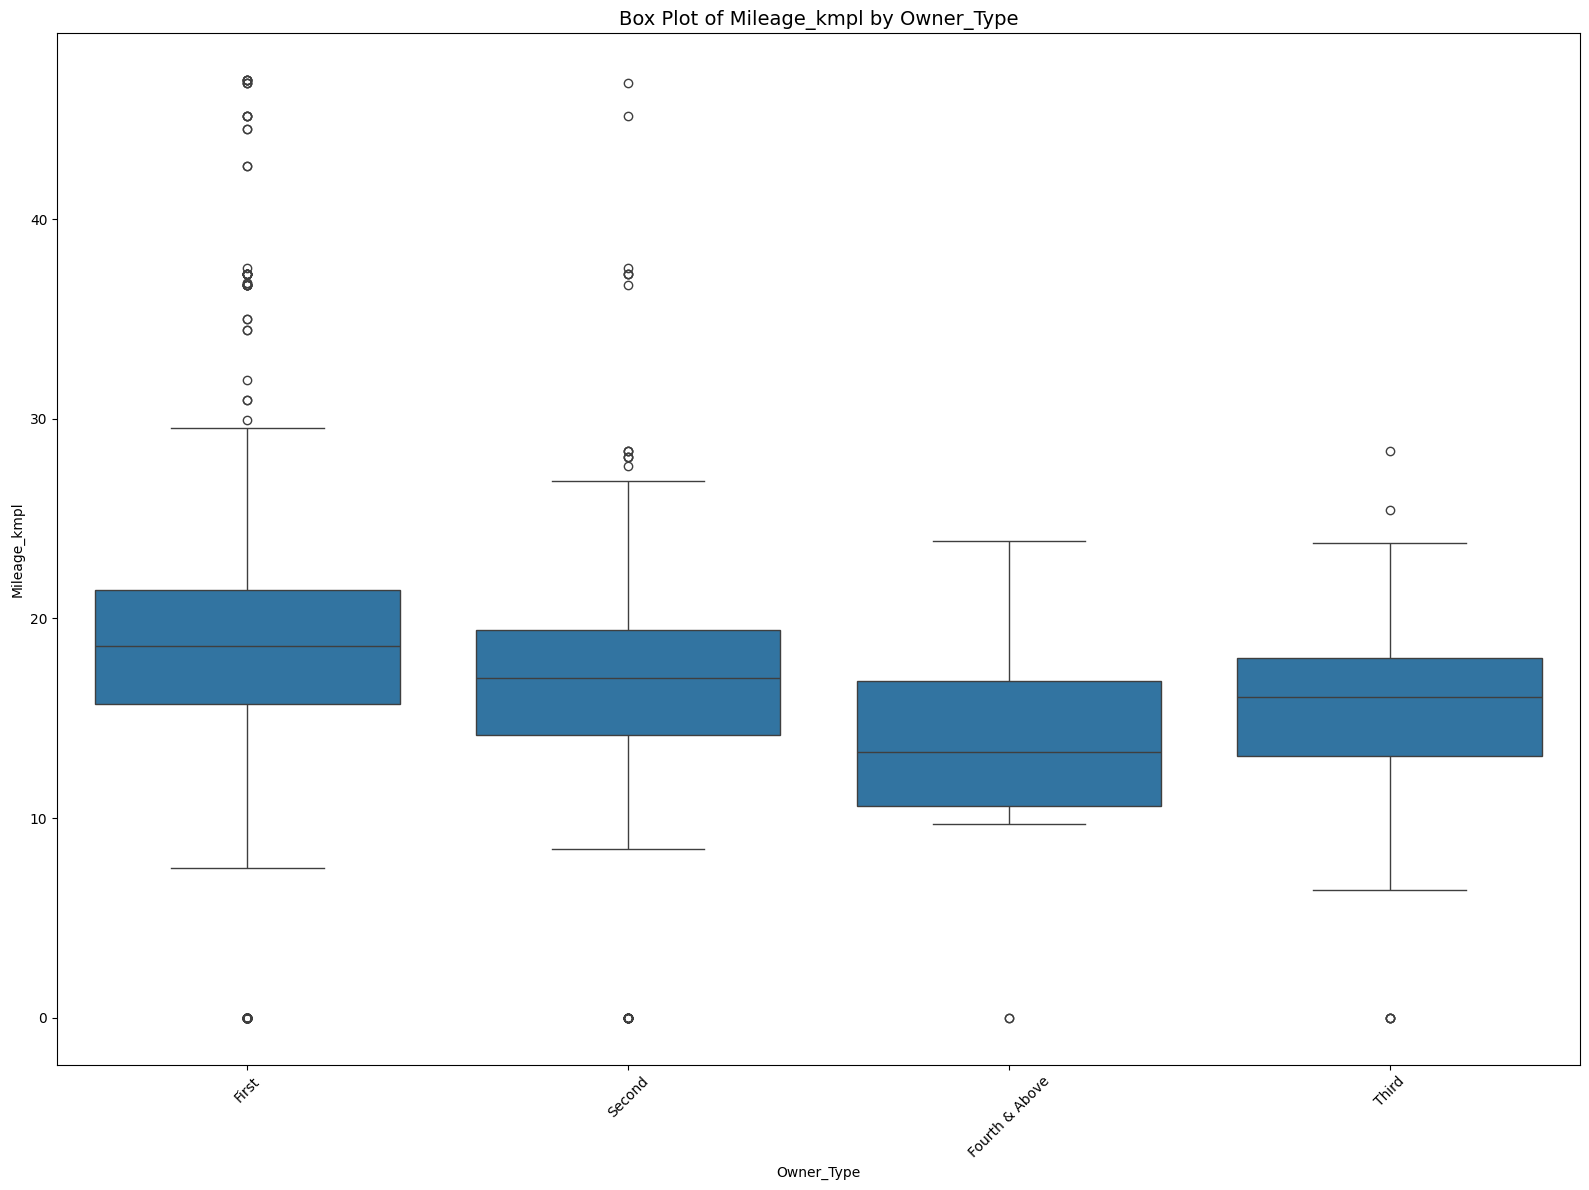


Statistics for Engine_CC by Owner_Type:

                 count         mean         std    min     25%     50%  \
Owner_Type                                                               
First           5926.0  1603.078468  586.415958   72.0  1197.0  1461.0   
Fourth & Above    11.0  1644.636364  747.904041  624.0  1098.0  1299.0   
Second          1136.0  1673.030810  619.581402  624.0  1198.0  1497.0   
Third            134.0  1732.447761  716.257930  796.0  1209.0  1497.0   

                    75%     max  
Owner_Type                       
First           1968.00  5998.0  
Fourth & Above  2470.00  2499.0  
Second          1995.00  5998.0  
Third           2133.75  5204.0  


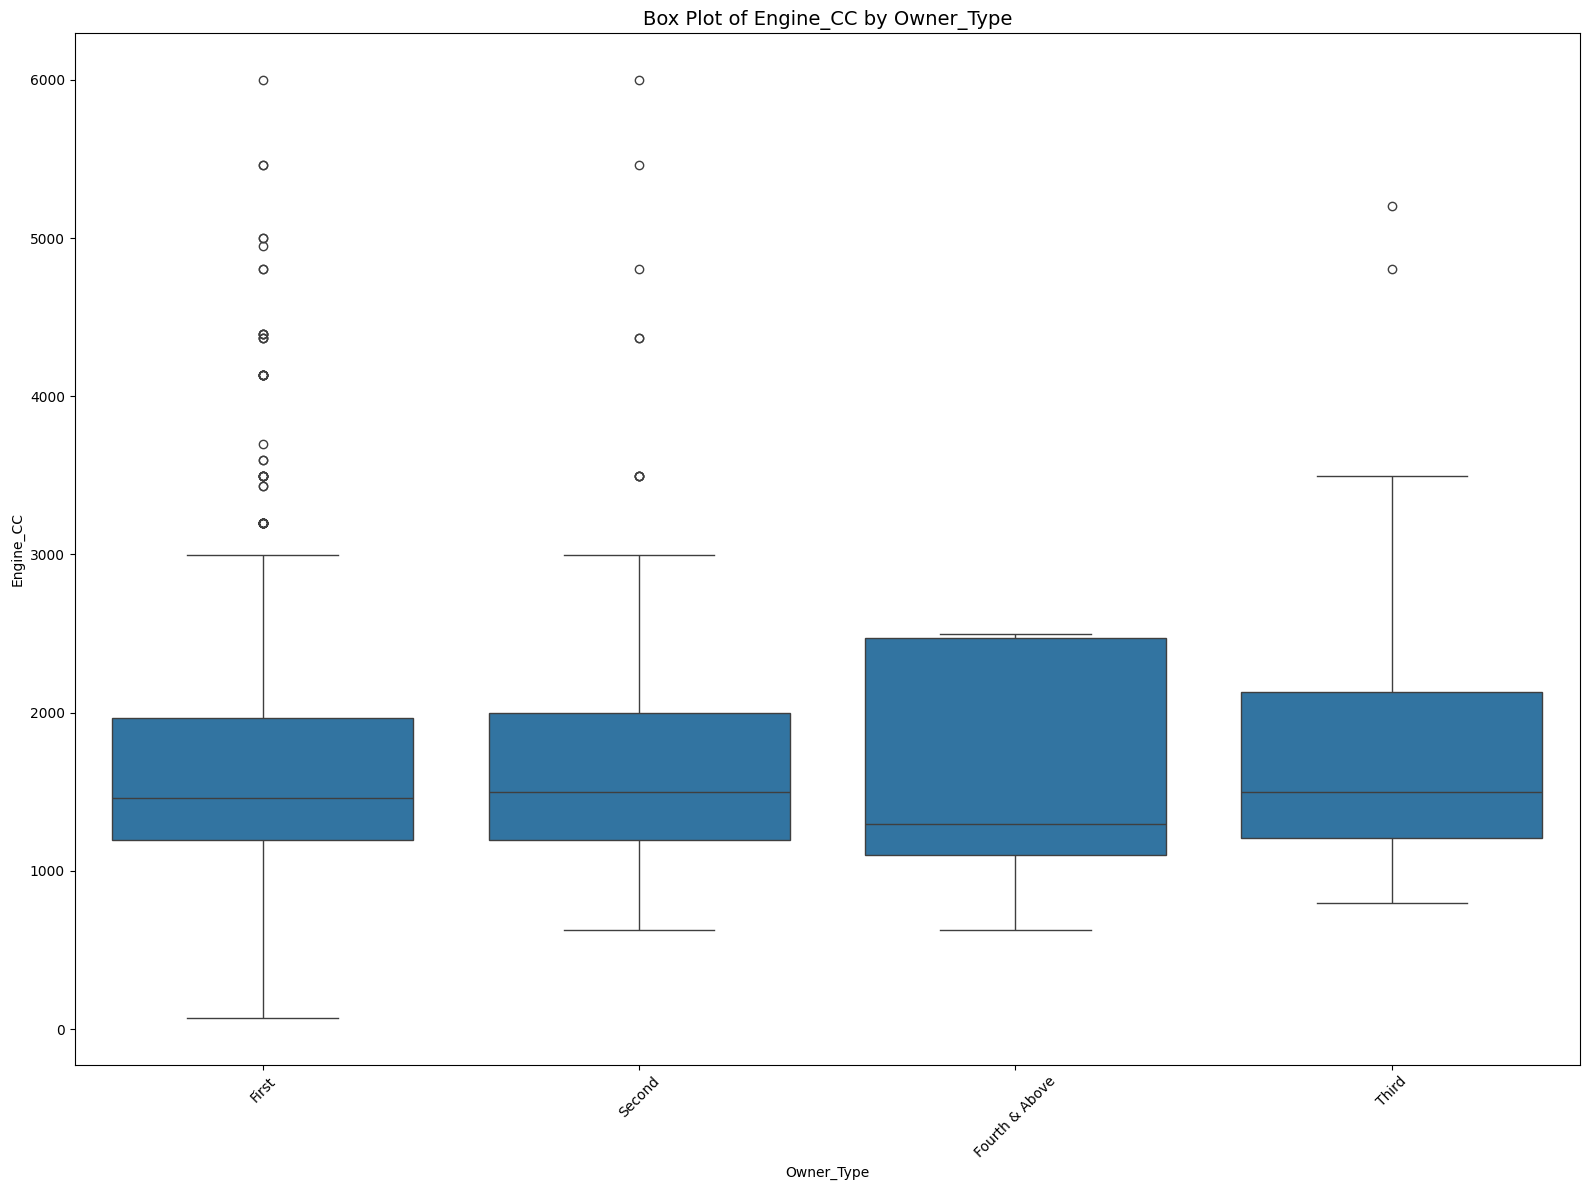

In [20]:

categorical_columns = ['Brand','Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']
numerical_columns = ['Kilometers_Driven_Log','Power_bhp','Price','Mileage_kmpl','Engine_CC']

# 2. Categorical vs Numerical: Box plots
def categorical_vs_numerical_with_stats(df, categorical_columns, numerical_columns):
    for cat_col in categorical_columns:
        for num_col in numerical_columns:
            # Grouped statistics
            stats = df.groupby(cat_col)[num_col].describe()
            print(f"\nStatistics for {num_col} by {cat_col}:\n")
            print(stats)
            
            # Box plot
            plt.figure(figsize=(16, 12))  # Larger figure size for clarity
            sns.boxplot(x=df[cat_col], y=df[num_col])
            plt.title(f'Box Plot of {num_col} by {cat_col}', fontsize=14)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

print("\n### Categorical vs Numerical ###")
categorical_vs_numerical_with_stats(df, categorical_columns, numerical_columns)

### Observations from Categorical vs Numerical Statistics
---

#### 1. Location vs Kilometers_Driven_Log
- **Highest Median:** Hyderabad (11.13), indicating high usage in this location.
- **Lowest Median:** Kolkata (10.59) and Mumbai (10.63), showing lower usage.
- **Wide Spread:** Locations like Chennai and Jaipur show larger max values (15.69 and 12.76 respectively), indicating some heavily used cars.

#### 2. Location vs Power_bhp
- **Highest Average Power:** Bangalore (132.90), Coimbatore (123.65), and Delhi (120.33), suggesting preference for high-power vehicles.
- **Lowest Average Power:** Jaipur (93.00) and Kolkata (100.65).
- **Maximum Power:** Bangalore (616.00), indicating outliers with very high power.

#### 3. Location vs Price
- **Highest Average Price:** Coimbatore (15.08) and Bangalore (13.33).
- **Lowest Average Price:** Kolkata (5.66) and Jaipur (5.81), indicating affordability in these regions.
- **Highest Price:** Hyderabad (160.00), showcasing premium vehicles.

#### 4. Location vs Mileage_kmpl
- **Highest Average Mileage:** Kolkata (19.20), Jaipur (19.05), and Kochi (18.76), indicating efficient vehicles.
- **Lowest Average Mileage:** Bangalore (16.77) and Coimbatore (17.90).
- **Maximum Mileage:** Delhi, Kochi, and Hyderabad, all with values close to 46.95.

#### 5. Location vs Engine_CC
- **Highest Average Engine Capacity:** Bangalore (1814.67), Delhi (1709.91), and Coimbatore (1695.10), indicating preference for large engines.
- **Lowest Average Engine Capacity:** Jaipur (1440.14) and Kolkata (1468.90).
- **Maximum Engine Capacity:** Bangalore (5998), showcasing some very large engines.

#### 6. Year vs Kilometers_Driven_Log
- **Increasing Usage:** Older vehicles from 1996–2000 show higher medians (11.08–11.51), while newer vehicles (2017–2019) have lower medians (10.28–9.64), reflecting reduced usage.

#### 7. Year vs Power_bhp
- **Increasing Trend:** Average power increased significantly over the years, peaking in 2019 (121.69).
- **Maximum Power:** Remained high across years, with notable outliers (616.00 in 2008).

#### 8. Year vs Price
- **Rising Prices:** Average prices have increased consistently, with the highest in 2019 (19.46).
- **Significant Spread:** Older vehicles (e.g., 2006) show large spreads due to lower medians and very high max prices.

#### 9. Fuel_Type vs Power_bhp
- **Highest Average Power:** Diesel (127.20) and Petrol (96.93).
- **Lowest Average Power:** CNG (64.31) and LPG (62.53).
- **Maximum Power:** Diesel (394.30), reflecting performance-oriented vehicles.

#### 10. Fuel_Type vs Price
- **Highest Average Price:** Diesel (12.84) and Electric (12.87), indicating premium pricing.
- **Lowest Average Price:** CNG (3.51) and LPG (2.49).

#### 11. Transmission vs Price
- **Automatic Transmission:** Higher average price (19.84) and maximum price (160.00).
- **Manual Transmission:** Lower average price (5.33), indicating affordability.

#### 12. Transmission vs Mileage_kmpl
- **Higher Efficiency:** Manual cars (19.21) show better mileage than automatics (15.76).
- **Maximum Mileage:** Manual cars (46.95), showcasing highly efficient models.

#### 13. Owner_Type vs Kilometers_Driven_Log
- **Higher Usage:** Third (11.28) and Second (11.07) owners tend to drive more.
- **Lower Usage:** First owners (10.69), indicating less wear and tear.

#### 14. Owner_Type vs Price
- **First Owners:** Highest average price (9.96), reflecting better condition and higher value.
- **Second Owners:** Moderate average price (7.60), while **Third Owners** show significant depreciation (5.00).

#### 15. Owner_Type vs Mileage_kmpl
- **First Owners:** Highest average mileage (18.57), reflecting efficient vehicles.
- **Third Owners:** Lowest average mileage (15.38), indicating older or less efficient cars.

#### 16. Owner_Type vs Engine_CC
- **Higher Engine Capacity:** Third (1732.45) and Second (1673.03) owners prefer larger engines.
- **Lower Engine Capacity:** Fourth & Above (1644.63) and First (1603.08).



### Categorical vs Categorical (Percentage Contribution) ###
Percentage Contribution Table: Brand vs Location
Location       Ahmedabad  Bangalore     Chennai  Coimbatore       Delhi  \
Brand                                                                     
Ambassador      0.000000   0.000000  100.000000    0.000000    0.000000   
Audi            4.561404  14.035088    3.859649   19.649123   10.877193   
BMW             5.769231   9.615385    9.294872   13.141026    7.692308   
Bentley         0.000000  50.000000    0.000000    0.000000    0.000000   
Chevrolet       1.986755   5.960265   11.258278   10.596026    1.986755   
Datsun          0.000000  11.764706   11.764706    5.882353    0.000000   
Fiat            0.000000   0.000000    5.263158   10.526316    2.631579   
Force           0.000000   0.000000   33.333333    0.000000    0.000000   
Ford            1.709402   5.413105   15.669516   10.256410    5.698006   
Hindustan       0.000000   0.000000    0.000000    0.000000    0

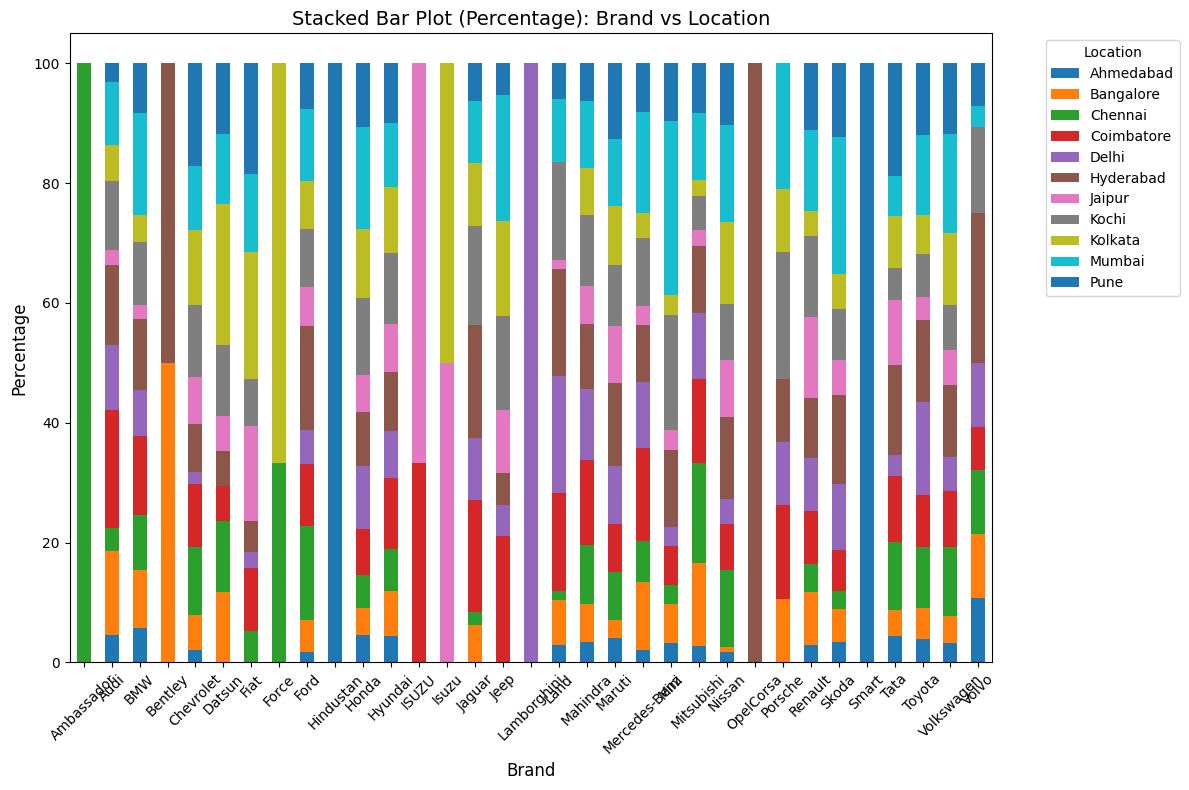

Percentage Contribution Table: Brand vs Year
Year            1996      1998      1999      2000      2001      2002  \
Brand                                                                    
Ambassador       0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
Audi             0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
BMW              0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
Bentley          0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
Chevrolet        0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
Datsun           0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
Fiat             0.0  0.000000  0.000000  0.000000  2.631579  0.000000   
Force            0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
Ford             0.0  0.000000  0.000000  0.000000  0.000000  0.284900   
Hindustan      100.0  0.000000  0.000000  0.000000  0.000000  0.000000   
Honda            0.0  0.000000  0.134590  0.000000  0.134590  0.269

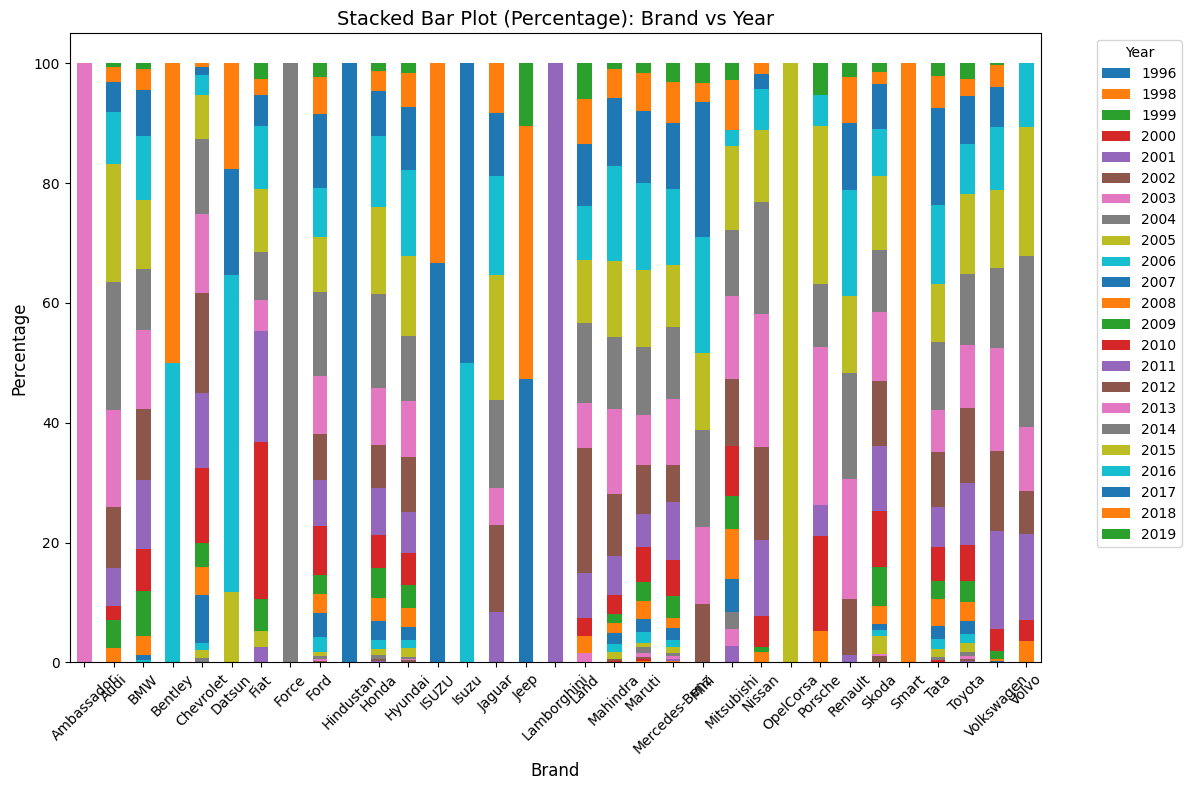

Percentage Contribution Table: Brand vs Fuel_Type
Fuel_Type           CNG      Diesel  Electric       LPG      Petrol
Brand                                                              
Ambassador     0.000000  100.000000  0.000000  0.000000    0.000000
Audi           0.000000   92.631579  0.000000  0.000000    7.368421
BMW            0.000000   89.743590  0.000000  0.000000   10.256410
Bentley        0.000000    0.000000  0.000000  0.000000  100.000000
Chevrolet      0.000000   47.019868  0.000000  0.000000   52.980132
Datsun         0.000000    0.000000  0.000000  0.000000  100.000000
Fiat           0.000000   50.000000  0.000000  0.000000   50.000000
Force          0.000000  100.000000  0.000000  0.000000    0.000000
Ford           0.000000   67.806268  0.000000  0.000000   32.193732
Hindustan      0.000000  100.000000  0.000000  0.000000    0.000000
Honda          0.000000   21.534320  0.000000  0.000000   78.465680
Hyundai        0.373134   31.641791  0.000000  0.447761   67.53731

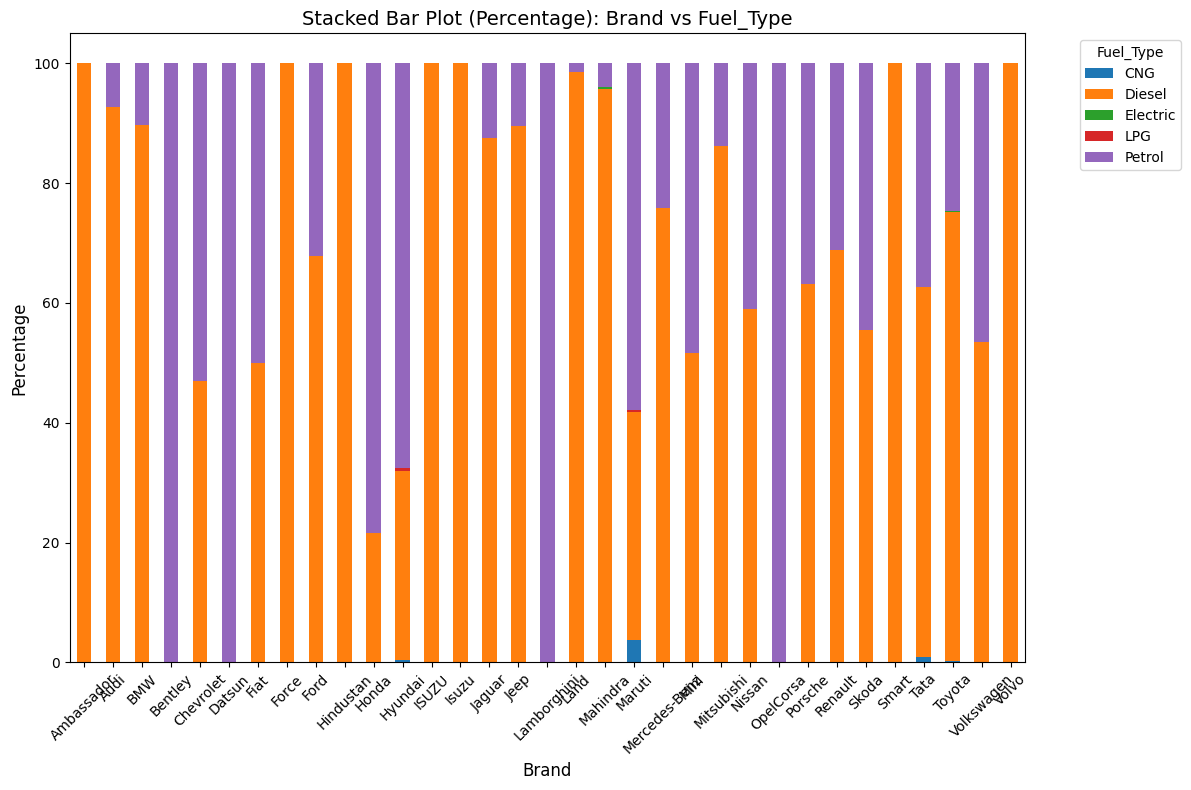

Percentage Contribution Table: Brand vs Transmission
Transmission    Automatic      Manual
Brand                                
Ambassador       0.000000  100.000000
Audi            99.298246    0.701754
BMW            100.000000    0.000000
Bentley        100.000000    0.000000
Chevrolet        7.284768   92.715232
Datsun           0.000000  100.000000
Fiat             2.631579   97.368421
Force            0.000000  100.000000
Ford            12.820513   87.179487
Hindustan        0.000000  100.000000
Honda           21.130552   78.869448
Hyundai         13.358209   86.641791
ISUZU            0.000000  100.000000
Isuzu           50.000000   50.000000
Jaguar         100.000000    0.000000
Jeep             5.263158   94.736842
Lamborghini    100.000000    0.000000
Land            98.507463    1.492537
Mahindra         9.365559   90.634441
Maruti           8.102493   91.897507
Mercedes-Benz   94.473684    5.526316
Mini            93.548387    6.451613
Mitsubishi      33.333333   66.6666

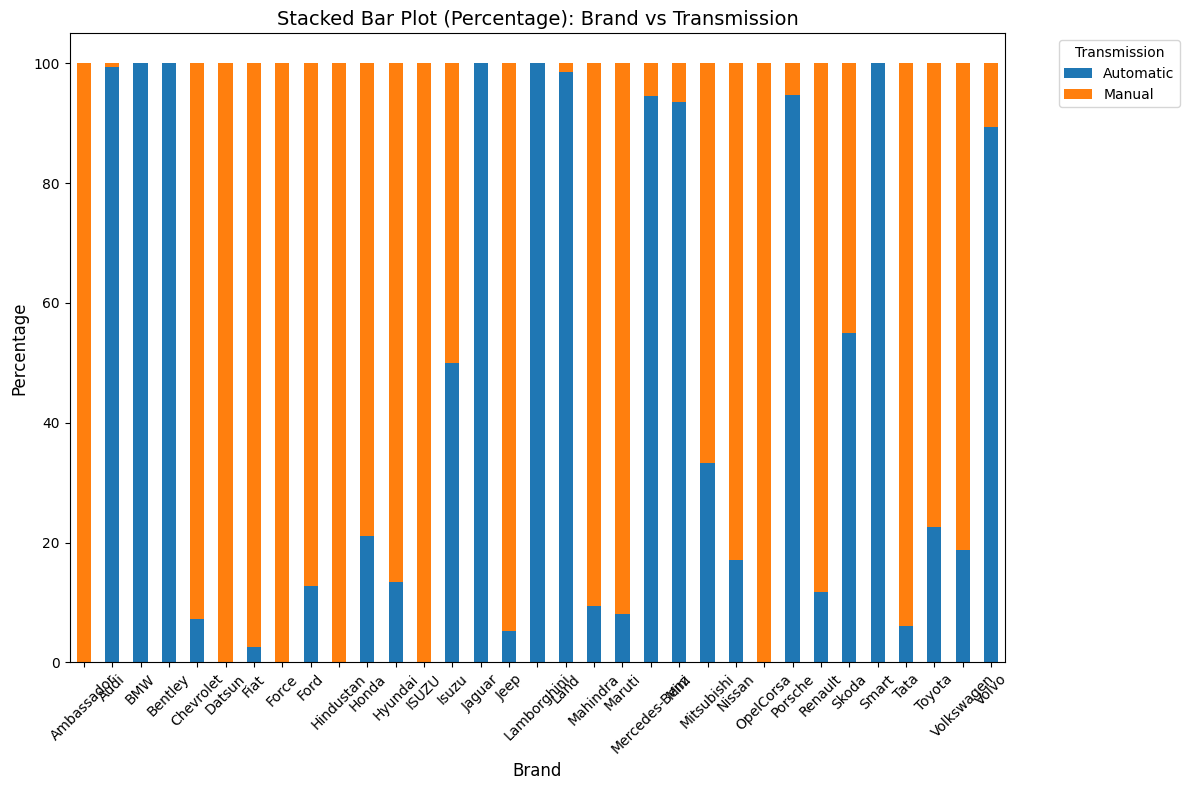

Percentage Contribution Table: Brand vs Owner_Type
Owner_Type          First  Fourth & Above      Second       Third
Brand                                                            
Ambassador       0.000000        0.000000    0.000000  100.000000
Audi            80.000000        0.000000   18.947368    1.052632
BMW             77.884615        0.000000   19.551282    2.564103
Bentley         50.000000        0.000000   50.000000    0.000000
Chevrolet       72.185430        0.000000   21.854305    5.960265
Datsun         100.000000        0.000000    0.000000    0.000000
Fiat            71.052632        0.000000   23.684211    5.263158
Force          100.000000        0.000000    0.000000    0.000000
Ford            78.917379        0.569801   17.094017    3.418803
Hindustan        0.000000        0.000000  100.000000    0.000000
Honda           81.965007        0.000000   15.208614    2.826380
Hyundai         83.134328        0.149254   15.149254    1.567164
ISUZU          100.000000

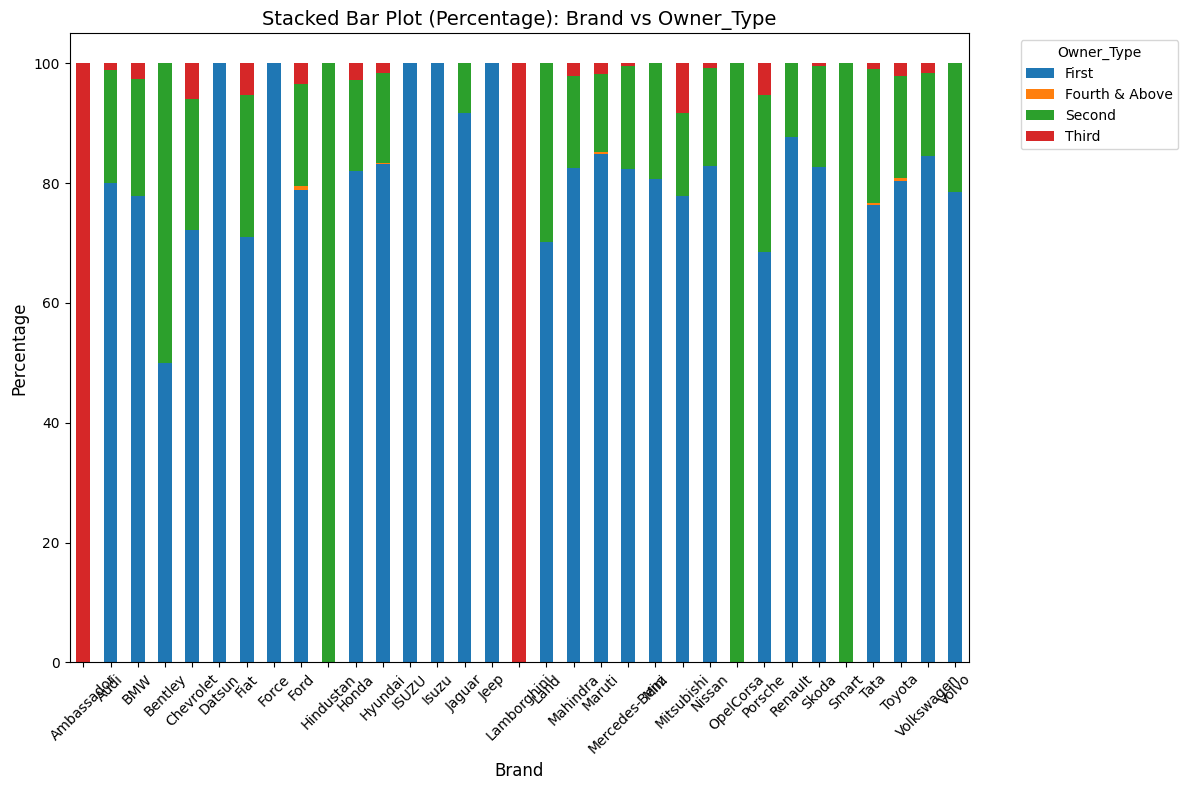

Percentage Contribution Table: Location vs Year
Year            1996      1998      1999      2000      2001      2002  \
Location                                                                 
Ahmedabad   0.000000  0.000000  0.000000  0.000000  0.000000  0.363636   
Bangalore   0.000000  0.000000  0.000000  0.000000  0.000000  0.454545   
Chennai     0.000000  0.000000  0.000000  0.000000  0.338409  1.184433   
Coimbatore  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Delhi       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Hyderabad   0.000000  0.114155  0.000000  0.114155  0.000000  0.114155   
Jaipur      0.000000  0.400802  0.200401  0.400802  0.400802  0.400802   
Kochi       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Kolkata     0.000000  0.000000  0.000000  0.152905  0.000000  0.305810   
Mumbai      0.000000  0.105374  0.000000  0.000000  0.105374  0.105374   
Pune        0.130719  0.000000  0.130719  0.130719  0.392157  0.

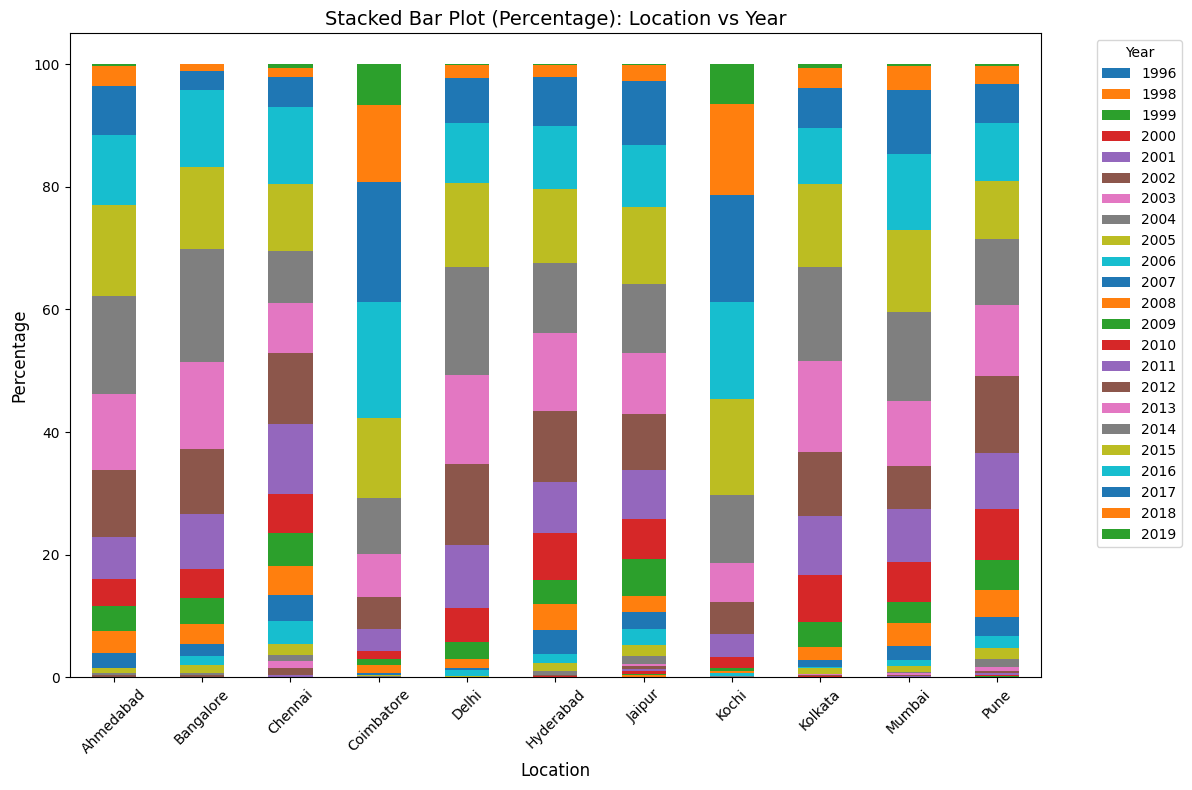

Percentage Contribution Table: Location vs Fuel_Type
Fuel_Type        CNG     Diesel  Electric       LPG     Petrol
Location                                                      
Ahmedabad   1.090909  61.454545  0.000000  0.000000  37.454545
Bangalore   0.227273  62.045455  0.000000  0.000000  37.727273
Chennai     0.338409  57.698816  0.169205  0.000000  41.793570
Coimbatore  0.000000  55.699482  0.000000  0.000000  44.300518
Delhi       1.818182  54.696970  0.000000  0.000000  43.484848
Hyderabad   0.342466  67.694064  0.000000  0.684932  31.278539
Jaipur      0.000000  55.310621  0.000000  0.801603  43.887776
Kochi       1.165803  46.373057  0.000000  0.000000  52.461140
Kolkata     0.152905  48.318043  0.000000  0.000000  51.529052
Mumbai      1.896733  39.093783  0.105374  0.105374  58.798736
Pune        1.699346  47.581699  0.000000  0.130719  50.588235


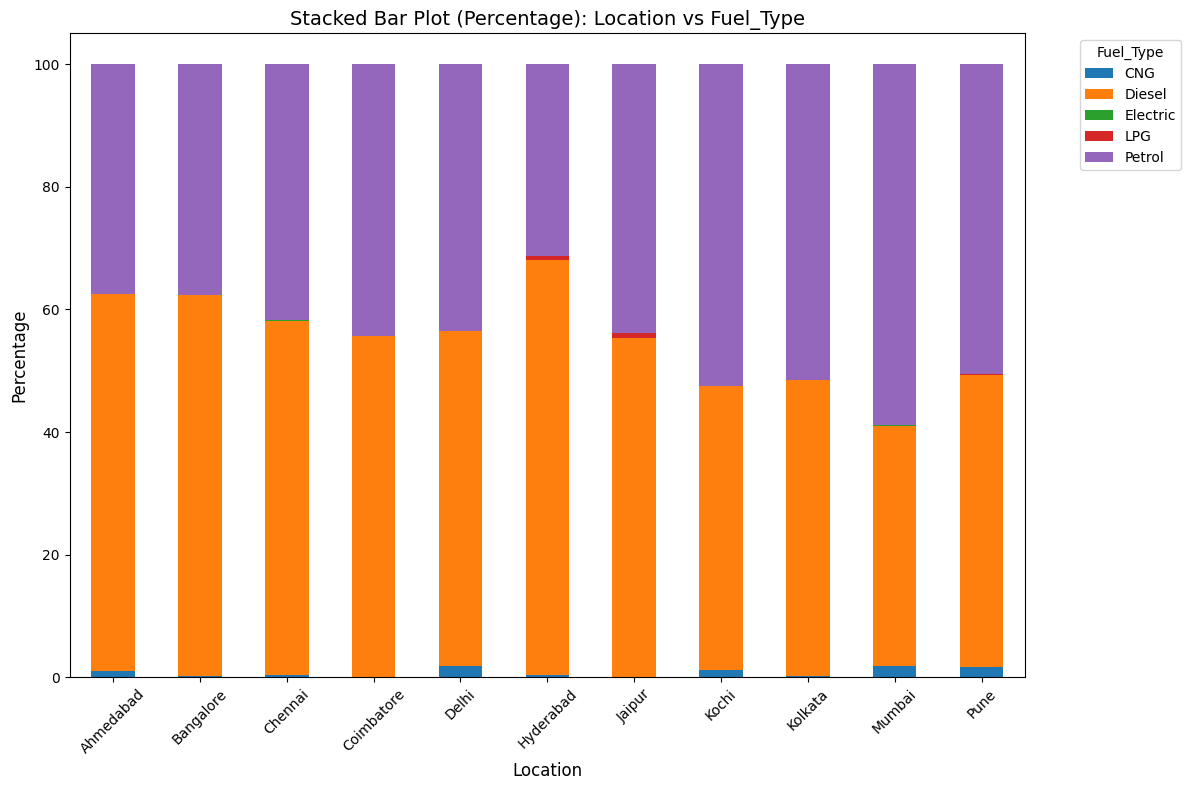

Percentage Contribution Table: Location vs Transmission
Transmission  Automatic     Manual
Location                          
Ahmedabad     26.181818  73.818182
Bangalore     40.681818  59.318182
Chennai       23.011844  76.988156
Coimbatore    39.248705  60.751295
Delhi         30.909091  69.090909
Hyderabad     26.484018  73.515982
Jaipur        12.424850  87.575150
Kochi         31.735751  68.264249
Kolkata       13.455657  86.544343
Mumbai        37.829294  62.170706
Pune          22.091503  77.908497


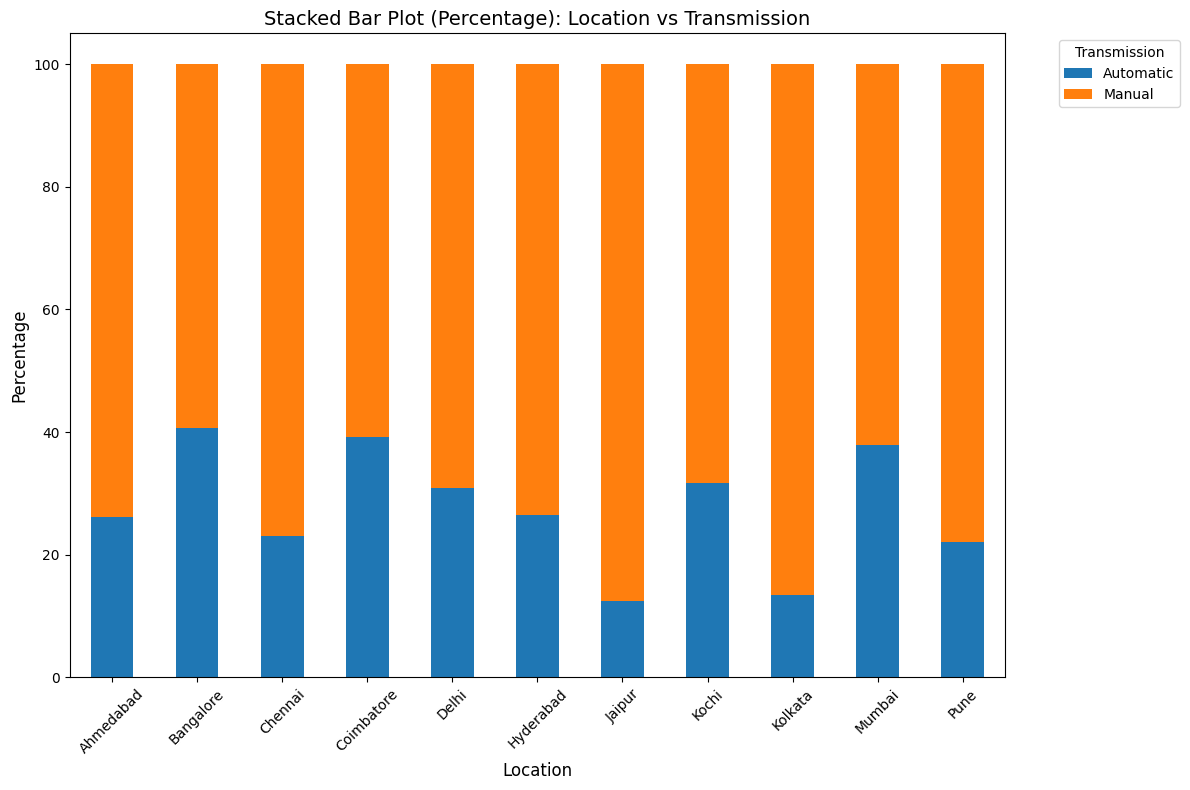

Percentage Contribution Table: Location vs Owner_Type
Owner_Type      First  Fourth & Above     Second     Third
Location                                                  
Ahmedabad   84.727273        0.000000  14.909091  0.363636
Bangalore   65.681818        0.681818  30.681818  2.954545
Chennai     67.005076        0.507614  25.549915  6.937394
Coimbatore  90.284974        0.129534   9.196891  0.388601
Delhi       82.878788        0.000000  16.515152  0.606061
Hyderabad   88.812785        0.000000  11.187215  0.000000
Jaipur      72.144289        0.200401  24.248497  3.406814
Kochi       94.041451        0.000000   5.569948  0.388601
Kolkata     94.801223        0.000000   5.198777  0.000000
Mumbai      82.191781        0.210748  15.700738  1.896733
Pune        68.758170        0.261438  26.143791  4.836601


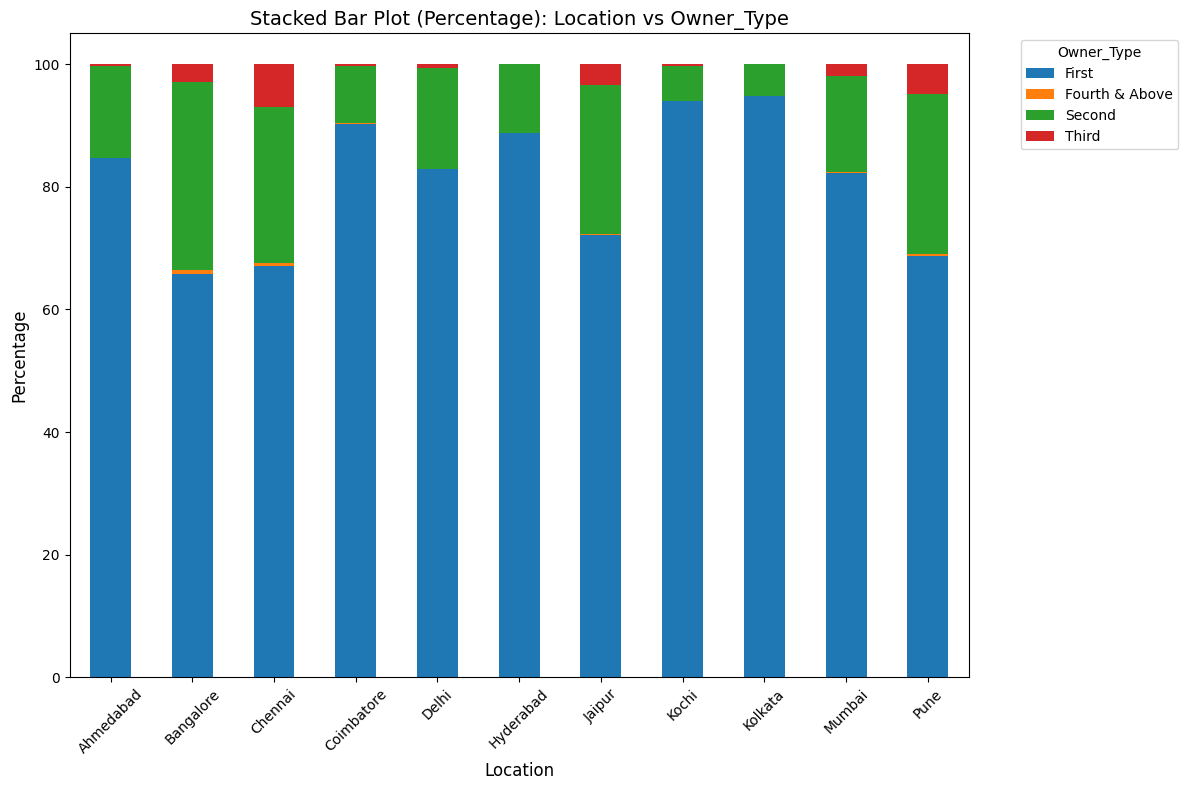

Percentage Contribution Table: Year vs Fuel_Type
Fuel_Type       CNG      Diesel  Electric       LPG      Petrol
Year                                                           
1996       0.000000  100.000000  0.000000  0.000000    0.000000
1998       0.000000   25.000000  0.000000  0.000000   75.000000
1999       0.000000    0.000000  0.000000  0.000000  100.000000
2000       0.000000   40.000000  0.000000  0.000000   60.000000
2001       0.000000   25.000000  0.000000  0.000000   75.000000
2002       0.000000   27.777778  0.000000  0.000000   72.222222
2003       0.000000   20.000000  0.000000  0.000000   80.000000
2004       0.000000   11.428571  0.000000  0.000000   88.571429
2005       1.470588   29.411765  0.000000  0.000000   69.117647
2006       0.000000   23.595506  0.000000  0.000000   76.404494
2007       0.000000   27.027027  0.000000  0.675676   72.297297
2008       0.483092   35.748792  0.000000  0.483092   63.285024
2009       0.000000   38.888889  0.000000  0.396825   6

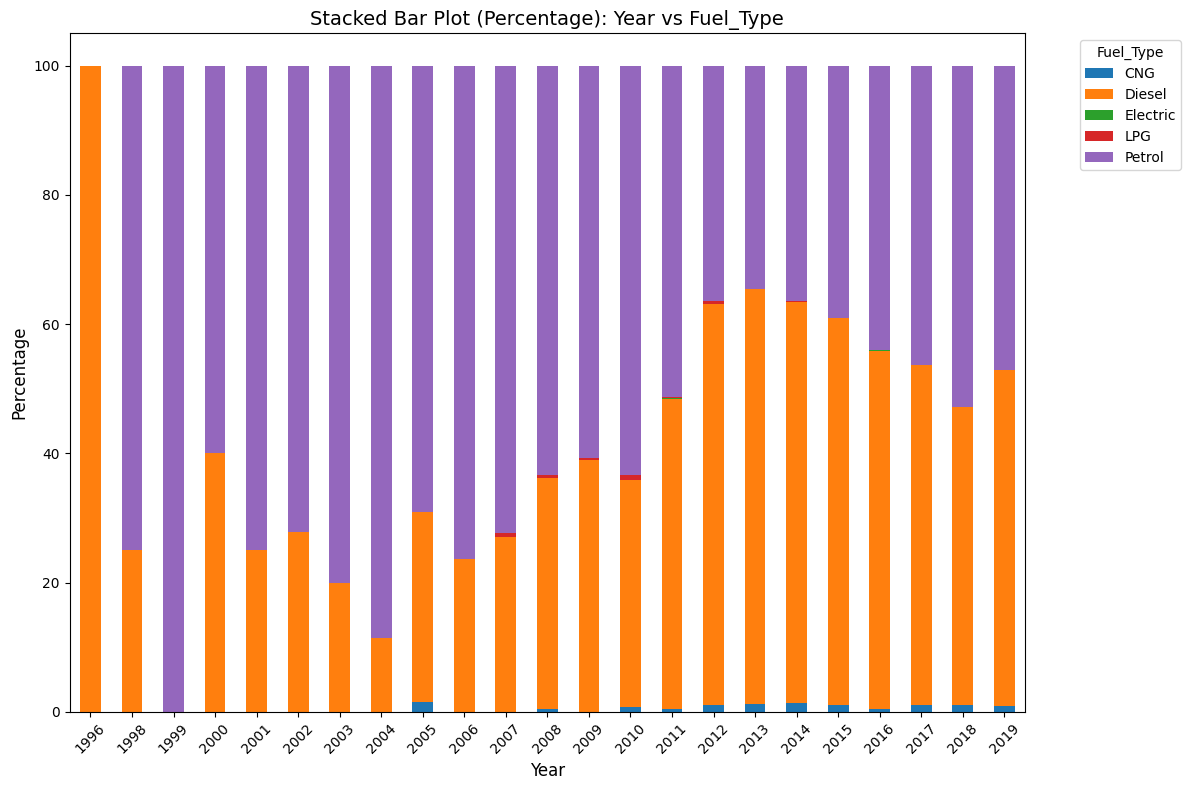

Percentage Contribution Table: Year vs Transmission
Transmission  Automatic      Manual
Year                               
1996           0.000000  100.000000
1998          25.000000   75.000000
1999           0.000000  100.000000
2000           0.000000  100.000000
2001           0.000000  100.000000
2002           0.000000  100.000000
2003          15.000000   85.000000
2004          17.142857   82.857143
2005          17.647059   82.352941
2006          12.359551   87.640449
2007          14.864865   85.135135
2008          22.705314   77.294686
2009          32.142857   67.857143
2010          21.621622   78.378378
2011          27.633851   72.366149
2012          25.217391   74.782609
2013          27.560051   72.439949
2014          28.648649   71.351351
2015          29.494080   70.505920
2016          30.361174   69.638826
2017          32.722144   67.277856
2018          36.565097   63.434903
2019          45.378151   54.621849


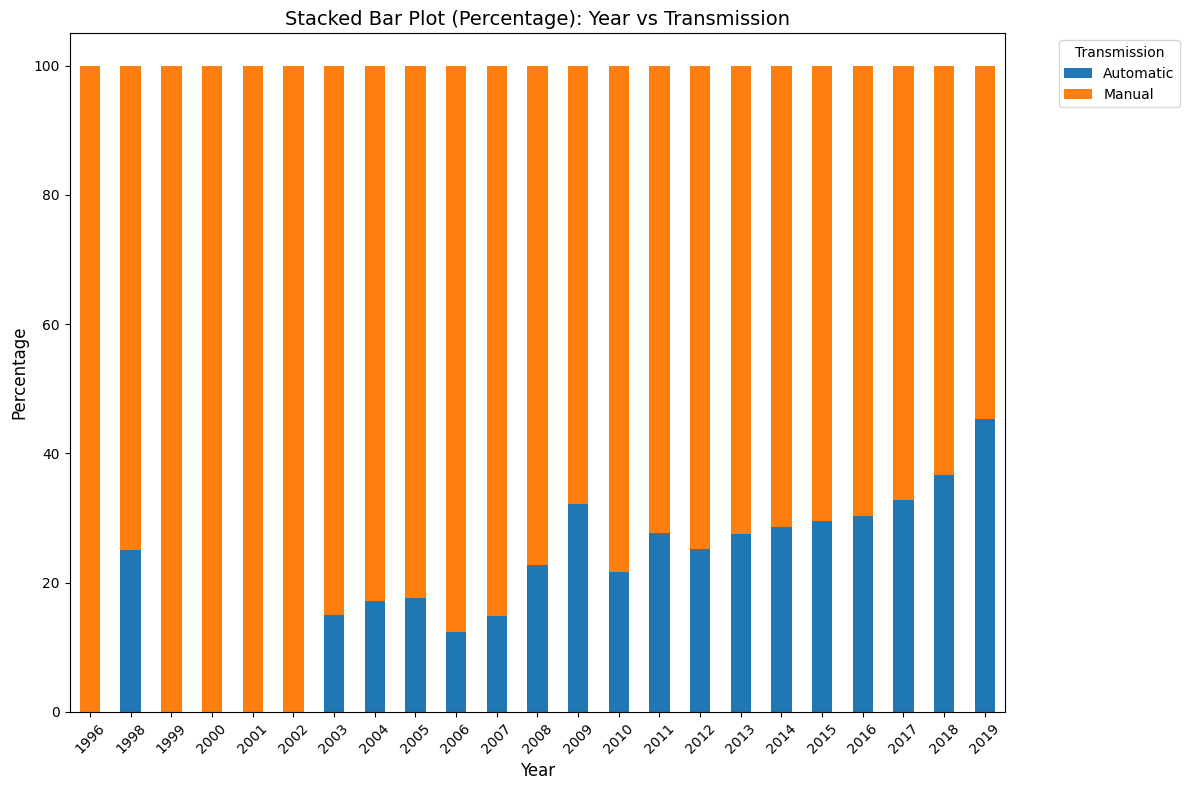

Percentage Contribution Table: Year vs Owner_Type
Owner_Type       First  Fourth & Above      Second      Third
Year                                                         
1996          0.000000        0.000000  100.000000   0.000000
1998         25.000000        0.000000   25.000000  50.000000
1999         50.000000        0.000000   50.000000   0.000000
2000         60.000000        0.000000   40.000000   0.000000
2001         25.000000       12.500000   25.000000  37.500000
2002         33.333333        5.555556   27.777778  33.333333
2003         30.000000        0.000000   45.000000  25.000000
2004         34.285714        0.000000   54.285714  11.428571
2005         48.529412        2.941176   39.705882   8.823529
2006         40.449438        1.123596   43.820225  14.606742
2007         52.027027        1.351351   35.135135  11.486486
2008         47.826087        0.966184   44.927536   6.280193
2009         60.317460        0.396825   32.539683   6.746032
2010         69.7788

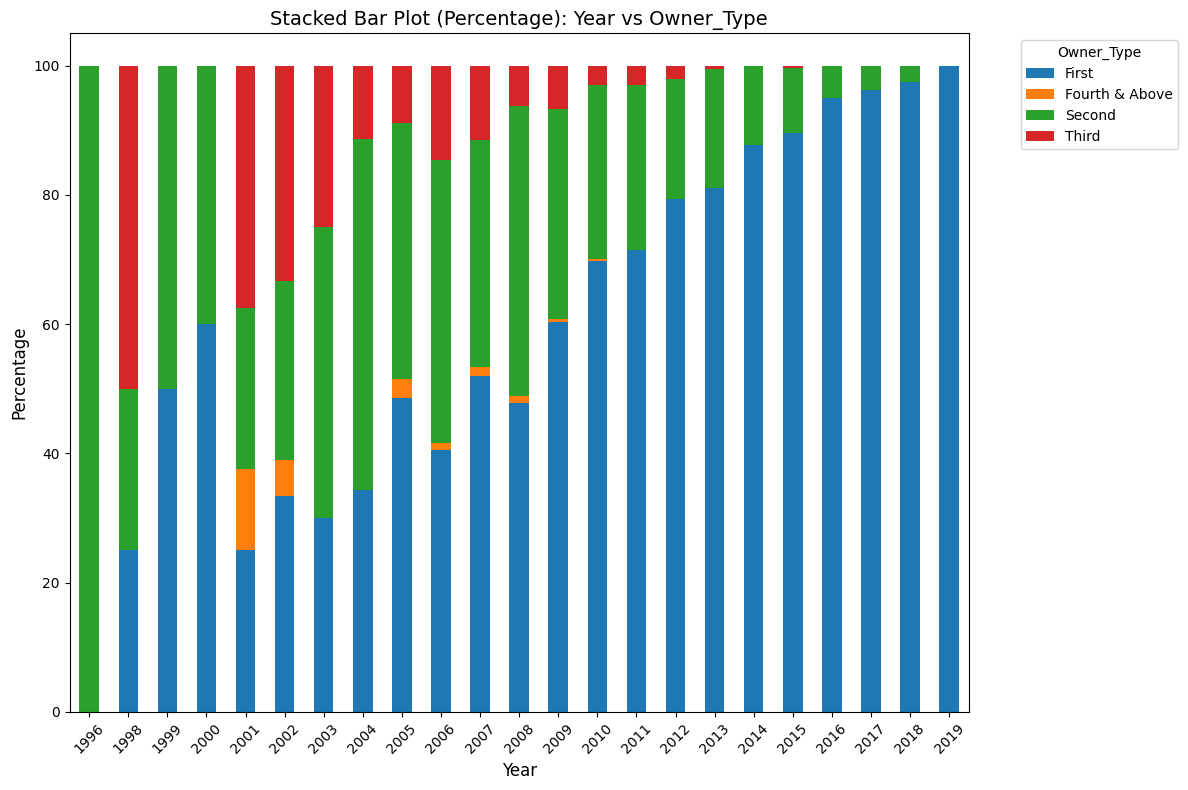

Percentage Contribution Table: Fuel_Type vs Transmission
Transmission   Automatic      Manual
Fuel_Type                           
CNG             0.000000  100.000000
Diesel         34.190031   65.809969
Electric      100.000000    0.000000
LPG             0.000000  100.000000
Petrol         21.954887   78.045113


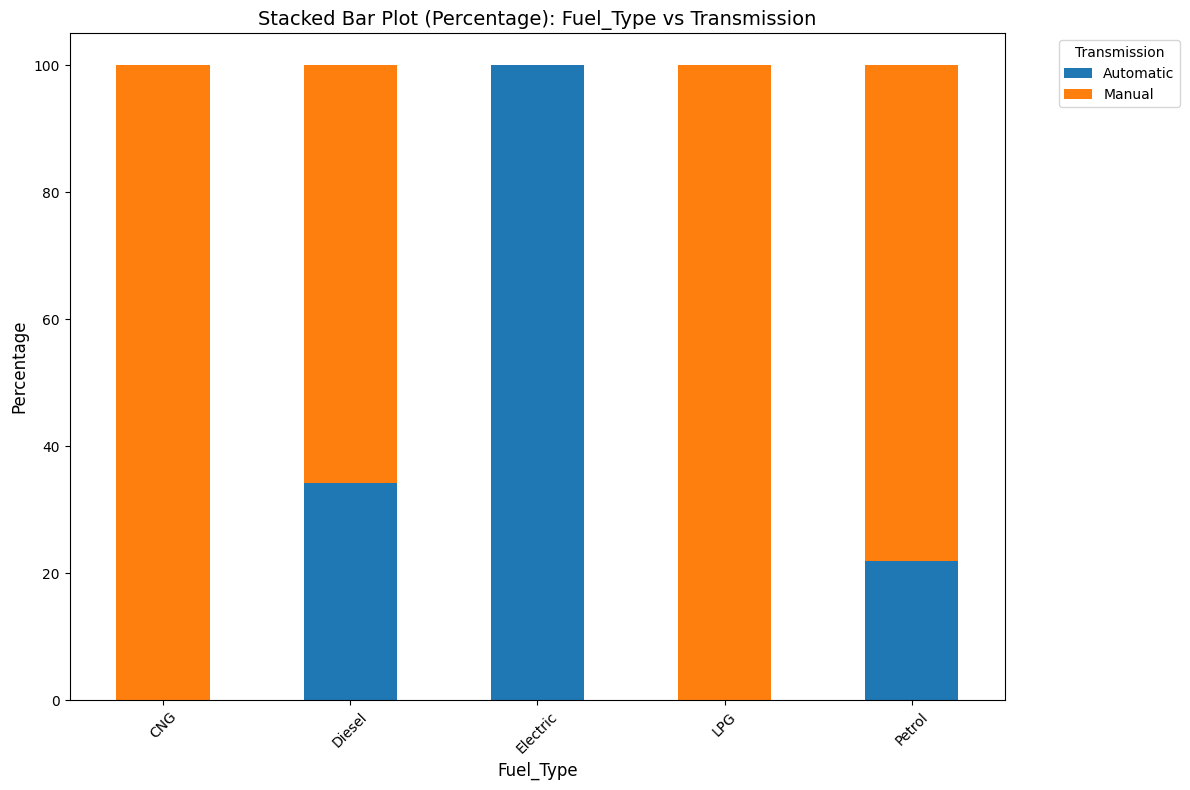

Percentage Contribution Table: Fuel_Type vs Owner_Type
Owner_Type       First  Fourth & Above     Second     Third
Fuel_Type                                                  
CNG          82.258065        0.000000  16.129032  1.612903
Diesel       83.670820        0.129803  14.849429  1.349948
Electric    100.000000        0.000000   0.000000  0.000000
LPG          75.000000        0.000000  25.000000  0.000000
Petrol       80.210526        0.210526  17.052632  2.526316


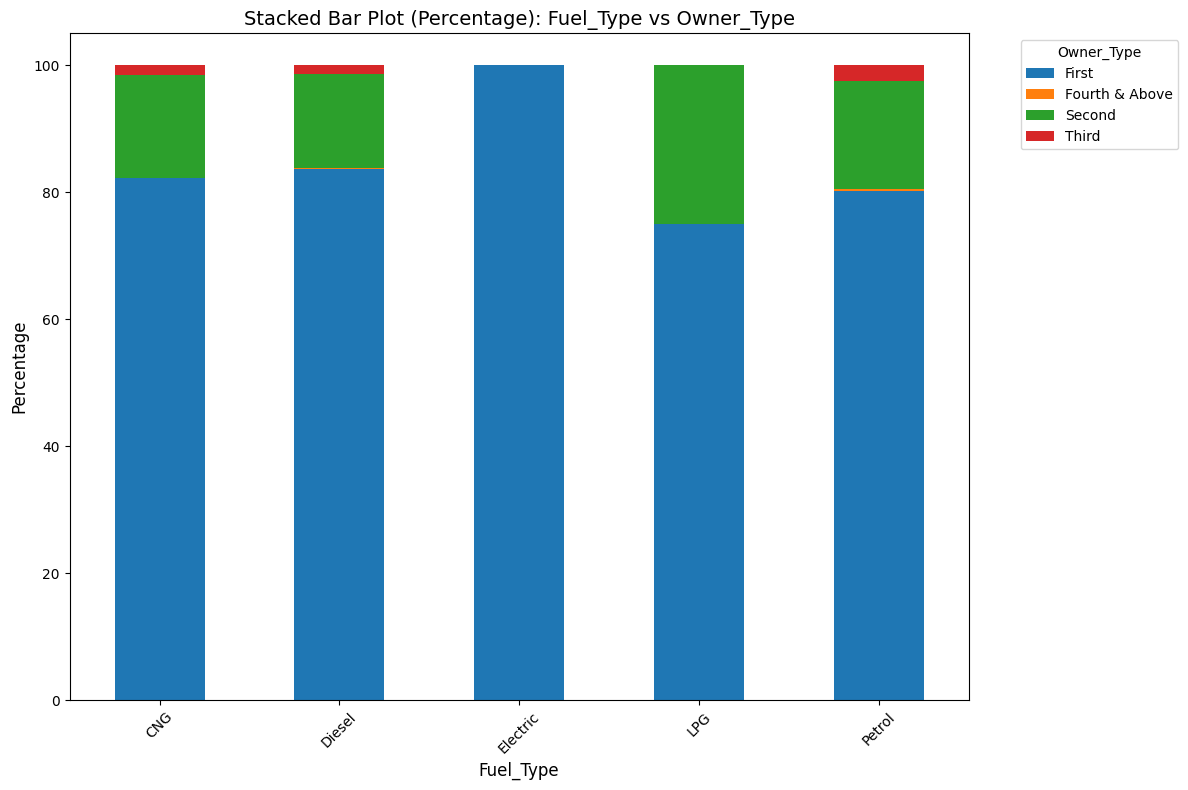

Percentage Contribution Table: Transmission vs Owner_Type
Owner_Type        First  Fourth & Above     Second     Third
Transmission                                                
Automatic     82.088824        0.048804  16.203026  1.659346
Manual        82.052267        0.211376  15.757110  1.979247


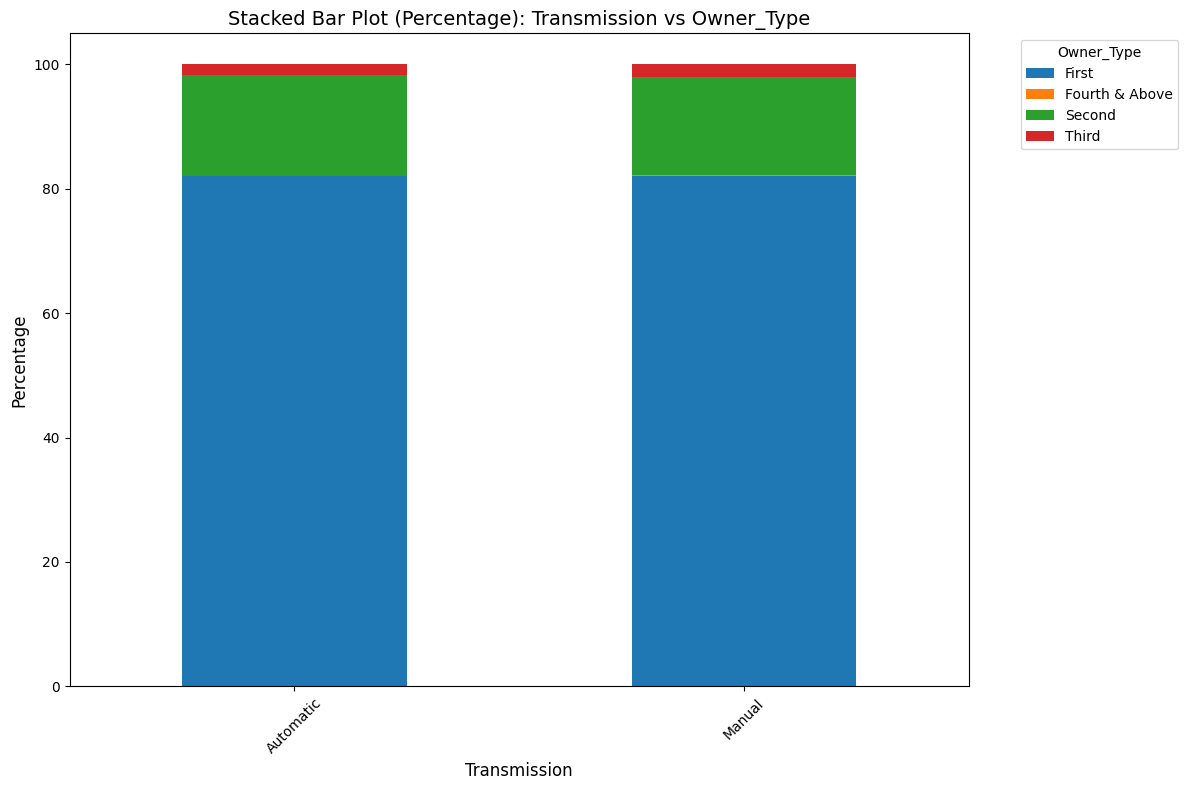

In [21]:

# 3. Categorical vs Categorical: Contingency tables and stacked bar plots
categorical_columns = ['Brand','Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']

def categorical_vs_categorical_percentage(df, categorical_columns):
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            cat1, cat2 = categorical_columns[i], categorical_columns[j]

            # Normalized contingency table (percentage contribution)
            contingency_table = pd.crosstab(df[cat1], df[cat2], normalize='index') * 100
            print(f"Percentage Contribution Table: {cat1} vs {cat2}")
            print(contingency_table)

            # Stacked bar plot for percentage contributions
            ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))  # Increased plot size
            plt.title(f'Stacked Bar Plot (Percentage): {cat1} vs {cat2}', fontsize=14)
            plt.xlabel(cat1, fontsize=12)
            plt.ylabel('Percentage', fontsize=12)
            plt.xticks(rotation=45, fontsize=10)
            plt.legend(title=cat2, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the graph
            plt.tight_layout()  # Adjust layout to fit everything
            plt.show()

print("\n### Categorical vs Categorical (Percentage Contribution) ###")
categorical_vs_categorical_percentage(df, categorical_columns)


### Observations from Percentage Contribution Tables
---

#### 1. Location vs Year
- **Ahmedabad:** High percentage of cars from later years (2010 onwards), with contributions peaking at 2011 (6.91%).
- **Bangalore:** Steady increase in car contributions over the years, peaking in 2011 (8.86%).
- **Chennai:** Significant contributions from later years, with the highest in 2011 (11.34%).
- **Mumbai & Pune:** Noticeable contributions spread across all years, with steady growth in recent years.

#### 2. Location vs Fuel_Type
- **Diesel:** Dominates all locations (e.g., Hyderabad: 67.69%, Chennai: 57.70%).
- **Petrol:** Second most common fuel type (e.g., Mumbai: 58.80%, Chennai: 41.79%).
- **CNG & LPG:** Minimal usage across most locations.
- **Electric:** Negligible presence across all locations.

#### 3. Location vs Transmission
- **Manual Transmission:** Dominates most locations (e.g., Chennai: 76.99%, Jaipur: 87.58%).
- **Automatic Transmission:** Higher usage in Bangalore (40.68%) and Mumbai (37.83%).

#### 4. Location vs Owner_Type
- **First Owners:** Majority in all locations (e.g., Kochi: 94.04%, Coimbatore: 90.28%).
- **Second Owners:** Moderate contributions (e.g., Bangalore: 30.68%, Chennai: 25.55%).
- **Third Owners:** Minimal presence across all locations.

#### 5. Year vs Fuel_Type
- **Petrol:** Dominates early years (1996–2004) and remains significant in recent years (e.g., 2018: 52.91%).
- **Diesel:** Increases gradually over time (e.g., 2013: 64.10%, 2014: 62.16%).
- **CNG & Electric:** Minimal contributions in all years.

#### 6. Year vs Transmission
- **Manual Transmission:** Dominates early years and remains significant (e.g., 1996: 100%, 2003: 85.00%).
- **Automatic Transmission:** Gradual increase in recent years (e.g., 2019: 45.38%).

#### 7. Year vs Owner_Type
- **First Owners:** Increasing dominance over time (e.g., 2018: 97.51%, 2019: 100.00%).
- **Second Owners:** Declining trend in recent years.
- **Third Owners:** Minimal contributions, mostly in early years.

#### 8. Fuel_Type vs Transmission
- **Manual Transmission:** Dominates for most fuel types (e.g., Diesel: 65.81%, Petrol: 78.05%).
- **Automatic Transmission:** Significant for Electric (100%) and moderate for Diesel (34.19%).

#### 9. Fuel_Type vs Owner_Type
- **First Owners:** Majority across all fuel types (e.g., Diesel: 83.67%, Petrol: 80.21%).
- **Second Owners:** Moderate contributions (e.g., Petrol: 17.05%).
- **Third Owners:** Minimal contributions across all fuel types.

#### 10. Transmission vs Owner_Type
- **First Owners:** Majority across both Automatic (82.09%) and Manual (82.05%) transmissions.
- **Second Owners:** Moderate contributions in both transmission types (e.g., Manual: 15.76%).
- **Third Owners:** Minimal presence for both transmission types.


### Multivariate

### Pair Plots for Numerical Variables ###


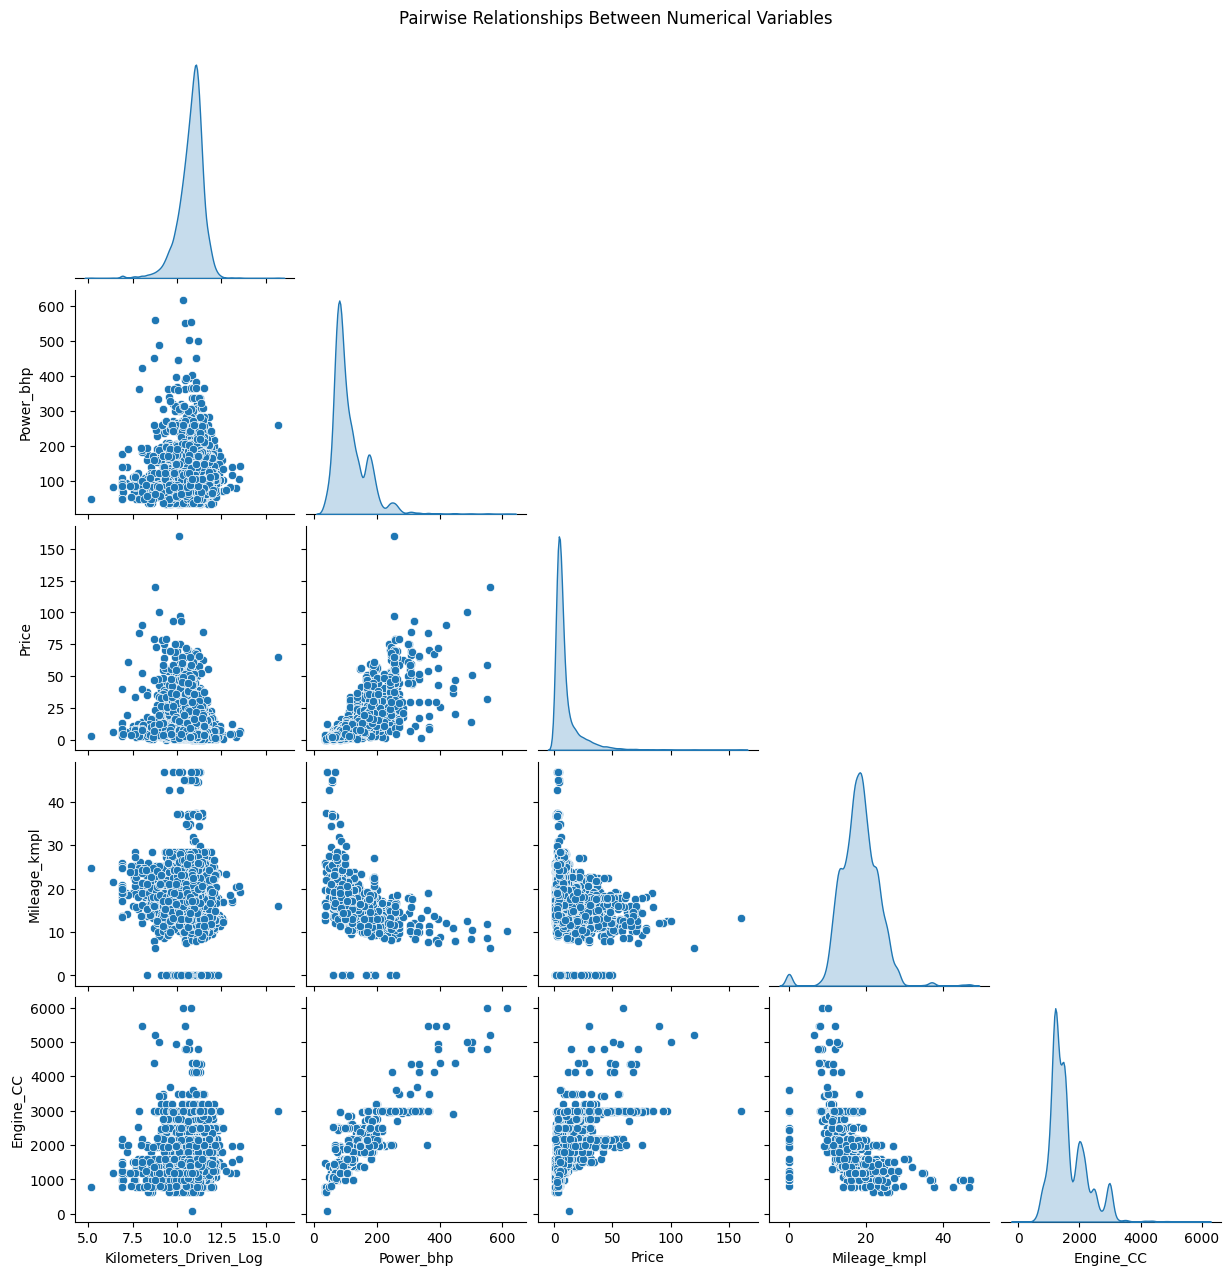

### Pair Plot Statistics ###
       Kilometers_Driven_Log    Power_bhp        Price  Mileage_kmpl  \
count            7253.000000  7078.000000  6019.000000   7251.000000   
mean               10.761010   112.765214     9.479468     18.240986   
std                 0.716276    53.493553    11.187917      4.839919   
min                 5.147494    34.200000     0.440000      0.000000   
25%                10.434145    75.000000     3.500000     15.260000   
50%                10.885884    94.000000     5.640000     18.200000   
75%                11.198228   138.100000     9.950000     21.100000   
max                15.687313   616.000000   160.000000     46.956000   

         Engine_CC  
count  7207.000000  
mean   1616.573470  
std     595.285137  
min      72.000000  
25%    1198.000000  
50%    1493.000000  
75%    1968.000000  
max    5998.000000  

### Heatmap of Correlations ###


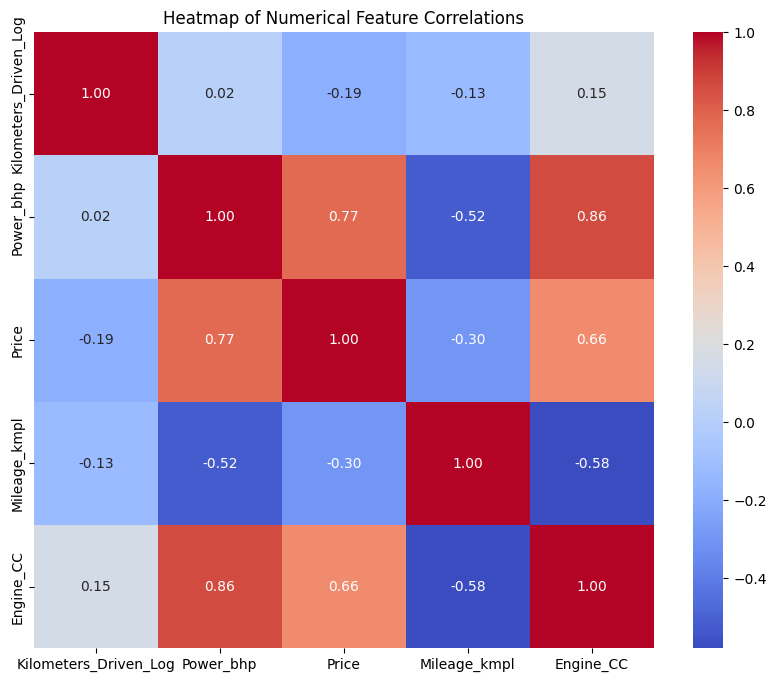

### Heatmap Statistics ###
Correlation Matrix:

                       Kilometers_Driven_Log  Power_bhp     Price  \
Kilometers_Driven_Log               1.000000   0.019286 -0.185944   
Power_bhp                           0.019286   1.000000  0.772566   
Price                              -0.185944   0.772566  1.000000   
Mileage_kmpl                       -0.127015  -0.518869 -0.300072   
Engine_CC                           0.152935   0.859771  0.658354   

                       Mileage_kmpl  Engine_CC  
Kilometers_Driven_Log     -0.127015   0.152935  
Power_bhp                 -0.518869   0.859771  
Price                     -0.300072   0.658354  
Mileage_kmpl               1.000000  -0.578661  
Engine_CC                 -0.578661   1.000000  

### Grouped Bar Chart ###


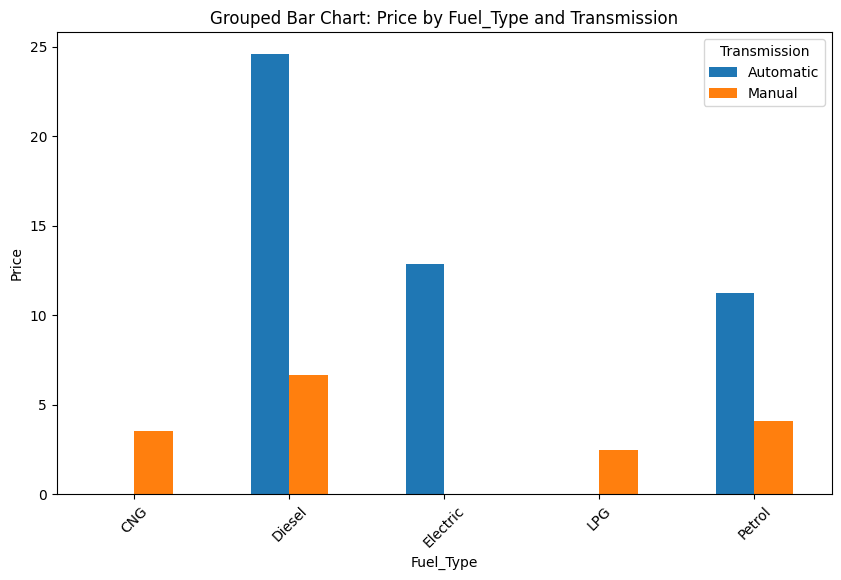

### Grouped Bar Chart Statistics: Price by Fuel_Type and Transmission ###
Transmission  Automatic    Manual
count          3.000000  4.000000
mean          16.238938  4.188481
std            7.271284  1.764752
min           11.258738  2.487000
25%           12.066869  3.259339
50%           12.875000  3.815366
75%           18.729039  4.744507
max           24.583078  6.636190


In [22]:
# 1. Pair Plots for Numerical Variables
def pair_plot_with_statistics(df, numerical_columns):
    sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)
    plt.suptitle('Pairwise Relationships Between Numerical Variables', y=1.02)
    plt.show()
    
    print("### Pair Plot Statistics ###")
    print(df[numerical_columns].describe())

# 2. Heatmap for Correlation
def correlation_heatmap_with_statistics(df, numerical_columns):
    corr_matrix = df[numerical_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Heatmap of Numerical Feature Correlations')
    plt.show()
    
    print("### Heatmap Statistics ###")
    print("Correlation Matrix:\n")
    print(corr_matrix)

# 3. Grouped Bar Charts for Categorical Variables
def grouped_bar_chart_with_statistics(df, cat1, cat2, target):
    grouped_data = df.groupby([cat1, cat2])[target].mean().unstack()
    grouped_data.plot(kind='bar', figsize=(10, 6), stacked=False)
    plt.title(f'Grouped Bar Chart: {target} by {cat1} and {cat2}')
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.legend(title=cat2)
    plt.show()
    
    print(f"### Grouped Bar Chart Statistics: {target} by {cat1} and {cat2} ###")
    print(grouped_data.describe())

# Perform Multivariate Analysis
print("### Pair Plots for Numerical Variables ###")
pair_plot_with_statistics(df, numerical_columns)

print("\n### Heatmap of Correlations ###")
correlation_heatmap_with_statistics(df, numerical_columns)

print("\n### Grouped Bar Chart ###")
grouped_bar_chart_with_statistics(df, 'Fuel_Type', 'Transmission', 'Price')

### Observations from Multivariate Analysis
---

#### 1. Pair Plot Statistics
- **Kilometers_Driven_Log:**
  - Median (`50%`): 10.89, suggesting most cars have moderate usage.
  - Wide range: Minimum of 5.15 and maximum of 15.69, indicating significant variation in mileage.
  - Skewness: High standard deviation (0.72) and extreme max value hint at outliers.

- **Power_bhp:**
  - Median (`50%`): 94.00, with a wide range (34.20–616.00).
  - Strongly skewed towards high-power vehicles, indicated by a high max value.

- **Seats:**
  - Median: 5.00, and most vehicles have the same number of seats (evident from the small standard deviation of 0.81).

- **Price:**
  - Median: 5.64, with a wide spread (0.44–160.00).
  - Skewed distribution, as seen from the mean (9.48) being higher than the median.

- **Mileage_kmpl:**
  - Median: 18.20, showing moderate efficiency.
  - Wide range (0–46.96), with outliers significantly increasing the max.

- **Engine_CC:**
  - Median: 1493.00, representing mid-sized engines.
  - Maximum of 5998.00 suggests the presence of vehicles with very large engines.


---
---

#### 2. Heatmap Statistics (Correlation Matrix)
- **Kilometers_Driven_Log:**
  - Weak negative correlation with Price (-0.19), indicating that higher mileage slightly reduces a car's price.
  - Weak positive correlation with Seats (0.19), showing a tendency for higher usage in cars with more seats.

- **Power_bhp:**
  - Strong positive correlation with Engine_CC (0.86), suggesting that larger engines produce more power.
  - High correlation with Price (0.77), showing that high-powered cars are generally more expensive.
  - Moderate negative correlation with Mileage_kmpl (-0.52), indicating that high-powered cars are less fuel-efficient.

- **Seats:**
  - Weak correlation with Price (0.05), suggesting that seat count has minimal impact on pricing.

- **Mileage_kmpl:**
  - Negative correlation with Engine_CC (-0.58) and Power_bhp (-0.52), confirming that larger engines and higher power reduce fuel efficiency.


---
---

#### 3. Grouped Bar Chart Statistics: Price by Fuel_Type and Transmission
- **Automatic Transmission:**
  - Mean price: 16.24, significantly higher than manual transmission (4.19).
  - Wide price range: 11.26–24.58, indicating the presence of premium vehicles with automatic transmission.

- **Manual Transmission:**
  - Mean price: 4.19, suggesting manual cars are generally more affordable.
  - Narrow range: 2.49–6.64, indicating consistent pricing for manual cars.

- **Overall Trend:**
  - Automatic transmission cars are priced significantly higher on average across fuel types.
  - Diesel and Petrol cars with automatic transmission contribute to the higher mean prices.


In [23]:
##############################################

---
### **Process to Follow furthur for data cleaning**
---

### Data Cleaning Steps Based on Observations

#### 1. Handle Missing Values
- **Seats, Price, Power_bhp, Mileage_kmpl, Engine_CC:**
  - Check for missing values in these columns and handle them by:
    - Imputation using the median or mean for numerical variables.
    - Dropping rows if the proportion of missing data is small.

#### 2. Outlier Treatment
- **Kilometers_Driven_Log:**
  - Values above 15.0 indicate extreme outliers. Apply capping or remove rows with excessive values.
- **Power_bhp:**
  - Cap values exceeding 400 to reduce the impact of outliers on the model.
- **Price:**
  - Handle extreme outliers, such as prices exceeding 100, by capping or transformation.
- **Mileage_kmpl:**
  - Remove or cap values at 0 and those significantly exceeding the 75th percentile (e.g., above 40).

#### 3. Handle Skewed Distributions
- **Kilometers_Driven_Log, Price, and Mileage_kmpl:**
  - Apply transformations (e.g., log or Box-Cox transformation) to normalize skewed distributions.

#### 4. Address Categorical Imbalances
- **Fuel_Type and Transmission:**
  - Check for underrepresented categories (e.g., Electric or LPG vehicles) and decide whether to include or exclude them based on their frequency.
- **Owner_Type:**
  - Categories like "Fourth & Above" have very few entries. Consider grouping into "Others" for more balanced analysis.

#### 5. Feature Engineering
- **Combine Categories:**
  - Merge rare categories in `Fuel_Type` (e.g., Electric, LPG) into an "Other" category.
- **Create Binned Features:**
  - Bin `Price`, `Kilometers_Driven_Log`, and `Mileage_kmpl` into ranges to simplify analysis.
- **Add Derived Features:**
  - Create new features such as `Price_per_Engine_CC` or `Mileage_per_Engine_CC` to capture interactions between numerical variables.

#### 6. Remove Redundant Features
- **Seats:**
  - Minimal correlation with Price and other features indicates it may not be useful for modeling.
- **Highly Correlated Features:**
  - Consider removing one of `Power_bhp` or `Engine_CC` to reduce multicollinearity.

#### 7. Validate and Standardize Data Types
- Ensure that:
  - Numerical columns (`Kilometers_Driven_Log`, `Price`, etc.) are of type `float` or `int`.
  - Categorical columns (`Fuel_Type`, `Transmission`, etc.) are properly encoded as categories or strings.

#### 8. Encoding for Machine Learning
- Convert categorical variables like `Fuel_Type`, `Transmission`, and `Owner_Type` into numeric form using:
  - One-hot encoding for high-cardinality features (e.g., Location).
  - Label encoding for ordinal features.

#### 9. Handle Zero or Invalid Values
- **Mileage_kmpl:**
  - Replace zero values with the median or mean of the corresponding `Fuel_Type` group.
- **Engine_CC:**
  - Replace invalid values (e.g., less than 500) with the median value of the corresponding category.

#### 10. Split Data into Training and Testing
- Ensure data is split into training and testing sets after cleaning to avoid data leakage during modeling.


In [24]:
from sklearn.preprocessing import  StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

In [25]:

categorical_columns = ['Brand','Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']
numerical_columns = ['Kilometers_Driven','Power_bhp','Price','Mileage_kmpl','Engine_CC']

In [26]:
# 1. Handle Missing Values
def handle_missing_values(df):
    # Impute numerical columns with median
    num_imputer = SimpleImputer(strategy='median')
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    
    # For categorical columns, fill missing values with the mode
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
    print("Handled missing values using median for numerical and mode for categorical columns.")
    return df

In [27]:
# Apply All Cleaning Steps
df = handle_missing_values(df)
df.head(5)

Handled missing values using median for numerical and mode for categorical columns.


Name    Location    Year  \
S.No.                                                         
0                Maruti Wagon R LXI CNG      Mumbai  2010.0   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0   
2                          Honda Jazz V     Chennai  2011.0   
3                     Maruti Ertiga VDI     Chennai  2012.0   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0   

       Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats   New_Price  \
S.No.                                                                           
0                72000.0       CNG       Manual      First    5.0  33.36 Lakh   
1                41000.0    Diesel       Manual      First    5.0  33.36 Lakh   
2                46000.0    Petrol       Manual      First    5.0   8.61 Lakh   
3                87000.0    Diesel       Manual      First    7.0  33.36 Lakh   
4                40670.0    Diesel    Automatic     Second    5.0  33.36 Lakh   

       Price    Brand  Mileage_kmpl  Engine_CC  Power_bhp  \
S.No.                                                       
0       1.75   Maruti         37.24      998.0      58.16   
1      12.50  Hyundai         19.67     1582.0     126.20   
2       4.50    Honda         18.20     1199.0      88.70   
3       6.00   Maruti         20.77     1248.0      88.76   
4      17.74     Audi         15.20     1968.0     140.80   

       Kilometers_Driven_Log  
S.No.                         
0                  11.184435  
1                  10.621352  
2                  10.736418  
3                  11.373675  
4                  10.613271

In [28]:
# 2. Outlier Treatment
def treat_outliers(df):
    # Define thresholds for numerical columns based on 1.5*IQR rule
    def cap_outliers(col):
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return col.clip(lower=lower_bound, upper=upper_bound)

    for col in ['Kilometers_Driven_Log', 'Price', 'Power_bhp', 'Mileage_kmpl']:
        df[col] = cap_outliers(df[col])
    print("Outliers capped based on 1.5*IQR rule for selected numerical columns.")
    return df

In [29]:
df = treat_outliers(df)
df.head(5)

Outliers capped based on 1.5*IQR rule for selected numerical columns.


Name    Location    Year  \
S.No.                                                         
0                Maruti Wagon R LXI CNG      Mumbai  2010.0   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0   
2                          Honda Jazz V     Chennai  2011.0   
3                     Maruti Ertiga VDI     Chennai  2012.0   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0   

       Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats   New_Price  \
S.No.                                                                           
0                72000.0       CNG       Manual      First    5.0  33.36 Lakh   
1                41000.0    Diesel       Manual      First    5.0  33.36 Lakh   
2                46000.0    Petrol       Manual      First    5.0   8.61 Lakh   
3                87000.0    Diesel       Manual      First    7.0  33.36 Lakh   
4                40670.0    Diesel    Automatic     Second    5.0  33.36 Lakh   

        Price    Brand  Mileage_kmpl  Engine_CC  Power_bhp  \
S.No.                                                        
0       1.750   Maruti         29.86      998.0      58.16   
1      12.500  Hyundai         19.67     1582.0     126.20   
2       4.500    Honda         18.20     1199.0      88.70   
3       6.000   Maruti         20.77     1248.0      88.76   
4      15.225     Audi         15.20     1968.0     140.80   

       Kilometers_Driven_Log  
S.No.                         
0                  11.184435  
1                  10.621352  
2                  10.736418  
3                  11.373675  
4                  10.613271

In [30]:
# 3. Handle Skewed Distributions
def normalize_skewed_columns(df):
    # Apply log transformation for skewed columns
    transformer = PowerTransformer(method='yeo-johnson')
    skewed_cols = ['Kilometers_Driven', 'Price', 'Mileage_kmpl']
    df[skewed_cols] = transformer.fit_transform(df[skewed_cols])
    print("Normalized skewed columns using Yeo-Johnson transformation.")
    return df

In [31]:
df = normalize_skewed_columns(df)
df.head(5)

Normalized skewed columns using Yeo-Johnson transformation.


Name    Location    Year  \
S.No.                                                         
0                Maruti Wagon R LXI CNG      Mumbai  2010.0   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0   
2                          Honda Jazz V     Chennai  2011.0   
3                     Maruti Ertiga VDI     Chennai  2012.0   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0   

       Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats   New_Price  \
S.No.                                                                           
0               0.569855       CNG       Manual      First    5.0  33.36 Lakh   
1              -0.305413    Diesel       Manual      First    5.0  33.36 Lakh   
2              -0.137691    Petrol       Manual      First    5.0   8.61 Lakh   
3               0.896694    Diesel       Manual      First    7.0  33.36 Lakh   
4              -0.316989    Diesel    Automatic     Second    5.0  33.36 Lakh   

          Price    Brand  Mileage_kmpl  Engine_CC  Power_bhp  \
S.No.                                                          
0     -1.720103   Maruti      2.628400      998.0      58.16   
1      1.289743  Hyundai      0.334999     1582.0     126.20   
2     -0.412399    Honda     -0.002042     1199.0      88.70   
3      0.043852   Maruti      0.586036     1248.0      88.76   
4      1.639403     Audi     -0.696041     1968.0     140.80   

       Kilometers_Driven_Log  
S.No.                         
0                  11.184435  
1                  10.621352  
2                  10.736418  
3                  11.373675  
4                  10.613271

In [32]:
# 4. Address Categorical Imbalances
def handle_categorical_imbalance(df):
    # Combine rare categories in Fuel_Type
    rare_categories = df['Fuel_Type'].value_counts(normalize=True)[df['Fuel_Type'].value_counts(normalize=True) < 0.01].index
    df['Fuel_Type'] = df['Fuel_Type'].replace(rare_categories, 'Other')
    print("Combined rare categories in 'Fuel_Type' into 'Other'.")
    return df

In [33]:
df = handle_categorical_imbalance(df)
df.head(5)

Combined rare categories in 'Fuel_Type' into 'Other'.


Name    Location    Year  \
S.No.                                                         
0                Maruti Wagon R LXI CNG      Mumbai  2010.0   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0   
2                          Honda Jazz V     Chennai  2011.0   
3                     Maruti Ertiga VDI     Chennai  2012.0   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0   

       Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats   New_Price  \
S.No.                                                                           
0               0.569855     Other       Manual      First    5.0  33.36 Lakh   
1              -0.305413    Diesel       Manual      First    5.0  33.36 Lakh   
2              -0.137691    Petrol       Manual      First    5.0   8.61 Lakh   
3               0.896694    Diesel       Manual      First    7.0  33.36 Lakh   
4              -0.316989    Diesel    Automatic     Second    5.0  33.36 Lakh   

          Price    Brand  Mileage_kmpl  Engine_CC  Power_bhp  \
S.No.                                                          
0     -1.720103   Maruti      2.628400      998.0      58.16   
1      1.289743  Hyundai      0.334999     1582.0     126.20   
2     -0.412399    Honda     -0.002042     1199.0      88.70   
3      0.043852   Maruti      0.586036     1248.0      88.76   
4      1.639403     Audi     -0.696041     1968.0     140.80   

       Kilometers_Driven_Log  
S.No.                         
0                  11.184435  
1                  10.621352  
2                  10.736418  
3                  11.373675  
4                  10.613271

In [34]:

# 5. Feature Engineering
def feature_engineering(df):
    # Create new features
    df['Price_per_Engine_CC'] = df['Price'] / df['Engine_CC']
    df['Mileage_per_Engine_CC'] = df['Mileage_kmpl'] / df['Engine_CC']
    print("Created new features 'Price_per_Engine_CC' and 'Mileage_per_Engine_CC'.")
    return df

In [35]:
df = feature_engineering(df)
df.head(5)

Created new features 'Price_per_Engine_CC' and 'Mileage_per_Engine_CC'.


Name    Location    Year  \
S.No.                                                         
0                Maruti Wagon R LXI CNG      Mumbai  2010.0   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015.0   
2                          Honda Jazz V     Chennai  2011.0   
3                     Maruti Ertiga VDI     Chennai  2012.0   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013.0   

       Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats   New_Price  \
S.No.                                                                           
0               0.569855     Other       Manual      First    5.0  33.36 Lakh   
1              -0.305413    Diesel       Manual      First    5.0  33.36 Lakh   
2              -0.137691    Petrol       Manual      First    5.0   8.61 Lakh   
3               0.896694    Diesel       Manual      First    7.0  33.36 Lakh   
4              -0.316989    Diesel    Automatic     Second    5.0  33.36 Lakh   

          Price    Brand  Mileage_kmpl  Engine_CC  Power_bhp  \
S.No.                                                          
0     -1.720103   Maruti      2.628400      998.0      58.16   
1      1.289743  Hyundai      0.334999     1582.0     126.20   
2     -0.412399    Honda     -0.002042     1199.0      88.70   
3      0.043852   Maruti      0.586036     1248.0      88.76   
4      1.639403     Audi     -0.696041     1968.0     140.80   

       Kilometers_Driven_Log  Price_per_Engine_CC  Mileage_per_Engine_CC  
S.No.                                                                     
0                  11.184435            -0.001724               0.002634  
1                  10.621352             0.000815               0.000212  
2                  10.736418            -0.000344              -0.000002  
3                  11.373675             0.000035               0.000470  
4                  10.613271             0.000833              -0.000354

In [36]:
# 6. Remove Redundant Features
df_NewPrice = df['New_Price']
def remove_redundant_features(df):
    # Drop Seats column as it has low correlation with target variable
    df = df.drop(columns=['Name','Seats', 'New_Price','Kilometers_Driven_Log'], errors='ignore')
    print("Removed redundant feature 'Seats'.")
    return df

In [37]:
df = remove_redundant_features(df)
df.head(5)

Removed redundant feature 'Seats'.


Location    Year  Kilometers_Driven Fuel_Type Transmission  \
S.No.                                                                 
0          Mumbai  2010.0           0.569855     Other       Manual   
1            Pune  2015.0          -0.305413    Diesel       Manual   
2         Chennai  2011.0          -0.137691    Petrol       Manual   
3         Chennai  2012.0           0.896694    Diesel       Manual   
4      Coimbatore  2013.0          -0.316989    Diesel    Automatic   

      Owner_Type     Price    Brand  Mileage_kmpl  Engine_CC  Power_bhp  \
S.No.                                                                     
0          First -1.720103   Maruti      2.628400      998.0      58.16   
1          First  1.289743  Hyundai      0.334999     1582.0     126.20   
2          First -0.412399    Honda     -0.002042     1199.0      88.70   
3          First  0.043852   Maruti      0.586036     1248.0      88.76   
4         Second  1.639403     Audi     -0.696041     1968.0     140.80   

       Price_per_Engine_CC  Mileage_per_Engine_CC  
S.No.                                              
0                -0.001724               0.002634  
1                 0.000815               0.000212  
2                -0.000344              -0.000002  
3                 0.000035               0.000470  
4                 0.000833              -0.000354

In [38]:
# 7. Validate and Standardize Data Types
def validate_data_types(df):
    # Ensure numerical columns are float or int
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = df[num_cols].astype(float)
    
    # Convert categorical columns to category type
    cat_cols = df.select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].astype('category')
    print("Validated and standardized data types for numerical and categorical columns.")
    return df

In [39]:
df = validate_data_types(df)
df.head(5)

Validated and standardized data types for numerical and categorical columns.


Location    Year  Kilometers_Driven Fuel_Type Transmission  \
S.No.                                                                 
0          Mumbai  2010.0           0.569855     Other       Manual   
1            Pune  2015.0          -0.305413    Diesel       Manual   
2         Chennai  2011.0          -0.137691    Petrol       Manual   
3         Chennai  2012.0           0.896694    Diesel       Manual   
4      Coimbatore  2013.0          -0.316989    Diesel    Automatic   

      Owner_Type     Price    Brand  Mileage_kmpl  Engine_CC  Power_bhp  \
S.No.                                                                     
0          First -1.720103   Maruti      2.628400      998.0      58.16   
1          First  1.289743  Hyundai      0.334999     1582.0     126.20   
2          First -0.412399    Honda     -0.002042     1199.0      88.70   
3          First  0.043852   Maruti      0.586036     1248.0      88.76   
4         Second  1.639403     Audi     -0.696041     1968.0     140.80   

       Price_per_Engine_CC  Mileage_per_Engine_CC  
S.No.                                              
0                -0.001724               0.002634  
1                 0.000815               0.000212  
2                -0.000344              -0.000002  
3                 0.000035               0.000470  
4                 0.000833              -0.000354

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7253 non-null   category
 1   Year                   7253 non-null   float64 
 2   Kilometers_Driven      7253 non-null   float64 
 3   Fuel_Type              7253 non-null   category
 4   Transmission           7253 non-null   category
 5   Owner_Type             7253 non-null   category
 6   Price                  7253 non-null   float64 
 7   Brand                  7253 non-null   category
 8   Mileage_kmpl           7253 non-null   float64 
 9   Engine_CC              7253 non-null   float64 
 10  Power_bhp              7253 non-null   float64 
 11  Price_per_Engine_CC    7253 non-null   float64 
 12  Mileage_per_Engine_CC  7253 non-null   float64 
dtypes: category(5), float64(8)
memory usage: 547.5 KB


In [41]:
# 9. Handle Zero or Invalid Values
def handle_invalid_values(df):
    # Replace 0 Mileage_kmpl with median value of the corresponding Fuel_Type
    df.loc[df['Mileage_kmpl'] == 0, 'Mileage_kmpl'] = df.groupby('Fuel_Type')['Mileage_kmpl'].transform('median')
    
    # Replace Engine_CC values below 500 with median
    df.loc[df['Engine_CC'] < 500, 'Engine_CC'] = df['Engine_CC'].median()
    print("Replaced invalid values in 'Mileage_kmpl' and 'Engine_CC'.")
    return df

In [42]:
# 8. One hot Encoding for Machine Learning
# Function to perform one-hot encoding on categorical features

def encode_categorical_onehot(df):
    """
    One-hot encode categorical features in the given DataFrame with 0 and 1.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing categorical columns.
    
    Returns:
    pd.DataFrame: DataFrame with one-hot encoded categorical columns.
    """
    # Identify categorical columns
    cat_cols = df.select_dtypes(include=['category', 'object']).columns
    # Perform one-hot encoding using pandas get_dummies
    df = pd.get_dummies(df, columns=cat_cols, drop_first=False, dtype=int)
    print("Encoded categorical variables into numerical 0/1 using One-Hot Encoding.")
    return df

In [43]:
df = handle_invalid_values(df)
df.head(5)

Replaced invalid values in 'Mileage_kmpl' and 'Engine_CC'.


/tmp/ipykernel_1065872/398514237.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[df['Mileage_kmpl'] == 0, 'Mileage_kmpl'] = df.groupby('Fuel_Type')['Mileage_kmpl'].transform('median')


Location    Year  Kilometers_Driven Fuel_Type Transmission  \
S.No.                                                                 
0          Mumbai  2010.0           0.569855     Other       Manual   
1            Pune  2015.0          -0.305413    Diesel       Manual   
2         Chennai  2011.0          -0.137691    Petrol       Manual   
3         Chennai  2012.0           0.896694    Diesel       Manual   
4      Coimbatore  2013.0          -0.316989    Diesel    Automatic   

      Owner_Type     Price    Brand  Mileage_kmpl  Engine_CC  Power_bhp  \
S.No.                                                                     
0          First -1.720103   Maruti      2.628400      998.0      58.16   
1          First  1.289743  Hyundai      0.334999     1582.0     126.20   
2          First -0.412399    Honda     -0.002042     1199.0      88.70   
3          First  0.043852   Maruti      0.586036     1248.0      88.76   
4         Second  1.639403     Audi     -0.696041     1968.0     140.80   

       Price_per_Engine_CC  Mileage_per_Engine_CC  
S.No.                                              
0                -0.001724               0.002634  
1                 0.000815               0.000212  
2                -0.000344              -0.000002  
3                 0.000035               0.000470  
4                 0.000833              -0.000354

In [44]:
df = encode_categorical_onehot(df)
df.head(5)

Encoded categorical variables into numerical 0/1 using One-Hot Encoding.


Year  Kilometers_Driven     Price  Mileage_kmpl  Engine_CC  \
S.No.                                                                 
0      2010.0           0.569855 -1.720103      2.628400      998.0   
1      2015.0          -0.305413  1.289743      0.334999     1582.0   
2      2011.0          -0.137691 -0.412399     -0.002042     1199.0   
3      2012.0           0.896694  0.043852      0.586036     1248.0   
4      2013.0          -0.316989  1.639403     -0.696041     1968.0   

       Power_bhp  Price_per_Engine_CC  Mileage_per_Engine_CC  \
S.No.                                                          
0          58.16            -0.001724               0.002634   
1         126.20             0.000815               0.000212   
2          88.70            -0.000344              -0.000002   
3          88.76             0.000035               0.000470   
4         140.80             0.000833              -0.000354   

       Location_Ahmedabad  Location_Bangalore  ...  Brand_Nissan  \
S.No.                                          ...                 
0                       0                   0  ...             0   
1                       0                   0  ...             0   
2                       0                   0  ...             0   
3                       0                   0  ...             0   
4                       0                   0  ...             0   

       Brand_OpelCorsa  Brand_Porsche  Brand_Renault  Brand_Skoda  \
S.No.                                                               
0                    0              0              0            0   
1                    0              0              0            0   
2                    0              0              0            0   
3                    0              0              0            0   
4                    0              0              0            0   

       Brand_Smart  Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
S.No.                                                                        
0                0           0             0                 0            0  
1                0           0             0                 0            0  
2                0           0             0                 0            0  
3                0           0             0                 0            0  
4                0           0             0                 0            0  

[5 rows x 61 columns]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       7253 non-null   float64
 1   Kilometers_Driven          7253 non-null   float64
 2   Price                      7253 non-null   float64
 3   Mileage_kmpl               7253 non-null   float64
 4   Engine_CC                  7253 non-null   float64
 5   Power_bhp                  7253 non-null   float64
 6   Price_per_Engine_CC        7253 non-null   float64
 7   Mileage_per_Engine_CC      7253 non-null   float64
 8   Location_Ahmedabad         7253 non-null   int64  
 9   Location_Bangalore         7253 non-null   int64  
 10  Location_Chennai           7253 non-null   int64  
 11  Location_Coimbatore        7253 non-null   int64  
 12  Location_Delhi             7253 non-null   int64  
 13  Location_Hyderabad         7253 non-null   int64  
 1

In [ ]:
# 10. Split Data into Training and Testing
from sklearn.model_selection import train_test_split
def split_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Split data into training and testing sets.")
    return X_train, X_test, y_train, y_test

# Assuming 'Price' is the target column
X_train, X_test, y_train, y_test = split_data(df, target_column='Price')


### Answer the queries

1. Group the data by `Location` and calculate the average `Price` for each location.  
2. Group the data by `Fuel_Type` and `Transmission` to find the total number of `Seats` for each combination.  
3. Create a pivot table to display the average `Power` for each `Year` and `Owner_Type`.  
4. Create a pivot table to show the total `Kilometers_Driven` for each `Location` and `Fuel_Type`.  
5. Filter the dataset to include only cars with `Mileage` above 20 km/l and calculate the average `Price` of these cars.  
6. Add a new column, `Car_Age`, to calculate the age of each car as of 2024 and find the oldest car.  
7. Sort the dataset by `Price` in descending order and list the top 5 most expensive cars.  
8. Find the maximum difference between `New_Price` and `Price` for each `Transmission` type.

In [ ]:
# Group by Location and calculate average Price
avg_price_by_location = df.groupby('Location')['Price'].mean().reset_index()

# Rename columns for clarity
avg_price_by_location.columns = ['Location', 'Average Price']

# Display the result
print(avg_price_by_location)

In [ ]:
# Group by Fuel_Type and Transmission, and calculate the average number of Seats
average_seats_by_combination = df.groupby(['Fuel_Type', 'Transmission'])['Seats'].mean().reset_index()

# Round the Average Seats to the nearest integer
average_seats_by_combination['Average Seats'] = average_seats_by_combination['Seats'].round(0).astype(int)

# Drop the original unrounded column (if needed)
average_seats_by_combination.drop(columns=['Seats'], inplace=True)

# Rename columns for clarity
average_seats_by_combination.columns = ['Fuel_Type', 'Transmission', 'Average Seats']

# Display the result
print(average_seats_by_combination)


In [ ]:
# Create a pivot table
pivot_table = df.pivot_table(
    index='Year',          # Rows
    columns='Owner_Type',  # Columns
    values='Power_bhp',     # Values to aggregate
    aggfunc='mean',        # Aggregation function
    fill_value=0           # Fill missing values with 0
)

# Display the pivot table
pivot_table

In [ ]:
# Create a pivot table
pivot_table = df.pivot_table(
    index='Location',        # Rows
    columns='Fuel_Type',     # Columns
    values='Kilometers_Driven',  # Values to aggregate
    aggfunc='sum',           # Aggregation function
    fill_value=0             # Fill missing values with 0
)
pivot_table

In [ ]:
# Filter cars with Mileage above 20 km/l
filtered_cars = df[df['Mileage_kmpl'] > 20]

# Calculate the average Price of these cars
average_price = filtered_cars['Price'].mean()

# Display the result
print("Average Price of cars with Mileage above 20 km/l:", average_price)

In [ ]:
# Add a new column 'Car_Age'
current_year = 2024
df['Car_Age'] = current_year - df['Year']

# Find the oldest car
oldest_car = df[df['Car_Age'] == df['Car_Age'].max()]

# Display the updated DataFrame and the oldest car
print("Updated DataFrame:")
print(df)
print("\nOldest Car:")
print(oldest_car)

In [ ]:
# Sort the dataset by Price in descending order
sorted_df = df.sort_values(by='Price', ascending=False)

# List the top 5 most expensive cars
top_5_expensive_cars = sorted_df.head(5)

# Display the result
print("Top 5 Most Expensive Cars:")
top_5_expensive_cars

In [ ]:
# Function to convert price into numerical value
def convert_price(price):
    if isinstance(price, str):
        price = price.strip()  # Remove extra spaces
        if "Lakh" in price:
            return float(re.sub(r"[^\d.]", "", price))  # Remove non-numeric characters
        elif "Cr" in price:
            return float(re.sub(r"[^\d.]", "", price)) * 100  # Convert Cr to Lakh
    return np.nan  # Return NaN for invalid input

# Apply the conversion function
df_New = df['New_Price'].apply(convert_price)

In [ ]:
df